In [1]:
#Basic Modules
import pandas as pd
import numpy as np
#plots
import seaborn as sns
import plotly.graph_objects as go
#Data Handling
from sklearn.preprocessing import (Normalizer,StandardScaler,MinMaxScaler)
from sklearn.preprocessing import OneHotEncoder

# Genetic Modules
from gplearn.genetic import SymbolicTransformer
from sklearn.ensemble import RandomForestClassifier
from matplotlib import rcParams
from cycler import cycler
#Log Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, accuracy_score, recall_score, precision_score,
                             f1_score,balanced_accuracy_score)
#Naive Bayes
from sklearn.naive_bayes import GaussianNB, CategoricalNB
# metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import ConfusionMatrixDisplay,r2_score
# Neural Network
from keras.models import Sequential
from keras.layers import Dense ,Dropout
from keras.utils import plot_model
import matplotlib.pyplot as plt

import pickle
import seaborn as sb
import graphviz
import pydot
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from tensorflow.keras import layers
from scikeras.wrappers import KerasClassifier
from sklearn.pipeline import Pipeline
from  sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
from keras.callbacks import EarlyStopping
import tensorflow_addons as tfa
from sklearn import tree
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


from sklearn.feature_selection import SelectKBest

In [2]:
route = 'C:/Users/Emilio/Desktop/TOG Exp/Datasets/'
# data = pd.read_parquet(route+'ohlcV.parquet')
# data = pd.read_parquet(route+'ohlc-2017.parquet')
data = pd.read_parquet(route + 'ohlc-2021-2022.parquet')
#data = pd.read_parquet(route + 'ohlc1.parquet')
data = data.drop(['drop', 'close_time'], axis=1)
data.head()

open      high       low     close     volume  \
timestamp                                                                
2021-01-01 00:00:00  28923.63  28961.66  28913.12  28961.66  27.457032   
2021-01-01 00:01:00  28961.67  29017.50  28961.01  29009.91  58.477501   
2021-01-01 00:02:00  29009.54  29016.71  28973.58  28989.30  42.470329   
2021-01-01 00:03:00  28989.68  28999.85  28972.33  28982.69  30.360677   
2021-01-01 00:04:00  28982.67  28995.93  28971.80  28975.65  24.124339   

                     quote_asset_volume  trades  buy_asset_volume  \
timestamp                                                           
2021-01-01 00:00:00        7.943820e+05    1292         16.777195   
2021-01-01 00:01:00        1.695803e+06    1651         33.733818   
2021-01-01 00:02:00        1.231359e+06     986         13.247444   
2021-01-01 00:03:00        8.800168e+05     959          9.456028   
2021-01-01 00:04:00        6.992262e+05     726          6.814644   

                     taker_buy_asset_volume  
timestamp                                    
2021-01-01 00:00:00           485390.826825  
2021-01-01 00:01:00           978176.468202  
2021-01-01 00:02:00           384076.854453  
2021-01-01 00:03:00           274083.075142  
2021-01-01 00:04:00           197519.374888

In [3]:
data.describe()

open          high           low         close        volume  \
count  1.002687e+06  1.002687e+06  1.002687e+06  1.002687e+06  1.002687e+06   
mean   3.877123e+04  3.879758e+04  3.874503e+04  3.877122e+04  7.241556e+01   
std    1.338555e+04  1.339363e+04  1.337719e+04  1.338557e+04  1.111249e+02   
min    1.551384e+04  1.554447e+04  1.547600e+04  1.551384e+04  0.000000e+00   
25%    2.901254e+04  2.902669e+04  2.900000e+04  2.901253e+04  1.843069e+01   
50%    3.924984e+04  3.928000e+04  3.922006e+04  3.924994e+04  3.655177e+01   
75%    4.829990e+04  4.833374e+04  4.826641e+04  4.829970e+04  8.152736e+01   
max    6.900000e+04  6.900000e+04  6.878670e+04  6.900000e+04  4.448796e+03   

       quote_asset_volume        trades  buy_asset_volume  \
count        1.002687e+06  1.002687e+06      1.002687e+06   
mean         2.239581e+06  1.717542e+03      3.586404e+01   
std          2.869070e+06  1.965910e+03      5.630757e+01   
min          0.000000e+00  0.000000e+00      0.000000e+00   
25%          7.662625e+05  6.230000e+02      8.546420e+00   
50%          1.426084e+06  1.049000e+03      1.768702e+01   
75%          2.643954e+06  2.064000e+03      4.036071e+01   
max          1.155494e+08  6.258400e+04      2.851740e+03   

       taker_buy_asset_volume  
count            1.002687e+06  
mean             1.107077e+06  
std              1.482385e+06  
min              0.000000e+00  
25%              3.561887e+05  
50%              6.892701e+05  
75%              1.309065e+06  
max              8.947551e+07

In [4]:
uniswap = pd.read_csv(route+ 'uniswap - copia.csv')


In [5]:
uniswap['timestamp']=uniswap['Unnamed: 0']
uniswap['timestamp']= pd.to_datetime(uniswap['timestamp'], origin='unix')
uniswap=uniswap.drop(['Unnamed: 0'],axis=1)
uni = uniswap.set_index('timestamp')
uni.head()

average_price   last_price  buy_trades_count  \
timestamp                                                           
2022-08-29 00:00:00    1432.744497  1429.809131             156.0   
2022-08-29 01:00:00    1434.067363  1437.826217              88.0   
2022-08-29 02:00:00    1442.440259  1446.159661              84.0   
2022-08-29 03:00:00    1451.999572  1456.234837              94.0   
2022-08-29 04:00:00    1454.382394  1449.747127             103.0   

                     sell_trades_count  trades_count_imb  base_volume  \
timestamp                                                               
2022-08-29 00:00:00                183          0.539823  1910.217657   
2022-08-29 01:00:00                114          0.564356   658.835183   
2022-08-29 02:00:00                113          0.573604   805.000527   
2022-08-29 03:00:00                112          0.543689   765.915514   
2022-08-29 04:00:00                 77          0.427778   456.567112   

                     quote_volume     mean_gas  mean_gas_price  mean_gas_value  
timestamp                                                                       
2022-08-29 00:00:00  2.738307e+06  269026.5280       46.723995        0.008541  
2022-08-29 01:00:00  9.452695e+05  216810.3911       12.746200        0.002613  
2022-08-29 02:00:00  1.160837e+06  216707.2284       24.121383        0.004880  
2022-08-29 03:00:00  1.113548e+06  197166.1117       16.510833        0.003066  
2022-08-29 04:00:00  6.639453e+05  236260.4944        8.151666        0.001835

In [6]:
uni.describe()

average_price   last_price  buy_trades_count  sell_trades_count  \
count   2.210000e+03  2210.000000       2209.000000        2210.000000   
mean    3.053457e+03  1394.672118        128.827976         141.001810   
std     7.771855e+04   162.922434         53.002122          54.656887   
min     1.084753e+03  1081.814747          2.000000           1.000000   
25%     1.284235e+03  1284.430395         93.000000         107.000000   
50%     1.332070e+03  1332.155186        119.000000         130.000000   
75%     1.555258e+03  1555.401306        150.000000         160.000000   
max     3.654978e+06  1784.306525        460.000000         525.000000   

       trades_count_imb   base_volume  quote_volume       mean_gas  \
count       2209.000000   2210.000000  2.210000e+03    2210.000000   
mean           0.525379   2156.928966  2.998499e+06  222123.128507   
std            0.054527   3157.080990  4.251706e+06   39477.639546   
min            0.293814     24.334640  3.968910e+04  112486.000000   
25%            0.489540    668.243932  9.055417e+05  206151.643825   
50%            0.525606   1211.473117  1.689565e+06  215691.652950   
75%            0.561576   2340.865246  3.437898e+06  228596.498200   
max            0.731518  35810.920360  4.970891e+07  810624.990200   

       mean_gas_price  mean_gas_value  
count     2210.000000     2210.000000  
mean        26.231818        0.005169  
std         21.848978        0.004347  
min          4.414011        0.000982  
25%         14.730777        0.003006  
50%         20.358874        0.004125  
75%         30.984141        0.005989  
max        324.745795        0.070804

In [7]:
metricssept = pd.read_parquet(route + 'ob_metrics_binance_1H_btcusdt_sep.parquet')
metricssept

tob_volume  hob_volume  lob_volume   lob_imb   hob_imb  \
timestamp                                                                     
2022-09-01 00:00:00     0.04018     2.25707    20.77947  0.497895  0.451944   
2022-09-01 01:00:00     0.04212     7.15585    24.39177  0.476786  0.580086   
2022-09-01 02:00:00     0.02552     4.02212    21.07600  0.352099  0.500890   
2022-09-01 03:00:00     0.03638     6.71761    31.29966  0.521034  0.452606   
2022-09-01 04:00:00     0.16319     8.64050    37.54445  0.707895  0.781071   
...                         ...         ...         ...       ...       ...   
2022-09-29 19:00:00     0.17976     9.68877    42.74894  0.441360  0.448132   
2022-09-29 20:00:00     0.02653    10.73914    50.81667  0.554944  0.646274   
2022-09-29 21:00:00     0.03103     8.54842    35.69249  0.342714  0.325199   
2022-09-29 22:00:00     0.02513    16.90281    45.30227  0.578081  0.574488   
2022-09-29 23:00:00     1.24648    16.24804    44.58676  0.581773  0.530380   

                       lob_vwap      hob_vwap  
timestamp                                      
2022-09-01 00:00:00  20065.2594  20064.906130  
2022-09-01 01:00:00  20126.3077  20126.725479  
2022-09-01 02:00:00  20117.4257  20118.779594  
2022-09-01 03:00:00  20024.4041  20023.614629  
2022-09-01 04:00:00  20058.0175  20056.908214  
...                         ...           ...  
2022-09-29 19:00:00  19404.0782  19404.155212  
2022-09-29 20:00:00  19507.1348  19507.390835  
2022-09-29 21:00:00  19429.3055  19430.292317  
2022-09-29 22:00:00  19455.9024  19455.673336  
2022-09-29 23:00:00  19592.1436  19591.110019  

[696 rows x 7 columns]

In [8]:
metricssept.size

4872

In [9]:
metrics = pd.read_parquet(route+ 'pt_metrics_binance_1H_btcusdt_sep.parquet')
metrics

std_prices    mean_price  median_price  lowest_price  \
timestamp                                                                   
2022-09-01 00:00:00   56.132224  20062.637076     20083.430      19925.38   
2022-09-01 01:00:00   21.598674  20120.292699     20124.230      20063.31   
2022-09-01 02:00:00   34.942880  20151.226172     20160.390      20076.47   
2022-09-01 03:00:00   58.508360  20103.354015     20126.590      19942.11   
2022-09-01 04:00:00   24.134532  20048.147889     20055.215      19994.80   
...                         ...           ...           ...           ...   
2022-09-30 19:00:00   62.481132  19682.383030     19705.660      19486.89   
2022-09-30 20:00:00   43.195084  19440.231417     19444.930      19360.34   
2022-09-30 21:00:00   24.175194  19381.827547     19388.700      19294.81   
2022-09-30 22:00:00   36.031999  19343.513738     19355.145      19252.73   
2022-09-30 23:00:00   31.896786  19420.212194     19425.330      19364.15   

                     highest_price  sell_trades_volume  buy_trades_volume  \
timestamp                                                                   
2022-09-01 00:00:00       20137.60                6036               5864   
2022-09-01 01:00:00       20175.44                5978               6022   
2022-09-01 02:00:00       20207.44                6283               5617   
2022-09-01 03:00:00       20175.94                5866               6034   
2022-09-01 04:00:00       20095.00                5895               6105   
...                            ...                 ...                ...   
2022-09-30 19:00:00       19757.49                5845               6155   
2022-09-30 20:00:00       19526.66                6207               5693   
2022-09-30 21:00:00       19413.70                5835               6065   
2022-09-30 22:00:00       19399.21                5809               6191   
2022-09-30 23:00:00       19473.95                5439               6461   

                     sell_trades_count  buy_trades_count  q_25_volume  \
timestamp                                                               
2022-09-01 00:00:00               6036              5864     0.004177   
2022-09-01 01:00:00               5978              6022     0.003000   
2022-09-01 02:00:00               6283              5617     0.002000   
2022-09-01 03:00:00               5866              6034     0.002600   
2022-09-01 04:00:00               5895              6105     0.002457   
...                                ...               ...          ...   
2022-09-30 19:00:00               5845              6155     0.003570   
2022-09-30 20:00:00               6207              5693     0.003150   
2022-09-30 21:00:00               5835              6065     0.002060   
2022-09-30 22:00:00               5809              6191     0.004307   
2022-09-30 23:00:00               5439              6461     0.003050   

                     q_75_volume  iqr_volume  trades_count  trades_volume  
timestamp                                                                  
2022-09-01 00:00:00     0.029990    0.025813         11900     413.929699  
2022-09-01 01:00:00     0.029865    0.026865         12000     442.145869  
2022-09-01 02:00:00     0.025915    0.023915         11900     403.681419  
2022-09-01 03:00:00     0.028212    0.025611         11900     420.051349  
2022-09-01 04:00:00     0.026685    0.024227         12000     369.304849  
...                          ...         ...           ...            ...  
2022-09-30 19:00:00     0.032000    0.028430         12000     763.269779  
2022-09-30 20:00:00     0.032352    0.029202         11900     755.885839  
2022-09-30 21:00:00     0.024580    0.022519         11900     586.523919  
2022-09-30 22:00:00     0.036857    0.032550         12000     893.202419  
2022-09-30 23:00:00     0.031525    0.028475         11900     901.448819  

[720 rows x 14 columns]

In [10]:
metrics.describe()

std_prices    mean_price  median_price  lowest_price  highest_price  \
count  720.000000    720.000000    720.000000    720.000000     720.000000   
mean    41.761691  19814.265350  19813.718951  19730.212569   19897.843833   
std     37.062379    902.846569    905.362806    901.698245     907.309869   
min      6.167611  18368.908324  18365.400000  18190.290000   18469.830000   
25%     21.363329  19135.157866  19132.973750  19063.597500   19233.307500   
50%     31.771543  19733.595498  19730.965000  19660.225000   19791.410000   
75%     49.358678  20082.342086  20084.376250  19998.970000   20150.690000   
max    487.380783  22579.609771  22572.255000  22508.290000   22708.600000   

       sell_trades_volume  buy_trades_volume  sell_trades_count  \
count          720.000000         720.000000         720.000000   
mean          5934.320833        5994.802778        5934.320833   
std            227.159349         226.758889         227.159349   
min           5309.000000        5224.000000        5309.000000   
25%           5774.000000        5850.750000        5774.000000   
50%           5941.500000        5995.000000        5941.500000   
75%           6085.250000        6145.000000        6085.250000   
max           6776.000000        6636.000000        6776.000000   

       buy_trades_count  q_25_volume  q_75_volume  iqr_volume  trades_count  \
count        720.000000   720.000000   720.000000  720.000000    720.000000   
mean        5994.802778     0.002381     0.034412    0.032030  11929.123611   
std          226.758889     0.000641     0.006562    0.006356    120.017905   
min         5224.000000     0.001080     0.018600    0.017050  10900.000000   
25%         5850.750000     0.002000     0.029718    0.027400  11900.000000   
50%         5995.000000     0.002243     0.033996    0.031565  11900.000000   
75%         6145.000000     0.002672     0.039873    0.037044  12000.000000   
max         6636.000000     0.005000     0.066620    0.063059  12000.000000   

       trades_volume  
count     720.000000  
mean      606.234013  
std       153.902568  
min       296.674720  
25%       496.578534  
50%       583.037389  
75%       693.167584  
max      1092.145689

In [11]:
rs = '1H'

data1 = data.copy()
data1['open'] = data1['open'].resample(rs).first()
data1['high'] = data1['high'].resample(rs).max()
data1['low'] = data1['low'].resample(rs).min()
data1['close'] = data1['close'].resample(rs).last()
data1['volume'] = data1['volume'].resample(rs).sum()
data1['quote_asset_volume'] = data1['quote_asset_volume'].resample(rs).sum()
data1['trades'] = data1['trades'].resample(rs).sum()
data1['buy_asset_volume'] = data1['buy_asset_volume'].resample(rs).sum()
data1['taker_buy_asset_volume'] = data1['taker_buy_asset_volume'].resample(rs).sum()
data1 = data1.resample(rs).sum()
print(data1.shape)
data1.head()

(16728, 9)


open      high       low     close       volume  \
timestamp                                                                  
2021-01-01 00:00:00  28923.63  29031.34  28690.17  28995.13  2311.811445   
2021-01-01 01:00:00  28995.13  29470.00  28960.35  29409.99  5403.068471   
2021-01-01 02:00:00  29410.00  29465.26  29120.03  29194.65  2384.231560   
2021-01-01 03:00:00  29195.25  29367.00  29150.02  29278.40  1461.345077   
2021-01-01 04:00:00  29278.41  29395.00  29029.40  29220.31  2038.046803   

                     quote_asset_volume    trades  buy_asset_volume  \
timestamp                                                             
2021-01-01 00:00:00        6.676883e+07   58389.0       1215.359238   
2021-01-01 01:00:00        1.583578e+08  103896.0       3160.041701   
2021-01-01 02:00:00        6.984265e+07   57646.0       1203.433506   
2021-01-01 03:00:00        4.276078e+07   42510.0        775.915666   
2021-01-01 04:00:00        5.961464e+07   55414.0       1003.342834   

                     taker_buy_asset_volume  
timestamp                                    
2021-01-01 00:00:00            3.510354e+07  
2021-01-01 01:00:00            9.261399e+07  
2021-01-01 02:00:00            3.525275e+07  
2021-01-01 03:00:00            2.270555e+07  
2021-01-01 04:00:00            2.934638e+07

In [12]:
data_uni = pd.merge(data1,uni, on='timestamp')
data_uni


open      high       low     close       volume  \
timestamp                                                                  
2022-08-29 00:00:00  19555.61  19757.67  19550.79  19641.03  12167.09147   
2022-08-29 01:00:00  19641.03  19684.96  19584.37  19660.75   7185.30886   
2022-08-29 02:00:00  19662.02  19793.74  19645.05  19764.25   6847.91963   
2022-08-29 03:00:00  19764.25  19966.56  19732.44  19868.14   9546.72127   
2022-08-29 04:00:00  19866.29  19941.22  19782.29  19804.93   6752.01080   
...                       ...       ...       ...       ...          ...   
2022-11-28 19:00:00  16159.59  16257.85  16150.00  16224.75   6655.63319   
2022-11-28 20:00:00  16225.53  16271.09  16211.26  16256.33   6080.60912   
2022-11-28 21:00:00  16256.33  16262.77  16186.00  16199.59   6780.81367   
2022-11-28 22:00:00  16200.56  16235.21  16195.72  16220.76   3742.40807   
2022-11-28 23:00:00  16220.36  16245.92  16195.63  16212.91   4925.09556   

                     quote_asset_volume    trades  buy_asset_volume  \
timestamp                                                             
2022-08-29 00:00:00        2.388626e+08  360937.0        6183.37609   
2022-08-29 01:00:00        1.410381e+08  238777.0        3478.73016   
2022-08-29 02:00:00        1.351165e+08  222485.0        3480.40205   
2022-08-29 03:00:00        1.893861e+08  284249.0        4966.80993   
2022-08-29 04:00:00        1.340009e+08  227152.0        3253.11587   
...                                 ...       ...               ...   
2022-11-28 19:00:00        1.077939e+08  168954.0        3382.37633   
2022-11-28 20:00:00        9.872633e+07  155227.0        3115.75863   
2022-11-28 21:00:00        1.099914e+08  155815.0        3339.31141   
2022-11-28 22:00:00        6.068580e+07   89180.0        1796.04858   
2022-11-28 23:00:00        7.988443e+07  112061.0        2476.52793   

                     taker_buy_asset_volume  average_price   last_price  \
timestamp                                                                 
2022-08-29 00:00:00            1.214004e+08    1432.744497  1429.809131   
2022-08-29 01:00:00            6.828694e+07    1434.067363  1437.826217   
2022-08-29 02:00:00            6.867450e+07    1442.440259  1446.159661   
2022-08-29 03:00:00            9.853759e+07    1451.999572  1456.234837   
2022-08-29 04:00:00            6.456591e+07    1454.382394  1449.747127   
...                                     ...            ...          ...   
2022-11-28 19:00:00            5.478523e+07    1169.505750  1171.773246   
2022-11-28 20:00:00            5.059027e+07    1171.757989  1175.223915   
2022-11-28 21:00:00            5.416698e+07    1172.715153  1177.358066   
2022-11-28 22:00:00            2.912440e+07    1172.218478  1170.514616   
2022-11-28 23:00:00            4.017105e+07    1169.137161  1165.083917   

                     buy_trades_count  sell_trades_count  trades_count_imb  \
timestamp                                                                    
2022-08-29 00:00:00             156.0                183          0.539823   
2022-08-29 01:00:00              88.0                114          0.564356   
2022-08-29 02:00:00              84.0                113          0.573604   
2022-08-29 03:00:00              94.0                112          0.543689   
2022-08-29 04:00:00             103.0                 77          0.427778   
...                               ...                ...               ...   
2022-11-28 19:00:00              89.0                 97          0.521505   
2022-11-28 20:00:00              85.0                110          0.564103   
2022-11-28 21:00:00             101.0                113          0.528037   
2022-11-28 22:00:00              88.0                 75          0.460123   
2022-11-28 23:00:00              84.0                 83          0.497006   

                     base_volume  quote_volume     mean_gas  mean_gas_price  \
timestamp                                 

In [13]:
data_metrics = pd.merge(metrics, metricssept, on='timestamp')
data_metrics

std_prices    mean_price  median_price  lowest_price  \
timestamp                                                                   
2022-09-01 00:00:00   56.132224  20062.637076  20083.430000      19925.38   
2022-09-01 01:00:00   21.598674  20120.292699  20124.230000      20063.31   
2022-09-01 02:00:00   34.942880  20151.226172  20160.390000      20076.47   
2022-09-01 03:00:00   58.508360  20103.354015  20126.590000      19942.11   
2022-09-01 04:00:00   24.134532  20048.147889  20055.215000      19994.80   
...                         ...           ...           ...           ...   
2022-09-29 19:00:00   30.071067  19397.047642  19400.175000      19304.22   
2022-09-29 20:00:00   39.709519  19436.937854  19428.060000      19380.27   
2022-09-29 21:00:00   21.496133  19478.999467  19485.340000      19417.87   
2022-09-29 22:00:00   28.357663  19473.945704  19468.775000      19420.05   
2022-09-29 23:00:00   48.640249  19508.683379  19498.239999      19433.30   

                     highest_price  sell_trades_volume  buy_trades_volume  \
timestamp                                                                   
2022-09-01 00:00:00       20137.60                6036               5864   
2022-09-01 01:00:00       20175.44                5978               6022   
2022-09-01 02:00:00       20207.44                6283               5617   
2022-09-01 03:00:00       20175.94                5866               6034   
2022-09-01 04:00:00       20095.00                5895               6105   
...                            ...                 ...                ...   
2022-09-29 19:00:00       19471.42                5817               6083   
2022-09-29 20:00:00       19534.01                5867               6033   
2022-09-29 21:00:00       19517.00                5496               6504   
2022-09-29 22:00:00       19533.82                5661               6239   
2022-09-29 23:00:00       19606.76                5696               6304   

                     sell_trades_count  buy_trades_count  q_25_volume  ...  \
timestamp                                                              ...   
2022-09-01 00:00:00               6036              5864     0.004177  ...   
2022-09-01 01:00:00               5978              6022     0.003000  ...   
2022-09-01 02:00:00               6283              5617     0.002000  ...   
2022-09-01 03:00:00               5866              6034     0.002600  ...   
2022-09-01 04:00:00               5895              6105     0.002457  ...   
...                                ...               ...          ...  ...   
2022-09-29 19:00:00               5817              6083     0.003380  ...   
2022-09-29 20:00:00               5867              6033     0.003740  ...   
2022-09-29 21:00:00               5496              6504     0.002250  ...   
2022-09-29 22:00:00               5661              6239     0.002450  ...   
2022-09-29 23:00:00               5696              6304     0.003047  ...   

                     iqr_volume  trades_count  trades_volume  tob_volume  \
timestamp                                                                  
2022-09-01 00:00:00    0.025813         11900     413.929699     0.04018   
2022-09-01 01:00:00    0.026865         12000     442.145869     0.04212   
2022-09-01 02:00:00    0.023915         11900     403.681419     0.02552   
2022-09-01 03:00:00    0.025611         11900     420.051349     0.03638   
2022-09-01 04:00:00    0.024227         12000     369.304849     0.16319   
...                         ...           ...            ...         ...   
2022-09-29 19:00:00    0.035156         11900     781.284169     0.17976   
2022-09-29 20:00:00    0.032259         11900     824.939479     0.02653   
2022-09-29 21:00:00    0.024371         12000     591.028059     0.03103   
2022-09-29 22:00:00    0.032425         11900    1037.305979     0.02513   
2022-09-29 23:00:00    0.034447         12000    1076.101459     1.24648   

             

In [14]:
data_met = pd.merge(data_uni,data_metrics, on= 'timestamp')
data_met

open      high       low     close       volume  \
timestamp                                                                  
2022-09-01 00:00:00  20048.44  20138.15  19917.01  20064.43  11108.70225   
2022-09-01 01:00:00  20064.43  20185.09  20051.22  20127.45   7942.65870   
2022-09-01 02:00:00  20127.45  20208.37  20069.35  20118.09   7256.77429   
2022-09-01 03:00:00  20119.43  20181.22  19931.00  20022.97   9197.00362   
2022-09-01 04:00:00  20023.82  20095.00  19991.45  20055.59   6641.98427   
...                       ...       ...       ...       ...          ...   
2022-09-29 19:00:00  19301.25  19487.96  19296.68  19405.37  15817.49109   
2022-09-29 20:00:00  19402.63  19540.71  19379.74  19505.64   9727.75583   
2022-09-29 21:00:00  19507.09  19520.00  19417.87  19430.15   5310.54832   
2022-09-29 22:00:00  19431.42  19539.56  19417.88  19456.07  11951.94972   
2022-09-29 23:00:00  19455.06  19620.00  19430.04  19591.51  12876.44608   

                     quote_asset_volume    trades  buy_asset_volume  \
timestamp                                                             
2022-09-01 00:00:00        2.227086e+08  279177.0        5395.01867   
2022-09-01 01:00:00        1.598106e+08  200276.0        3931.12427   
2022-09-01 02:00:00        1.462403e+08  180778.0        3499.98625   
2022-09-01 03:00:00        1.846665e+08  235205.0        4549.71898   
2022-09-01 04:00:00        1.331403e+08  179667.0        3291.45492   
...                                 ...       ...               ...   
2022-09-29 19:00:00        3.068472e+08  231450.0        7836.84400   
2022-09-29 20:00:00        1.891630e+08  138946.0        5033.58351   
2022-09-29 21:00:00        1.034403e+08   88667.0        2479.32039   
2022-09-29 22:00:00        2.327848e+08  136925.0        5826.49477   
2022-09-29 23:00:00        2.513181e+08  144044.0        6534.37342   

                     taker_buy_asset_volume  average_price  ...  iqr_volume  \
timestamp                                                   ...               
2022-09-01 00:00:00            1.081630e+08    1552.570645  ...    0.025813   
2022-09-01 01:00:00            7.910244e+07    1555.677524  ...    0.026865   
2022-09-01 02:00:00            7.053971e+07    1564.380999  ...    0.023915   
2022-09-01 03:00:00            9.136052e+07    1553.619675  ...    0.025611   
2022-09-01 04:00:00            6.598071e+07    1550.457083  ...    0.024227   
...                                     ...            ...  ...         ...   
2022-09-29 19:00:00            1.520366e+08    1334.585814  ...    0.035156   
2022-09-29 20:00:00            9.789788e+07    1334.970180  ...    0.032259   
2022-09-29 21:00:00            4.829437e+07    1335.833032  ...    0.024371   
2022-09-29 22:00:00            1.134833e+08    1333.525027  ...    0.032425   
2022-09-29 23:00:00            1.275543e+08    1331.920469  ...    0.034447   

                     trades_count  trades_volume  tob_volume  hob_volume  \
timestamp                                                                  
2022-09-01 00:00:00         11900     413.929699     0.04018     2.25707   
2022-09-01 01:00:00         12000     442.145869     0.04212     7.15585   
2022-09-01 02:00:00         11900     403.681419     0.02552     4.02212   
2022-09-01 03:00:00         11900     420.051349     0.03638     6.71761   
2022-09-01 04:00:00         12000     369.304849     0.16319     8.64050   
...                           ...            ...         ...         ...   
2022-09-29 19:00:00         11900     781.284169     0.17976     9.68877   
2022-09-29 20:00:00         11900     824.939479     0.02653    10.73914   
2022-09-29 21:00:00         12000     591.028059     0.03103     8.54842   
2022-09-29 22:00:00         11900    1037.305979     0.02513    16.90281   
2022-09-29 23:00:00         12000    1076.101459     1.24648    16.24804   

                     lob_volume   lob_imb   hob_imb    lob_vwap      hob_vwap  
timestamp      

In [15]:
data_met.describe()

open          high           low         close        volume  \
count    697.000000    697.000000    697.000000    697.000000    697.000000   
mean   19825.178494  19916.127116  19730.572052  19824.531908  13492.150603   
std      915.504700    922.492327    914.919378    915.496980   6695.167590   
min    18389.220000  18473.770000  18125.980000  18389.220000   2519.199540   
25%    19125.860000  19223.510000  19050.030000  19124.940000   8552.525350   
50%    19746.030000  19807.130000  19670.140000  19746.030000  12156.435830   
75%    20100.260000  20179.190000  20022.130000  20101.010000  16990.352780   
max    22531.960000  22799.000000  22482.000000  22531.180000  62287.895400   

       quote_asset_volume        trades  buy_asset_volume  \
count        6.970000e+02  6.970000e+02        697.000000   
mean         2.674925e+08  2.426847e+05       6740.458859   
std          1.330581e+08  1.035553e+05       3357.549783   
min          4.975548e+07  7.384800e+04       1245.259540   
25%          1.694840e+08  1.702390e+05       4242.427410   
50%          2.430773e+08  2.185990e+05       6048.401480   
75%          3.378026e+08  2.933070e+05       8429.229030   
max          1.199196e+09  1.041806e+06      30770.115630   

       taker_buy_asset_volume  average_price  ...  iqr_volume  trades_count  \
count            6.970000e+02     697.000000  ...  697.000000    697.000000   
mean             1.336708e+08    1510.998416  ...    0.032159  11928.649928   
std              6.682758e+07     400.374203  ...    0.006392    121.650707   
min              2.459496e+07    1236.104350  ...    0.017050  10900.000000   
25%              8.285775e+07    1335.409524  ...    0.027481  11900.000000   
50%              1.203011e+08    1512.507967  ...    0.031995  11900.000000   
75%              1.685991e+08    1610.229511  ...    0.037112  12000.000000   
max              5.927467e+08   10297.505510  ...    0.063059  12000.000000   

       trades_volume  tob_volume  hob_volume  lob_volume     lob_imb  \
count     697.000000  697.000000  697.000000  697.000000  697.000000   
mean      598.872610    0.236301   10.172313   40.540047    0.499821   
std       150.344554    0.466134    7.237125   12.356909    0.109218   
min       296.674720    0.001110    0.365410   16.436840    0.161155   
25%       494.163730    0.031710    6.843360   32.964560    0.428745   
50%       576.584019    0.065020    9.163340   37.958090    0.499213   
75%       683.453129    0.202060   12.142160   45.069800    0.575244   
max      1092.145689    5.330620  137.854760  149.557360    0.872430   

          hob_imb      lob_vwap      hob_vwap  
count  697.000000    697.000000    697.000000  
mean     0.503296  19824.422277  19824.417176  
std      0.138215    915.446211    915.508261  
min      0.021118  18386.574200  18388.834622  
25%      0.425360  19125.144600  19125.219618  
50%      0.503100  19745.642400  19745.647244  
75%      0.580463  20100.505900  20101.122579  
max      0.936487  22532.395200  22531.953079  

[8 rows x 40 columns]

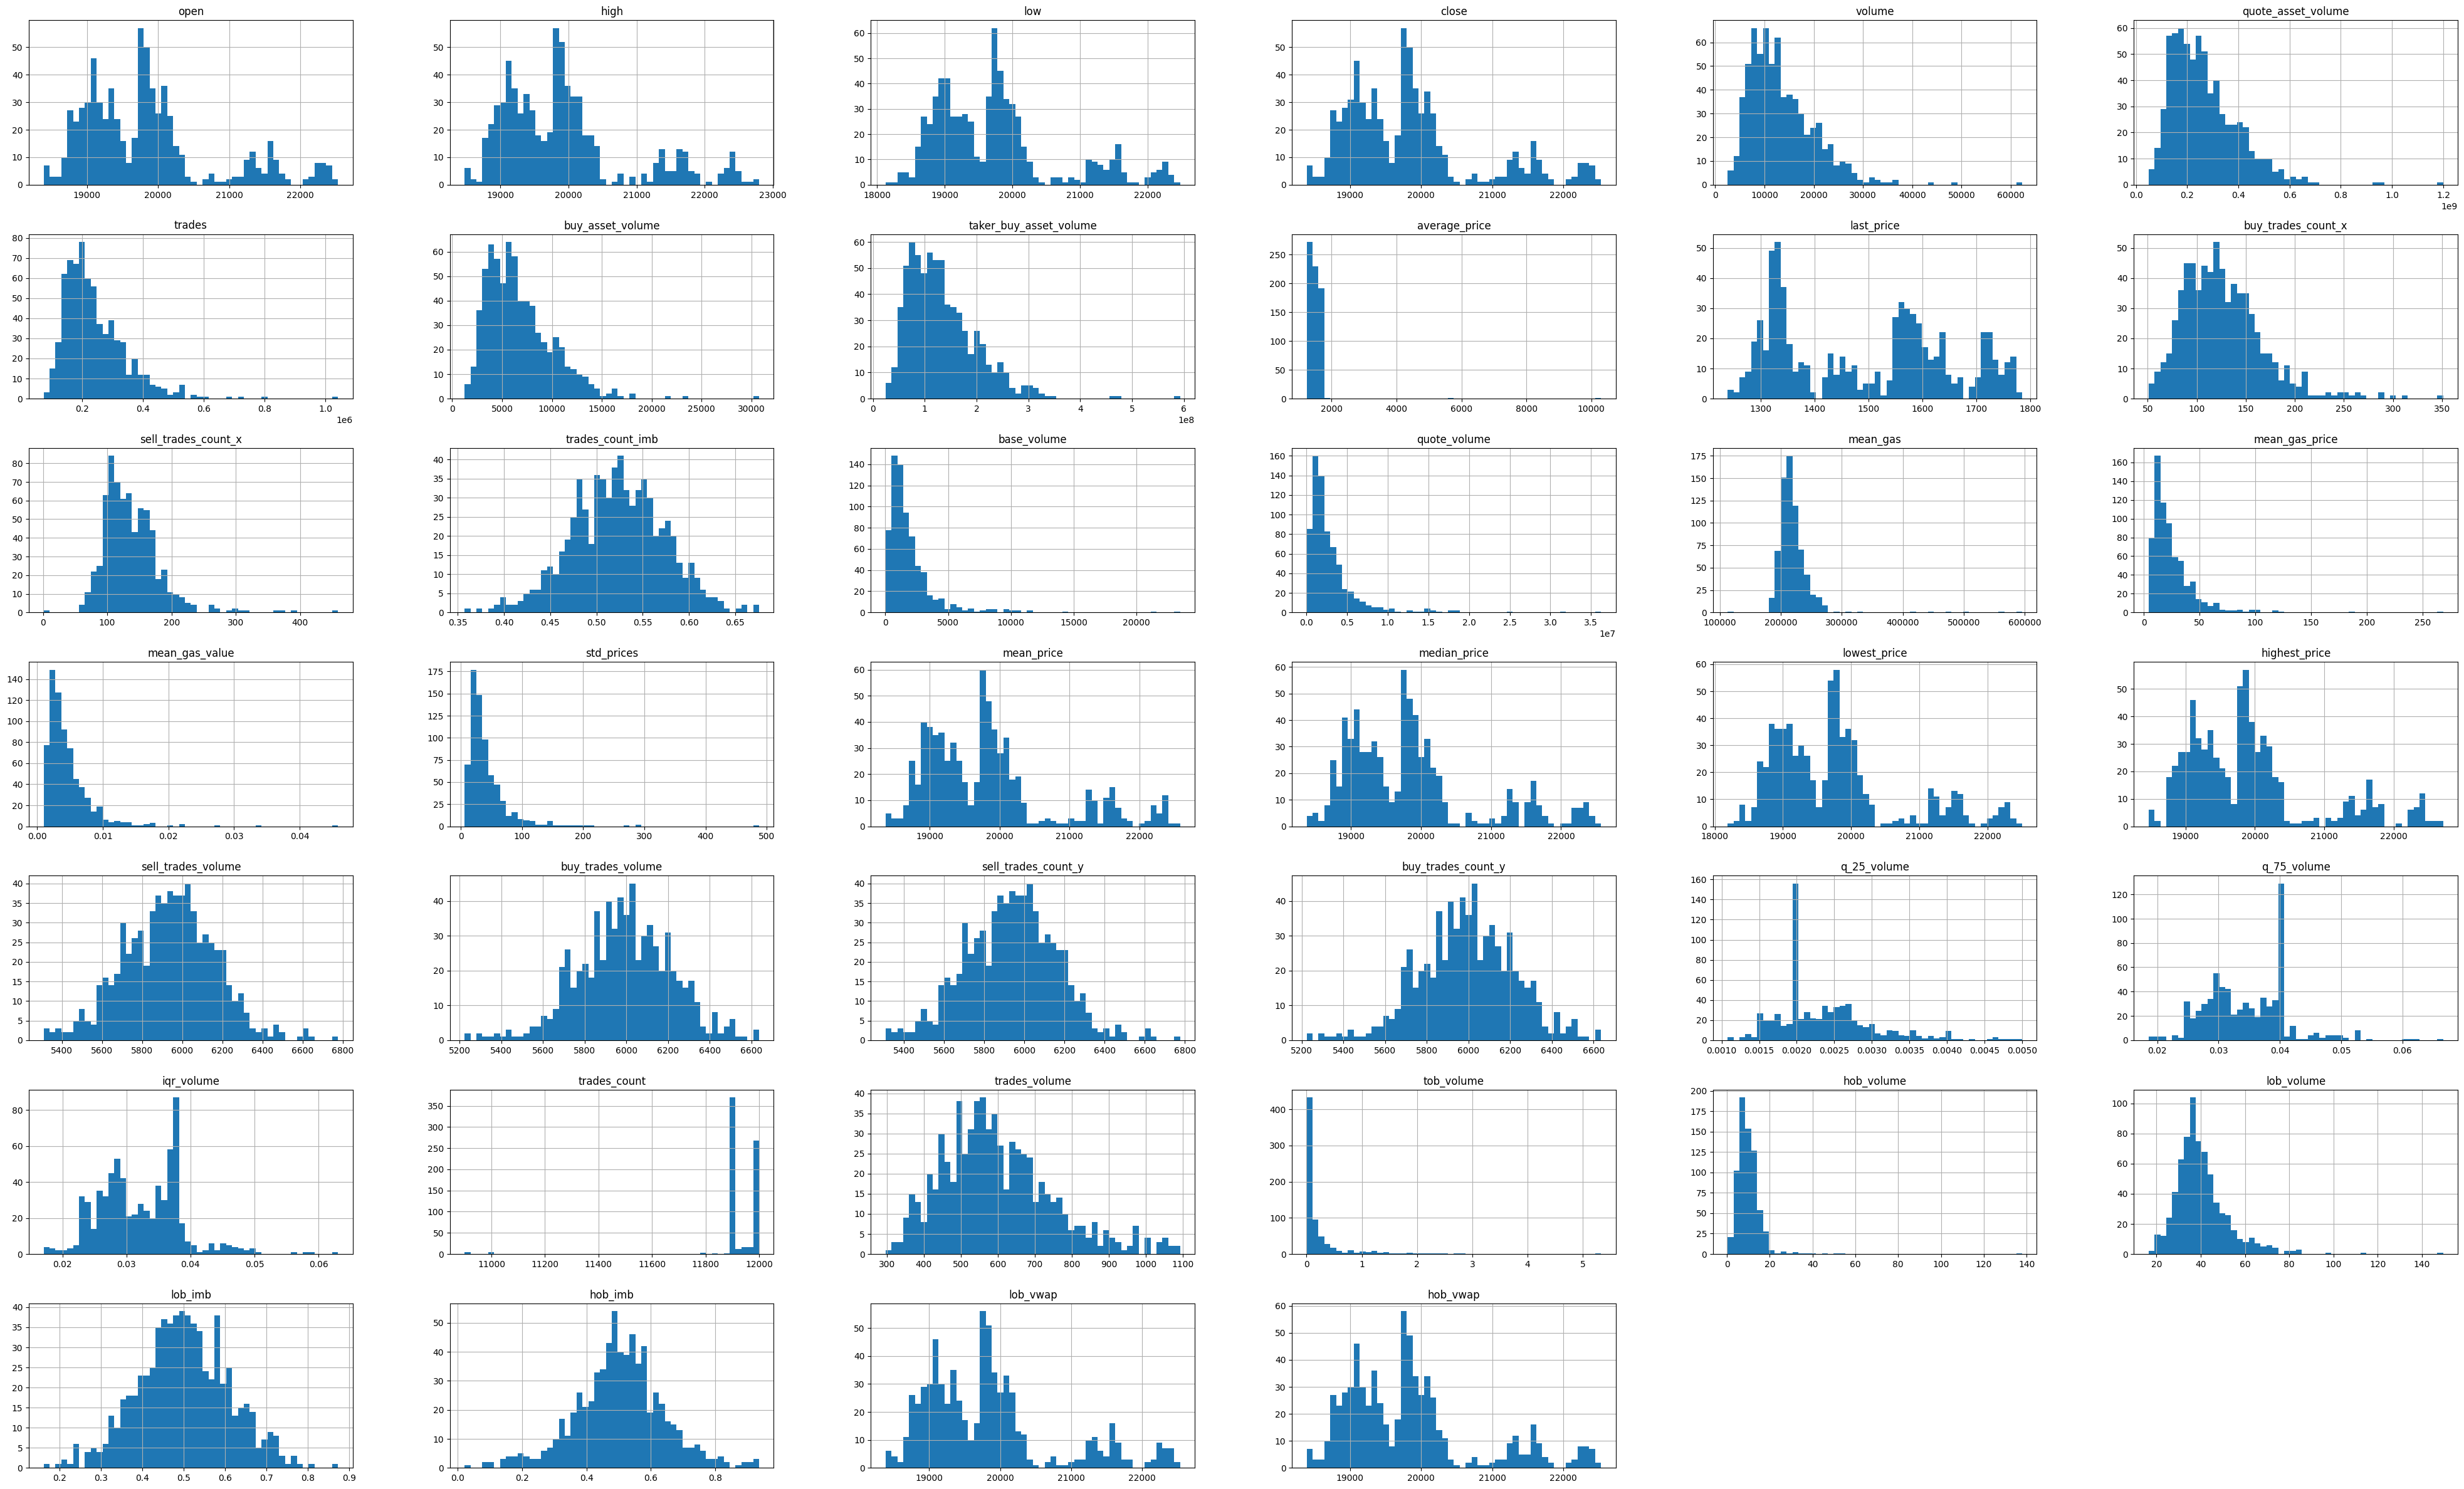

In [16]:
data_met.hist(bins=50, figsize=(50,30))
plt.show()

In [17]:
ohlcv = data_uni.copy()
# OHLC Chart
fig = go.Figure(data=go.Ohlc(x=ohlcv.index,
                             open=ohlcv['open'],
                             high=ohlcv['high'],
                             low=ohlcv['low'],
                             close=ohlcv['close']))

fig.show()


In [18]:
ohlcv =data_met.copy()

In [19]:
# Volatility
volatility = []
for i in range(len(ohlcv)):
    vol = ohlcv['high'][i] - ohlcv['low'][i]
    volatility.append(vol)
ohlcv['volatility'] = volatility

# micro trends
high_open = []
for i in range(len(ohlcv)):
    ho = ohlcv['high'][i] - ohlcv['open'][i]
    high_open.append(ho)
ohlcv['high_open'] = high_open

open_low = []
for i in range(len(ohlcv)):
    ol = ohlcv['open'][i] - ohlcv['low'][i]
    open_low.append(ol)
ohlcv['open_low'] = open_low

close_open = []
for i in range(len(ohlcv)):
    co = ohlcv['close'][i] - ohlcv['open'][i]
    close_open.append(co)
ohlcv['close_open'] = close_open
ohlcv.head()

ohlcv2 = ohlcv.copy()
ohlcv2.head()

open      high       low     close       volume  \
timestamp                                                                  
2022-09-01 00:00:00  20048.44  20138.15  19917.01  20064.43  11108.70225   
2022-09-01 01:00:00  20064.43  20185.09  20051.22  20127.45   7942.65870   
2022-09-01 02:00:00  20127.45  20208.37  20069.35  20118.09   7256.77429   
2022-09-01 03:00:00  20119.43  20181.22  19931.00  20022.97   9197.00362   
2022-09-01 04:00:00  20023.82  20095.00  19991.45  20055.59   6641.98427   

                     quote_asset_volume    trades  buy_asset_volume  \
timestamp                                                             
2022-09-01 00:00:00        2.227086e+08  279177.0        5395.01867   
2022-09-01 01:00:00        1.598106e+08  200276.0        3931.12427   
2022-09-01 02:00:00        1.462403e+08  180778.0        3499.98625   
2022-09-01 03:00:00        1.846665e+08  235205.0        4549.71898   
2022-09-01 04:00:00        1.331403e+08  179667.0        3291.45492   

                     taker_buy_asset_volume  average_price  ...  hob_volume  \
timestamp                                                   ...               
2022-09-01 00:00:00            1.081630e+08    1552.570645  ...     2.25707   
2022-09-01 01:00:00            7.910244e+07    1555.677524  ...     7.15585   
2022-09-01 02:00:00            7.053971e+07    1564.380999  ...     4.02212   
2022-09-01 03:00:00            9.136052e+07    1553.619675  ...     6.71761   
2022-09-01 04:00:00            6.598071e+07    1550.457083  ...     8.64050   

                     lob_volume   lob_imb   hob_imb    lob_vwap      hob_vwap  \
timestamp                                                                       
2022-09-01 00:00:00    20.77947  0.497895  0.451944  20065.2594  20064.906130   
2022-09-01 01:00:00    24.39177  0.476786  0.580086  20126.3077  20126.725479   
2022-09-01 02:00:00    21.07600  0.352099  0.500890  20117.4257  20118.779594   
2022-09-01 03:00:00    31.29966  0.521034  0.452606  20024.4041  20023.614629   
2022-09-01 04:00:00    37.54445  0.707895  0.781071  20058.0175  20056.908214   

                     volatility  high_open  open_low  close_open  
timestamp                                                         
2022-09-01 00:00:00      221.14      89.71    131.43       15.99  
2022-09-01 01:00:00      133.87     120.66     13.21       63.02  
2022-09-01 02:00:00      139.02      80.92     58.10       -9.36  
2022-09-01 03:00:00      250.22      61.79    188.43      -96.46  
2022-09-01 04:00:00      103.55      71.18     32.37       31.77  

[5 rows x 44 columns]

In [20]:
# %% Rolling stats
ohlcv2 = ohlcv2.drop(['quote_asset_volume', 'buy_asset_volume', 'taker_buy_asset_volume', 'trades'], axis=1)

def autoregressive_features(p_data, p_memory):
    """
    Creacion de variables de naturaleza autoregresiva (resagos, promedios, diferencias)
    Parameters
    ----------
    p_data: pd.DataFrame
        with OHLCV columns: Open, High, Low, Close, Volume
    p_memory: int
        A value that represents the implicit assumption of a "memory" effect in the prices
    Returns
    -------
    r_features: pd.DataFrame

    """

    # work with a separate copy of original data
    data = ohlcv2.copy()

    # nth-period final price "movement"
    data['co'] = (data['close'] - data['open'])
    # nth-period uptrend movement
    data['ho'] = (data['high'] - data['open'])
    # nth-period downtrend movement
    data['ol'] = (data['open'] - data['low'])
    # nth-period volatility measure
    data['hl'] = (data['high'] - data['low'])

    # N features with window-based calculations
    for n in range(0, p_memory):
        data['ma_ol'] = data['ol'].rolling(n + 2).mean()
        data['ma_ho'] = data['ho'].rolling(n + 2).mean()
        data['ma_hl'] = data['hl'].rolling(n + 2).mean()

        data['lag_ol_' + str(n + 1)] = data['ol'].shift(n + 1)
        data['lag_ho_' + str(n + 1)] = data['ho'].shift(n + 1)
        data['lag_hl_' + str(n + 1)] = data['hl'].shift(n + 1)

        data['sd_ol_' + str(n + 1)] = data['ol'].rolling(n + 1).std()
        data['sd_ho_' + str(n + 1)] = data['ho'].rolling(n + 1).std()
        data['sd_hl_' + str(n + 1)] = data['hl'].rolling(n + 1).std()

        data['lag_vol_' + str(n + 1)] = data['volume'].shift(n + 1)
        data['sum_vol_' + str(n + 1)] = data['volume'].rolling(n + 1).sum()
        data['mean_vol_' + str(n + 1)] = data['volume'].rolling(n + 1).mean()

    # timestamp as index
    data.index = pd.to_datetime(data.index)
    # select columns, drop for NAs, change column types, reset index
    r_features = data.drop(['open', 'high', 'low', 'close', 'hl', 'ol', 'ho', 'volume'], axis=1)
    r_features = r_features.dropna(axis='columns', how='all')
    # r_features = r_features.dropna(axis='rows')
    r_features.iloc[:, 1:] = r_features.iloc[:, 1:].astype(float)
    r_features.reset_index(inplace=True, drop=True)

    return r_features

In [21]:
p_memory = 24
data_ar = autoregressive_features(p_data=ohlcv2, p_memory=p_memory)
data_ar.index = ohlcv2.index

C:\Users\Emilio\AppData\Local\Temp\ipykernel_23884\3380875049.py:38: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Emilio\AppData\Local\Temp\ipykernel_23884\3380875049.py:39: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Emilio\AppData\Local\Temp\ipykernel_23884\3380875049.py:41: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

In [22]:
ohlcv = pd.merge(ohlcv, data_ar, on='timestamp')
ohlcv = ohlcv.dropna(axis='rows')
ohlcv

open      high       low     close       volume  \
timestamp                                                                  
2022-09-02 00:00:00  20132.64  20137.13  20047.61  20072.73   6596.35671   
2022-09-02 01:00:00  20072.73  20097.33  20008.65  20050.84   6023.42328   
2022-09-02 02:00:00  20049.83  20082.08  19957.78  20033.01   6853.62093   
2022-09-02 03:00:00  20033.01  20245.89  20029.83  20157.01  10870.15267   
2022-09-02 04:00:00  20157.01  20298.00  20140.37  20161.07   7988.89076   
...                       ...       ...       ...       ...          ...   
2022-09-29 19:00:00  19301.25  19487.96  19296.68  19405.37  15817.49109   
2022-09-29 20:00:00  19402.63  19540.71  19379.74  19505.64   9727.75583   
2022-09-29 21:00:00  19507.09  19520.00  19417.87  19430.15   5310.54832   
2022-09-29 22:00:00  19431.42  19539.56  19417.88  19456.07  11951.94972   
2022-09-29 23:00:00  19455.06  19620.00  19430.04  19591.51  12876.44608   

                     quote_asset_volume    trades  buy_asset_volume  \
timestamp                                                             
2022-09-02 00:00:00        1.324784e+08  165467.0        3197.29516   
2022-09-02 01:00:00        1.207582e+08  149177.0        2995.03804   
2022-09-02 02:00:00        1.371032e+08  171787.0        3388.52760   
2022-09-02 03:00:00        2.193347e+08  279835.0        5635.88715   
2022-09-02 04:00:00        1.613986e+08  198907.0        3973.72094   
...                                 ...       ...               ...   
2022-09-29 19:00:00        3.068472e+08  231450.0        7836.84400   
2022-09-29 20:00:00        1.891630e+08  138946.0        5033.58351   
2022-09-29 21:00:00        1.034403e+08   88667.0        2479.32039   
2022-09-29 22:00:00        2.327848e+08  136925.0        5826.49477   
2022-09-29 23:00:00        2.513181e+08  144044.0        6534.37342   

                     taker_buy_asset_volume  average_price_x  ...  \
timestamp                                                     ...   
2022-09-02 00:00:00            6.421437e+07      1580.016966  ...   
2022-09-02 01:00:00            6.004943e+07      1577.896438  ...   
2022-09-02 02:00:00            6.778785e+07      1574.623307  ...   
2022-09-02 03:00:00            1.137103e+08      1596.905795  ...   
2022-09-02 04:00:00            8.028705e+07      1598.698746  ...   
...                                     ...              ...  ...   
2022-09-29 19:00:00            1.520366e+08      1334.585814  ...   
2022-09-29 20:00:00            9.789788e+07      1334.970180  ...   
2022-09-29 21:00:00            4.829437e+07      1335.833032  ...   
2022-09-29 22:00:00            1.134833e+08      1333.525027  ...   
2022-09-29 23:00:00            1.275543e+08      1331.920469  ...   

                      mean_vol_23  lag_ol_24  lag_ho_24  lag_hl_24   sd_ol_24  \
timestamp                                                                       
2022-09-02 00:00:00  10123.259495     131.43      89.71     221.14  79.195557   
2022-09-02 01:00:00  10069.635538      13.21     120.66     133.87  77.969052   
2022-09-02 02:00:00   9967.749334      58.10      80.92     139.02  77.800105   
2022-09-02 03:00:00  10151.582743     188.43      61.79     250.22  76.234809   
2022-09-02 04:00:00  10173.047737      32.37      71.18     103.55  76.701184   
...                           ...        ...        ...        ...        ...   
2022-09-29 19:00:00  17528.825835      91.29     103.62     194.91  90.172575   
2022-09-29 20:00:00  17490.709899      54.85      80.49     135.34  91.301772   
2022-09-29 21:00:00  17094.281576      43.77     220.39     264.16  90.292118   
2022-09-29 22:00:00  17110.803760     207.21      47.69     254.90  90.238343   
2022-09-29 23:00:00  16959.947896      99.53      73.03     172.56  91.731512   

                      sd_ho_24    sd_hl_24   lag_vol_24    sum_vol_24  \
timestamp                                                               
2022-09-02 00:

In [23]:
ohlcv['timestamp']=ohlcv.index
ohlcv3= ohlcv.drop_duplicates(subset='timestamp', keep='first')

ohlcv4 = ohlcv3.iloc[:,:-1]
ohlcv4

open      high       low     close       volume  \
timestamp                                                                  
2022-09-02 00:00:00  20132.64  20137.13  20047.61  20072.73   6596.35671   
2022-09-02 01:00:00  20072.73  20097.33  20008.65  20050.84   6023.42328   
2022-09-02 02:00:00  20049.83  20082.08  19957.78  20033.01   6853.62093   
2022-09-02 03:00:00  20033.01  20245.89  20029.83  20157.01  10870.15267   
2022-09-02 04:00:00  20157.01  20298.00  20140.37  20161.07   7988.89076   
...                       ...       ...       ...       ...          ...   
2022-09-29 19:00:00  19301.25  19487.96  19296.68  19405.37  15817.49109   
2022-09-29 20:00:00  19402.63  19540.71  19379.74  19505.64   9727.75583   
2022-09-29 21:00:00  19507.09  19520.00  19417.87  19430.15   5310.54832   
2022-09-29 22:00:00  19431.42  19539.56  19417.88  19456.07  11951.94972   
2022-09-29 23:00:00  19455.06  19620.00  19430.04  19591.51  12876.44608   

                     quote_asset_volume    trades  buy_asset_volume  \
timestamp                                                             
2022-09-02 00:00:00        1.324784e+08  165467.0        3197.29516   
2022-09-02 01:00:00        1.207582e+08  149177.0        2995.03804   
2022-09-02 02:00:00        1.371032e+08  171787.0        3388.52760   
2022-09-02 03:00:00        2.193347e+08  279835.0        5635.88715   
2022-09-02 04:00:00        1.613986e+08  198907.0        3973.72094   
...                                 ...       ...               ...   
2022-09-29 19:00:00        3.068472e+08  231450.0        7836.84400   
2022-09-29 20:00:00        1.891630e+08  138946.0        5033.58351   
2022-09-29 21:00:00        1.034403e+08   88667.0        2479.32039   
2022-09-29 22:00:00        2.327848e+08  136925.0        5826.49477   
2022-09-29 23:00:00        2.513181e+08  144044.0        6534.37342   

                     taker_buy_asset_volume  average_price_x  ...  \
timestamp                                                     ...   
2022-09-02 00:00:00            6.421437e+07      1580.016966  ...   
2022-09-02 01:00:00            6.004943e+07      1577.896438  ...   
2022-09-02 02:00:00            6.778785e+07      1574.623307  ...   
2022-09-02 03:00:00            1.137103e+08      1596.905795  ...   
2022-09-02 04:00:00            8.028705e+07      1598.698746  ...   
...                                     ...              ...  ...   
2022-09-29 19:00:00            1.520366e+08      1334.585814  ...   
2022-09-29 20:00:00            9.789788e+07      1334.970180  ...   
2022-09-29 21:00:00            4.829437e+07      1335.833032  ...   
2022-09-29 22:00:00            1.134833e+08      1333.525027  ...   
2022-09-29 23:00:00            1.275543e+08      1331.920469  ...   

                      mean_vol_23  lag_ol_24  lag_ho_24  lag_hl_24   sd_ol_24  \
timestamp                                                                       
2022-09-02 00:00:00  10123.259495     131.43      89.71     221.14  79.195557   
2022-09-02 01:00:00  10069.635538      13.21     120.66     133.87  77.969052   
2022-09-02 02:00:00   9967.749334      58.10      80.92     139.02  77.800105   
2022-09-02 03:00:00  10151.582743     188.43      61.79     250.22  76.234809   
2022-09-02 04:00:00  10173.047737      32.37      71.18     103.55  76.701184   
...                           ...        ...        ...        ...        ...   
2022-09-29 19:00:00  17528.825835      91.29     103.62     194.91  90.172575   
2022-09-29 20:00:00  17490.709899      54.85      80.49     135.34  91.301772   
2022-09-29 21:00:00  17094.281576      43.77     220.39     264.16  90.292118   
2022-09-29 22:00:00  17110.803760     207.21      47.69     254.90  90.238343   
2022-09-29 23:00:00  16959.947896      99.53      73.03     172.56  91.731512   

                      sd_ho_24    sd_hl_24   lag_vol_24    sum_vol_24  \
timestamp                                                               
2022-09-02 00:

In [24]:
ohlcv4['co'].describe()

count     672.000000
mean       -0.802336
std       135.066123
min     -1124.420000
25%       -53.912500
50%         2.275000
75%        55.442500
max       632.720000
Name: co, dtype: float64

In [25]:
ohlcv4.describe()

open          high           low         close        volume  \
count    672.000000    672.000000    672.000000    672.000000    672.000000   
mean   19821.124167  19912.067173  19726.057946  19820.321830  13615.055968   
std      931.466085    938.702006    930.759949    931.431759   6764.991382   
min    18389.220000  18473.770000  18125.980000  18389.220000   2519.199540   
25%    19117.110000  19208.975000  19027.457500  19117.337500   8599.366005   
50%    19737.190000  19793.040000  19651.360000  19732.660000  12328.507990   
75%    20114.325000  20184.297500  20022.147500  20111.835000  17169.635523   
max    22531.960000  22799.000000  22482.000000  22531.180000  62287.895400   

       quote_asset_volume        trades  buy_asset_volume  \
count        6.720000e+02  6.720000e+02        672.000000   
mean         2.698916e+08  2.425927e+05       6803.851779   
std          1.344735e+08  1.045090e+05       3392.798390   
min          4.975548e+07  7.384800e+04       1245.259540   
25%          1.701945e+08  1.698572e+05       4259.485500   
50%          2.455341e+08  2.174325e+05       6112.948920   
75%          3.408208e+08  2.934398e+05       8546.985668   
max          1.199196e+09  1.041806e+06      30770.115630   

       taker_buy_asset_volume  average_price_x  ...   mean_vol_23  \
count            6.720000e+02       672.000000  ...    672.000000   
mean             1.349101e+08      1509.154027  ...  13506.882173   
std              6.754406e+07       407.628342  ...   4263.879792   
min              2.459496e+07      1236.104350  ...   5444.243408   
25%              8.310953e+07      1333.293054  ...  10561.722748   
50%              1.212721e+08      1475.675086  ...  13482.179506   
75%              1.706345e+08      1613.972947  ...  16141.599138   
max              5.927467e+08     10297.505510  ...  25083.616252   

         lag_ol_24   lag_ho_24    lag_hl_24    sd_ol_24    sd_ho_24  \
count   672.000000  672.000000   672.000000  672.000000  672.000000   
mean     94.259598   90.182381   184.441979   96.343684   81.507322   
std     116.372286   91.164549   131.672118   60.101667   33.811802   
min       0.000000    0.010000    42.350000   29.736844   20.481340   
25%      32.617500   31.087500   105.980000   60.319999   57.750033   
50%      65.220000   64.625000   151.040000   73.185761   75.464356   
75%     113.170000  115.282500   218.940000  100.299171   94.517196   
max    1201.910000  735.620000  1457.000000  280.905941  173.139558   

         sd_hl_24    lag_vol_24     sum_vol_24   mean_vol_24  
count  672.000000    672.000000     672.000000    672.000000  
mean   108.575245  13365.696150  324039.411785  13501.642158  
std     59.123669   6682.866730  101619.118611   4234.129942  
min     26.127511   2519.199540  133006.488440   5541.937018  
25%     71.856126   8454.714825  253245.439470  10551.893311  
50%     89.965133  11962.749860  323656.346000  13485.681083  
75%    130.893526  16982.540602  385118.878942  16046.619956  
max    279.256859  62287.895400  593260.741610  24719.197567  

[8 rows x 296 columns]

In [26]:
quantile= abs(ohlcv4['co'].quantile(.25)) + abs(ohlcv['co'].quantile(.75))
treshold1 =ohlcv4['co'].quantile(.25)
treshold2 =ohlcv4['co'].quantile(.50)
treshold3 = ohlcv4['co'].quantile(.75)

In [27]:
# Target 
# %% Target Engineering y_hat:CO_{t}


ohlc = pd.DataFrame(ohlcv4)

y_hat = []

for i in range(len(ohlc)):
    y_hat1 = ohlc["close"][i] - ohlc["open"][i]
    y_hat.append(y_hat1)
for i in range(len(ohlc)):
    if y_hat[i] < treshold1:
        y_hat[i] = 0
    elif treshold1 <= y_hat[i] < 0:
        y_hat[i] = 1
    elif y_hat[i] == 0:
        y_hat[i] = 1
    elif 0 < y_hat[i] <= treshold3:
        y_hat[i] = 2
    else:
        y_hat[i] = 3
# cambiar y_hat por y_hat
ohlc['y_hat'] = y_hat
y_hat_test = y_hat
ohlc.head()

open      high       low     close       volume  \
timestamp                                                                  
2022-09-02 00:00:00  20132.64  20137.13  20047.61  20072.73   6596.35671   
2022-09-02 01:00:00  20072.73  20097.33  20008.65  20050.84   6023.42328   
2022-09-02 02:00:00  20049.83  20082.08  19957.78  20033.01   6853.62093   
2022-09-02 03:00:00  20033.01  20245.89  20029.83  20157.01  10870.15267   
2022-09-02 04:00:00  20157.01  20298.00  20140.37  20161.07   7988.89076   

                     quote_asset_volume    trades  buy_asset_volume  \
timestamp                                                             
2022-09-02 00:00:00        1.324784e+08  165467.0        3197.29516   
2022-09-02 01:00:00        1.207582e+08  149177.0        2995.03804   
2022-09-02 02:00:00        1.371032e+08  171787.0        3388.52760   
2022-09-02 03:00:00        2.193347e+08  279835.0        5635.88715   
2022-09-02 04:00:00        1.613986e+08  198907.0        3973.72094   

                     taker_buy_asset_volume  average_price_x  ...  lag_ol_24  \
timestamp                                                     ...              
2022-09-02 00:00:00            6.421437e+07      1580.016966  ...     131.43   
2022-09-02 01:00:00            6.004943e+07      1577.896438  ...      13.21   
2022-09-02 02:00:00            6.778785e+07      1574.623307  ...      58.10   
2022-09-02 03:00:00            1.137103e+08      1596.905795  ...     188.43   
2022-09-02 04:00:00            8.028705e+07      1598.698746  ...      32.37   

                     lag_ho_24  lag_hl_24   sd_ol_24   sd_ho_24   sd_hl_24  \
timestamp                                                                    
2022-09-02 00:00:00      89.71     221.14  79.195557  70.243270  69.581972   
2022-09-02 01:00:00     120.66     133.87  77.969052  71.005056  71.158345   
2022-09-02 02:00:00      80.92     139.02  77.800105  71.773114  71.470883   
2022-09-02 03:00:00      61.79     250.22  76.234809  76.444942  70.050484   
2022-09-02 04:00:00      71.18     103.55  76.701184  77.111169  68.855672   

                      lag_vol_24    sum_vol_24   mean_vol_24  y_hat  
timestamp                                                            
2022-09-02 00:00:00  11108.70225  240777.62709  10032.401129      0  
2022-09-02 01:00:00   7942.65870  238858.39167   9952.432986      1  
2022-09-02 02:00:00   7256.77429  238455.23831   9935.634930      1  
2022-09-02 03:00:00   9197.00362  240128.38736  10005.349473      3  
2022-09-02 04:00:00   6641.98427  241475.29385  10061.470577      2  

[5 rows x 297 columns]

In [28]:
ohlc['y_hat'] = y_hat
ohlc['y_hat'] = ohlc['y_hat']#.shift(-1)
# ohlc.dropna(inplace = True, axis=0)
ohlc.head()
ohlc['y_hat'].value_counts()

2    174
0    168
3    168
1    162
Name: y_hat, dtype: int64

In [29]:
mart = []
# cambiar threshold a variables, en vez de hardcode que defina las clases y puede ser asimetrica.
for i in range(len(ohlc)):
    y_hat1 = ohlc["close"][i] - ohlc["open"][i]
    mart.append(y_hat1)
for i in range(len(ohlc)):
    if mart[i] < treshold1:
        mart[i] = 0
    elif treshold1 <= mart[i] < 0:
        mart[i] = 1
    elif mart[i] == 0:
        mart[i] = 1
    elif 0 < mart[i] <= treshold3:
        mart[i] = 2
    else:
        mart[i] = 3


In [30]:
ohlc['martingale'] = mart
ohlc['martingale'] = ohlc['martingale'].shift(+1)
ohlc = ohlc.fillna(1)
ohlc2 = pd.DataFrame(ohlc)
ohlc2.to_csv('C:/Users/Emilio/Desktop/Thesis/ohlc2.csv')
ohlc2['martingale'].value_counts()


2.0    174
0.0    168
3.0    167
1.0    163
Name: martingale, dtype: int64

In [31]:
print(ohlc['y_hat'].describe())

count    672.000000
mean       1.508929
std        1.118831
min        0.000000
25%        0.750000
50%        2.000000
75%        2.250000
max        3.000000
Name: y_hat, dtype: float64


In [32]:
accuracy_martingala = accuracy_score(y_hat_test, ohlc2['martingale']) * 100
recall_martingala = recall_score(y_hat_test, ohlc2['martingale'], average='weighted') * 100
precision_martingala = precision_score(y_hat_test, ohlc2['martingale'], average='weighted') * 100
f1_martingala = f1_score(y_hat_test, ohlc2['martingale'], average='weighted') * 100
balanced_martingala = balanced_accuracy_score(y_hat_test, ohlc2['martingale']) * 100

print('Accuracy:', accuracy_martingala, '%')
print('Recall:', recall_martingala, '%')
print('Precision:', precision_martingala, '%')
print('F1:', f1_martingala, '%')
print('Balanced Accuracy:', balanced_martingala, '%')

Accuracy: 25.595238095238095 %
Recall: 25.595238095238095 %
Precision: 25.601579487825397 %
F1: 25.598299710240006 %
Balanced Accuracy: 25.537082649151614 %


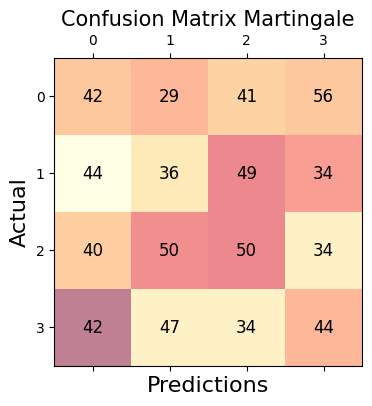

In [33]:
confusion_mart = confusion_matrix(ohlc2['y_hat'], ohlc2['martingale'])
fig, px = plt.subplots(figsize=(4, 4))
px.matshow(confusion_mart, cmap=plt.cm.YlOrRd, alpha=0.5)
for m in range(confusion_mart.shape[0]):
    for n in range(confusion_mart.shape[1]):
        px.text(x=m, y=n, s=confusion_mart[m, n], va='center', ha='center', size='large')

# Sets the labels
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.title('Confusion Matrix Martingale', fontsize=15)
plt.show()

<AxesSubplot:>

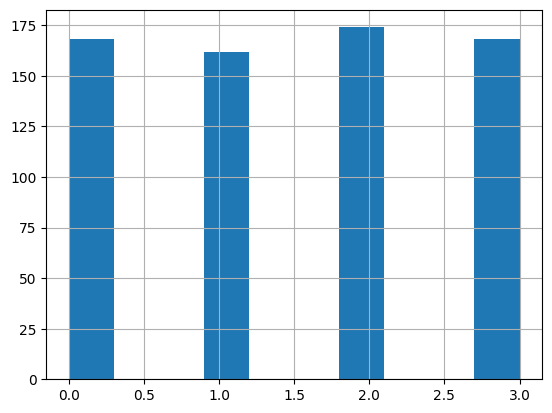

In [34]:
ohlc2['y_hat'].hist()


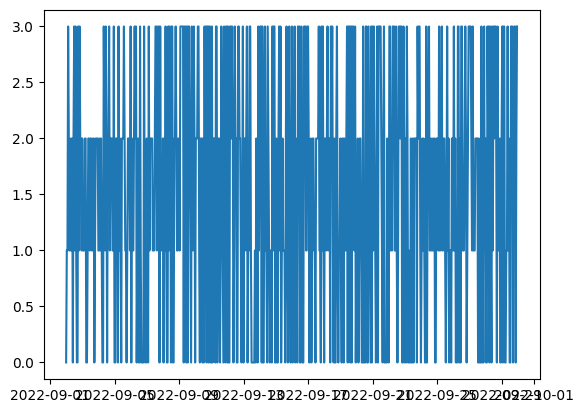

In [35]:
plt.plot(ohlc2['y_hat'])

{'whiskers': [<matplotlib.lines.Line2D at 0x272db316980>,
 'caps': [<matplotlib.lines.Line2D at 0x272db316f20>,
 'boxes': [<matplotlib.lines.Line2D at 0x272db3166b0>],
 'medians': [<matplotlib.lines.Line2D at 0x272db3174c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x272db317790>],
 'means': []}

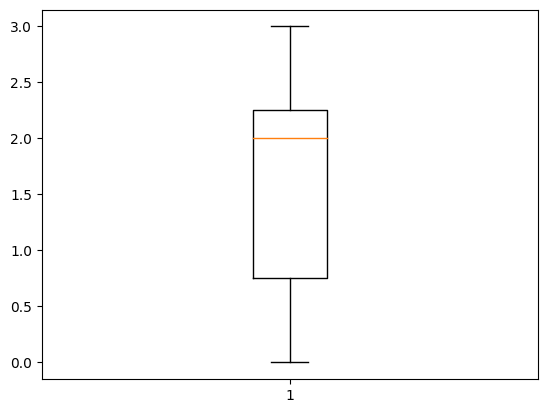

In [36]:
plt.boxplot(ohlc2['y_hat'], notch=None, vert=None, patch_artist=None, widths=None)

{'whiskers': [<matplotlib.lines.Line2D at 0x272dc630910>,
 'caps': [<matplotlib.lines.Line2D at 0x272dc630eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x272dc630640>,
 'medians': [<matplotlib.lines.Line2D at 0x272dc631450>,
 'fliers': [<matplotlib.lines.Line2D at 0x272dc631720>,
 'means': []}

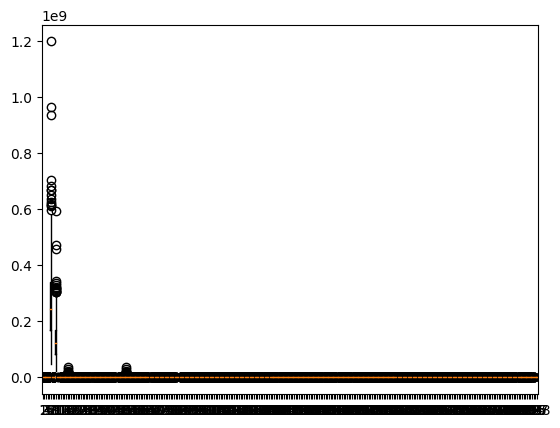

In [37]:
plt.boxplot(ohlc2,notch=None, vert=None, patch_artist=None, widths=None)

In [38]:
corr_y = ohlc2.corrwith(ohlc2['y_hat']).abs()
corr_y

open           0.045568
high           0.013908
low            0.017724
close          0.065370
volume         0.013834
                 ...   
lag_vol_24     0.062050
sum_vol_24     0.019883
mean_vol_24    0.019883
y_hat          1.000000
martingale     0.054872
Length: 298, dtype: float64

In [39]:
ohlc2.to_csv('ohlc2.csv')

In [40]:
X = ohlc2.iloc[:, :-2]
X.head()
y = ohlc2['y_hat'].copy()
y_true = y.copy()
y.head()

timestamp
2022-09-02 00:00:00    0
2022-09-02 01:00:00    1
2022-09-02 02:00:00    1
2022-09-02 03:00:00    3
2022-09-02 04:00:00    2
Name: y_hat, dtype: int64

In [41]:
y = ohlc2['y_hat'].copy()
y

timestamp
2022-09-02 00:00:00    0
2022-09-02 01:00:00    1
2022-09-02 02:00:00    1
2022-09-02 03:00:00    3
2022-09-02 04:00:00    2
                      ..
2022-09-29 19:00:00    3
2022-09-29 20:00:00    3
2022-09-29 21:00:00    0
2022-09-29 22:00:00    2
2022-09-29 23:00:00    3
Name: y_hat, Length: 672, dtype: int64

In [42]:
symbolic_params = {'functions': ["sub", "add", 'inv', 'mul', 'div', 'abs', 'log','sqrt'],
        'population': 12000, 'tournament':3000, 'hof': 300, 'generations': 7, 'n_features':100,
        'init_depth': (2,16), 'init_method': 'half and half', 'parsimony': 0.1, 'constants': None,
        'metric': 'pearson', 'metric_goal': 0.65, 
        'prob_cross': 0.4, 'prob_mutation_subtree': 0.5,
        'prob_mutation_hoist': 0.05, 'prob_mutation_point': 0.05,
        'verbose': True, 'random_cv': None, 'parallelization': True, 'warm_start': True }

In [43]:
def symbolic_features(p_x, p_y, p_params):
    """
    Feature engineering process with symbolic variables by using genetic programming. 
    Parameters
    ----------
    p_x: pd.DataFrame / np.array / list
        with regressors or predictor variables
        p_x = data_features.iloc[:, 1:]
    p_y: pd.DataFrame / np.array / list
        with variable to predict
        p_y = data_features.iloc[:, 0]
    p_params: dict
        with parameters for the genetic programming function
        p_params = {'functions': ["sub", "add", 'inv', 'mul', 'div', 'abs', 'log'],
        'population': 5000, 'tournament':20, 'hof': 20, 'generations': 5, 'n_features':20,
        'init_depth': (4,8), 'init_method': 'half and half', 'parsimony': 0.1, 'constants': None,
        'metric': 'pearson', 'metric_goal': 0.65, 
        'prob_cross': 0.4, 'prob_mutation_subtree': 0.3,
        'prob_mutation_hoist': 0.1. 'prob_mutation_point': 0.2,
        'verbose': True, 'random_cv': None, 'parallelization': True, 'warm_start': True }
    Returns
    -------
    results: dict
        With response information
        {'fit': model fitted, 'params': model parameters, 'model': model,
         'data': generated data with variables, 'best_programs': models best programs}
    References
    ----------
    https://gplearn.readthedocs.io/en/stable/reference.html#gplearn.genetic.SymbolicTransformer
    
    
    **** NOTE ****
    simplified internal calculation for correlation (asuming w=1)
    
    y_pred_demean = y_pred - np.average(y_pred)
    y_demean = y - np.average(y)
                              np.sum(y_pred_demean * y_demean)
    pearson =  ---------------------------------------------------------------
                np.sqrt((np.sum(y_pred_demean ** 2) * np.sum(y_demean ** 2)))  
    """
     
    # Function to produce Symbolic Features
    model = SymbolicTransformer(function_set=p_params['functions'], population_size=p_params['population'],
                                tournament_size=p_params['tournament'], hall_of_fame=p_params['hof'],
                                generations=p_params['generations'], n_components=p_params['n_features'],

                                init_depth=p_params['init_depth'], init_method=p_params['init_method'],
                                parsimony_coefficient=p_params['parsimony'],
                                const_range=p_params['constants'],
                                
                                metric=p_params['metric'], stopping_criteria=p_params['metric_goal'],

                                p_crossover=p_params['prob_cross'],
                                p_subtree_mutation=p_params['prob_mutation_subtree'],
                                p_hoist_mutation=p_params['prob_mutation_hoist'],
                                p_point_mutation=p_params['prob_mutation_point'],
                                max_samples=1,

                                verbose=p_params['verbose'], warm_start=p_params['warm_start'],
                                random_state=123, n_jobs=-1 if p_params['parallelization'] else 1,
                                feature_names=p_x.columns)

    # SymbolicTransformer fit
    model_fit = model.fit_transform(p_x, p_y)

    # output data of the model
    data = pd.DataFrame(model_fit)

    # parameters of the model
    model_params = model.get_params()

    # best programs dataframe
    best_programs = {}
    for p in model._best_programs:
        factor_name = 'sym' + str(model._best_programs.index(p))
        best_programs[factor_name] = {'raw_fitness': p.raw_fitness_, 'reg_fitness': p.fitness_, 
                                      'expression': str(p), 'depth': p.depth_, 'length': p.length_}

    # format and sorting
    best_programs = pd.DataFrame(best_programs).T
    best_programs.drop_duplicates(subset = ['expression'])
    best_programs = best_programs.sort_values(by='raw_fitness', ascending=False)

    # results
    results = {'fit': model_fit, 'params': model_params, 'model': model, 'data': data,
               'best_programs': best_programs, 'details': model.run_details_}

    return results
    print(best_programs)

In [44]:
def genetic_programed_features(p_data, p_target, p_params):
    """
    El uso de programacion genetica para generar variables independientes simbolicas
    Parameters
    ----------
    p_data: pd.DataFrame
        con datos completos para ajustar modelos
        
        p_data = m_folds['periodo_1']
    p_split: int
        split in val
        p_split = '0'
    p_params:
        parameters for symbolic_features process 
    Returns
    -------
    model_data: dict
        {'train_x': pd.DataFrame, 'train_y': pd.DataFrame, 'val_x': pd.DataFrame, 'val_y': pd.DataFrame}
    References
    ----------
    https://stackoverflow.com/questions/3819977/
    what-are-the-differences-between-genetic-algorithms-and-genetic-programming
    """
   
    # separacion de variable dependiente
    datos_y = y.copy().astype(int)

    # separacion de variables independientes
    datos_had = X.copy()
    # Lista de operaciones simbolicas
    sym_data = symbolic_features(p_x=datos_had, p_y=datos_y, p_params=symbolic_params)

    # Symbolic variables output
    datos_sym = sym_data['data'].copy()
    datos_sym.columns = ['sym_' + str(i) for i in range(0, len(sym_data['data'].iloc[0, :]))]
    datos_sym.index = datos_y.index
   
    return {'sym_data': sym_data, 'sym_features': datos_sym}

In [45]:
genetic_prog = genetic_programed_features(p_data=X, p_target=y, p_params=symbolic_params)

# Process description
sym_process = pd.DataFrame(genetic_prog['sym_data']['details'])
sym_features = genetic_prog['sym_features']


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0   189.08        0.0487426        7         0.792379              N/A      2.29m


In [46]:
sym_features

sym_0     sym_1     sym_2     sym_3     sym_4  \
timestamp                                                               
2022-09-02 00:00:00 -0.756390  0.010375  5.677473  0.019127  0.039293   
2022-09-02 01:00:00 -0.091542  0.029732  5.002469  0.020273  0.011874   
2022-09-02 02:00:00 -0.337777  0.031036  5.617498  0.018920  0.046562   
2022-09-02 03:00:00  0.970409  0.046395  1.704748  0.000191  0.183854   
2022-09-02 04:00:00  0.031384  0.034175  4.695833  0.012916  0.071597   
...                       ...       ...       ...       ...       ...   
2022-09-29 19:00:00  0.956525  0.046923  5.841397  0.011016  0.058774   
2022-09-29 20:00:00  0.983860  0.047968  5.754729  0.016726  0.106653   
2022-09-29 21:00:00 -0.549574  0.025008  5.517975  0.022607  0.014150   
2022-09-29 22:00:00  0.219648  0.041750  6.161228  0.013510  0.027735   
2022-09-29 23:00:00  1.394786  0.047719  4.999102  0.015144  0.133436   

                        sym_5       sym_6       sym_7     sym_8       sym_9  \
timestamp                                                                     
2022-09-02 00:00:00  2.397332  131.832619  464.693555  0.759887   57.079947   
2022-09-02 01:00:00  3.421328   98.142901  598.967803  0.861755   66.007453   
2022-09-02 02:00:00  3.782747   68.270429  520.650035  0.854521   64.463307   
2022-09-02 03:00:00  5.200676   35.772705  645.757721  0.838992   45.526906   
2022-09-02 04:00:00  2.223211   25.534204  697.337944  0.922851   56.978953   
...                       ...         ...         ...       ...         ...   
2022-09-29 19:00:00  5.510247   91.372312   23.280490  0.840423   36.001609   
2022-09-29 20:00:00  6.360012  112.034308   63.308244  0.906522   34.475658   
2022-09-29 21:00:00  2.427922  277.481115  327.108827  0.847134  112.348717   
2022-09-29 22:00:00  5.184851  110.454324  249.614815  0.806283   65.566674   
2022-09-29 23:00:00  5.741379  101.382945  200.332629  0.955717   56.684391   

                     ...     sym_90     sym_91    sym_92    sym_93    sym_94  \
timestamp            ...                                                       
2022-09-02 00:00:00  ...  61.395923   0.175268  4.748172  0.570645  0.027137   
2022-09-02 01:00:00  ...  45.487615   0.151136  7.956402  1.393798  0.032054   
2022-09-02 02:00:00  ...  45.912671   1.734890  6.908172  2.102996  0.036290   
2022-09-02 03:00:00  ...   4.908008   0.077498  6.678007  0.803266  0.020153   
2022-09-02 04:00:00  ...  20.310478   0.100187  7.154007  2.255663  0.026682   
...                  ...        ...        ...       ...       ...       ...   
2022-09-29 19:00:00  ...  20.287322  -5.298175  7.508845  1.013486  0.017086   
2022-09-29 20:00:00  ...  81.284773   0.052181  7.303911  1.864525  0.017242   
2022-09-29 21:00:00  ...  65.643684  20.058152  7.710606  1.290346  0.021667   
2022-09-29 22:00:00  ...  47.459728   0.972968  6.286402  1.793648  0.022661   
2022-09-29 23:00:00  ...  29.741278   0.158606  7.635349  1.589063  0.016542   

                            sym_95    sym_96    sym_97      sym_98    sym_99  
timestamp                                                                     
2022-09-02 00:00:00  682446.622910  0.594661  0.004048    2.077083  0.875232  
2022-09-02 01:00:00   54212.388676  0.489090  0.007741    5.734572  1.043786  
2022-09-02 02:00:00  417969.988715  0.590924  0.005634   14.919459  0.605620  
2022-09-02 03:00:00    2622.493816  0.518991  0.017080  214.637541 -0.796451  
2022-09-02 04:00:00    9292.506515  0.490955  0.019221   13.797294 -0.326469  
...                            ...       ...       ...         ...       ...  
2022-09-29 19:00:00    3000.572439  0.577249  0.169820   26.162263 -1.003741  
2022-09-29 20:00:00   36282.533047  0.537346  0.017975   53.351289  0.577236  
2022-09-29 21:00:00  195157.016608  0.641248  0.002664    8.608942  0.763514  
2022-09-29 22:00:00   95463.716758  0.691621  0.008902   74.919562  0.569801  
2022-09-29 23:00:00  153029.993426  0.543162  0.009862   

In [47]:
# Create an empty set
duplicateColumnNames = set()

# Iterate through all the columns
# of dataframe
for x in range(sym_features.shape[1]):

    # Take column at xth index.
    col = sym_features.iloc[:, x]

    # Iterate through all the columns in
    # DataFrame from (x + 1)th index to
    # last index
    for y in range(x + 1, sym_features.shape[1]):

        # Take column at yth index.
        otherCol = sym_features.iloc[:, y]

        # Check if two columns at x & y
        # index are equal or not,
        # if equal then adding
        # to the set
        if col.equals(otherCol):
            duplicateColumnNames.add(sym_features.columns.values[y])
# Return list of unique column names
# whose contents are duplicates.


In [48]:
sym_data = sym_features.drop(duplicateColumnNames,axis=1)
sym_data.to_csv(route+'sym_data_test.csv')

In [49]:
sym_data

sym_0     sym_1     sym_2     sym_3     sym_4  \
timestamp                                                               
2022-09-02 00:00:00 -0.756390  0.010375  5.677473  0.019127  0.039293   
2022-09-02 01:00:00 -0.091542  0.029732  5.002469  0.020273  0.011874   
2022-09-02 02:00:00 -0.337777  0.031036  5.617498  0.018920  0.046562   
2022-09-02 03:00:00  0.970409  0.046395  1.704748  0.000191  0.183854   
2022-09-02 04:00:00  0.031384  0.034175  4.695833  0.012916  0.071597   
...                       ...       ...       ...       ...       ...   
2022-09-29 19:00:00  0.956525  0.046923  5.841397  0.011016  0.058774   
2022-09-29 20:00:00  0.983860  0.047968  5.754729  0.016726  0.106653   
2022-09-29 21:00:00 -0.549574  0.025008  5.517975  0.022607  0.014150   
2022-09-29 22:00:00  0.219648  0.041750  6.161228  0.013510  0.027735   
2022-09-29 23:00:00  1.394786  0.047719  4.999102  0.015144  0.133436   

                        sym_5       sym_6       sym_7     sym_8       sym_9  \
timestamp                                                                     
2022-09-02 00:00:00  2.397332  131.832619  464.693555  0.759887   57.079947   
2022-09-02 01:00:00  3.421328   98.142901  598.967803  0.861755   66.007453   
2022-09-02 02:00:00  3.782747   68.270429  520.650035  0.854521   64.463307   
2022-09-02 03:00:00  5.200676   35.772705  645.757721  0.838992   45.526906   
2022-09-02 04:00:00  2.223211   25.534204  697.337944  0.922851   56.978953   
...                       ...         ...         ...       ...         ...   
2022-09-29 19:00:00  5.510247   91.372312   23.280490  0.840423   36.001609   
2022-09-29 20:00:00  6.360012  112.034308   63.308244  0.906522   34.475658   
2022-09-29 21:00:00  2.427922  277.481115  327.108827  0.847134  112.348717   
2022-09-29 22:00:00  5.184851  110.454324  249.614815  0.806283   65.566674   
2022-09-29 23:00:00  5.741379  101.382945  200.332629  0.955717   56.684391   

                     ...     sym_90     sym_91    sym_92    sym_93    sym_94  \
timestamp            ...                                                       
2022-09-02 00:00:00  ...  61.395923   0.175268  4.748172  0.570645  0.027137   
2022-09-02 01:00:00  ...  45.487615   0.151136  7.956402  1.393798  0.032054   
2022-09-02 02:00:00  ...  45.912671   1.734890  6.908172  2.102996  0.036290   
2022-09-02 03:00:00  ...   4.908008   0.077498  6.678007  0.803266  0.020153   
2022-09-02 04:00:00  ...  20.310478   0.100187  7.154007  2.255663  0.026682   
...                  ...        ...        ...       ...       ...       ...   
2022-09-29 19:00:00  ...  20.287322  -5.298175  7.508845  1.013486  0.017086   
2022-09-29 20:00:00  ...  81.284773   0.052181  7.303911  1.864525  0.017242   
2022-09-29 21:00:00  ...  65.643684  20.058152  7.710606  1.290346  0.021667   
2022-09-29 22:00:00  ...  47.459728   0.972968  6.286402  1.793648  0.022661   
2022-09-29 23:00:00  ...  29.741278   0.158606  7.635349  1.589063  0.016542   

                            sym_95    sym_96    sym_97      sym_98    sym_99  
timestamp                                                                     
2022-09-02 00:00:00  682446.622910  0.594661  0.004048    2.077083  0.875232  
2022-09-02 01:00:00   54212.388676  0.489090  0.007741    5.734572  1.043786  
2022-09-02 02:00:00  417969.988715  0.590924  0.005634   14.919459  0.605620  
2022-09-02 03:00:00    2622.493816  0.518991  0.017080  214.637541 -0.796451  
2022-09-02 04:00:00    9292.506515  0.490955  0.019221   13.797294 -0.326469  
...                            ...       ...       ...         ...       ...  
2022-09-29 19:00:00    3000.572439  0.577249  0.169820   26.162263 -1.003741  
2022-09-29 20:00:00   36282.533047  0.537346  0.017975   53.351289  0.577236  
2022-09-29 21:00:00  195157.016608  0.641248  0.002664    8.608942  0.763514  
2022-09-29 22:00:00   95463.716758  0.691621  0.008902   74.919562  0.569801  
2022-09-29 23:00:00  153029.993426  0.543162  0.009862   

In [50]:
X_ = pd.merge(X,sym_data,on= 'timestamp')
X_

open      high       low     close       volume  \
timestamp                                                                  
2022-09-02 00:00:00  20132.64  20137.13  20047.61  20072.73   6596.35671   
2022-09-02 01:00:00  20072.73  20097.33  20008.65  20050.84   6023.42328   
2022-09-02 02:00:00  20049.83  20082.08  19957.78  20033.01   6853.62093   
2022-09-02 03:00:00  20033.01  20245.89  20029.83  20157.01  10870.15267   
2022-09-02 04:00:00  20157.01  20298.00  20140.37  20161.07   7988.89076   
...                       ...       ...       ...       ...          ...   
2022-09-29 19:00:00  19301.25  19487.96  19296.68  19405.37  15817.49109   
2022-09-29 20:00:00  19402.63  19540.71  19379.74  19505.64   9727.75583   
2022-09-29 21:00:00  19507.09  19520.00  19417.87  19430.15   5310.54832   
2022-09-29 22:00:00  19431.42  19539.56  19417.88  19456.07  11951.94972   
2022-09-29 23:00:00  19455.06  19620.00  19430.04  19591.51  12876.44608   

                     quote_asset_volume    trades  buy_asset_volume  \
timestamp                                                             
2022-09-02 00:00:00        1.324784e+08  165467.0        3197.29516   
2022-09-02 01:00:00        1.207582e+08  149177.0        2995.03804   
2022-09-02 02:00:00        1.371032e+08  171787.0        3388.52760   
2022-09-02 03:00:00        2.193347e+08  279835.0        5635.88715   
2022-09-02 04:00:00        1.613986e+08  198907.0        3973.72094   
...                                 ...       ...               ...   
2022-09-29 19:00:00        3.068472e+08  231450.0        7836.84400   
2022-09-29 20:00:00        1.891630e+08  138946.0        5033.58351   
2022-09-29 21:00:00        1.034403e+08   88667.0        2479.32039   
2022-09-29 22:00:00        2.327848e+08  136925.0        5826.49477   
2022-09-29 23:00:00        2.513181e+08  144044.0        6534.37342   

                     taker_buy_asset_volume  average_price_x  ...     sym_90  \
timestamp                                                     ...              
2022-09-02 00:00:00            6.421437e+07      1580.016966  ...  61.395923   
2022-09-02 01:00:00            6.004943e+07      1577.896438  ...  45.487615   
2022-09-02 02:00:00            6.778785e+07      1574.623307  ...  45.912671   
2022-09-02 03:00:00            1.137103e+08      1596.905795  ...   4.908008   
2022-09-02 04:00:00            8.028705e+07      1598.698746  ...  20.310478   
...                                     ...              ...  ...        ...   
2022-09-29 19:00:00            1.520366e+08      1334.585814  ...  20.287322   
2022-09-29 20:00:00            9.789788e+07      1334.970180  ...  81.284773   
2022-09-29 21:00:00            4.829437e+07      1335.833032  ...  65.643684   
2022-09-29 22:00:00            1.134833e+08      1333.525027  ...  47.459728   
2022-09-29 23:00:00            1.275543e+08      1331.920469  ...  29.741278   

                        sym_91    sym_92    sym_93    sym_94         sym_95  \
timestamp                                                                     
2022-09-02 00:00:00   0.175268  4.748172  0.570645  0.027137  682446.622910   
2022-09-02 01:00:00   0.151136  7.956402  1.393798  0.032054   54212.388676   
2022-09-02 02:00:00   1.734890  6.908172  2.102996  0.036290  417969.988715   
2022-09-02 03:00:00   0.077498  6.678007  0.803266  0.020153    2622.493816   
2022-09-02 04:00:00   0.100187  7.154007  2.255663  0.026682    9292.506515   
...                        ...       ...       ...       ...            ...   
2022-09-29 19:00:00  -5.298175  7.508845  1.013486  0.017086    3000.572439   
2022-09-29 20:00:00   0.052181  7.303911  1.864525  0.017242   36282.533047   
2022-09-29 21:00:00  20.058152  7.710606  1.290346  0.021667  195157.016608   
2022-09-29 22:00:00   0.972968  6.286402  1.793648  0.022661   95463.716758   
2022-09-29 23:00:00   0.158606  7.635349  1.589063  0.016542  153029.993426   

                       sym_96    sym_97    

            open      high       low     close    volume  quote_asset_volume  \
open    1.000000  0.995209  0.992151  0.989487  0.023087            0.128197   
high    0.995209  1.000000  0.989940  0.993905  0.064944            0.170282   
low     0.992151  0.989940  1.000000  0.995356 -0.044175            0.061409   
close   0.989487  0.993905  0.995356  1.000000  0.007850            0.112671   
volume  0.023087  0.064944 -0.044175  0.007850  1.000000            0.993531   
...          ...       ...       ...       ...       ...                 ...   
sym_95  0.013695  0.004153 -0.047805 -0.039889  0.263792            0.258278   
sym_96 -0.049406 -0.052694 -0.100748 -0.093452  0.366642            0.357009   
sym_97 -0.037676 -0.038436 -0.004125 -0.015838 -0.312493           -0.313235   
sym_98 -0.024949  0.002657 -0.032251 -0.012838  0.299919            0.297140   
sym_99 -0.001995 -0.023377 -0.010613 -0.023726 -0.115173           -0.117145   

          trades  buy_asset_volume  tak

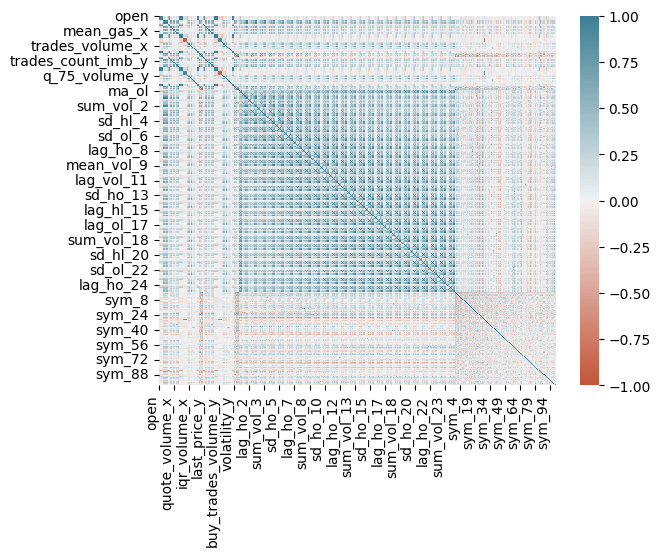

In [51]:
correlation = X_.corr() 
print(correlation)

heat = sns.heatmap( correlation, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=False ) 
heat.set_xticklabels( heat.get_xticklabels(), rotation=90, horizontalalignment='right' ) 
plt.show()


            open      high       low     close  volume  quote_asset_volume  \
open    1.000000  0.652819 -0.029674 -0.673591     NaN                 NaN   
high    0.652819  1.000000 -0.566766 -0.439169     NaN                 NaN   
low    -0.029674 -0.566766  1.000000  0.243323     NaN                 NaN   
close  -0.673591 -0.439169  0.243323  1.000000     NaN                 NaN   
volume       NaN       NaN       NaN       NaN     1.0            0.843575   
...          ...       ...       ...       ...     ...                 ...   
sym_95       NaN       NaN       NaN       NaN     NaN                 NaN   
sym_96       NaN       NaN       NaN       NaN     NaN                 NaN   
sym_97       NaN       NaN       NaN       NaN     NaN                 NaN   
sym_98       NaN       NaN       NaN       NaN     NaN                 NaN   
sym_99       NaN       NaN       NaN       NaN     NaN                 NaN   

          trades  buy_asset_volume  taker_buy_asset_volume  ave

<AxesSubplot:>

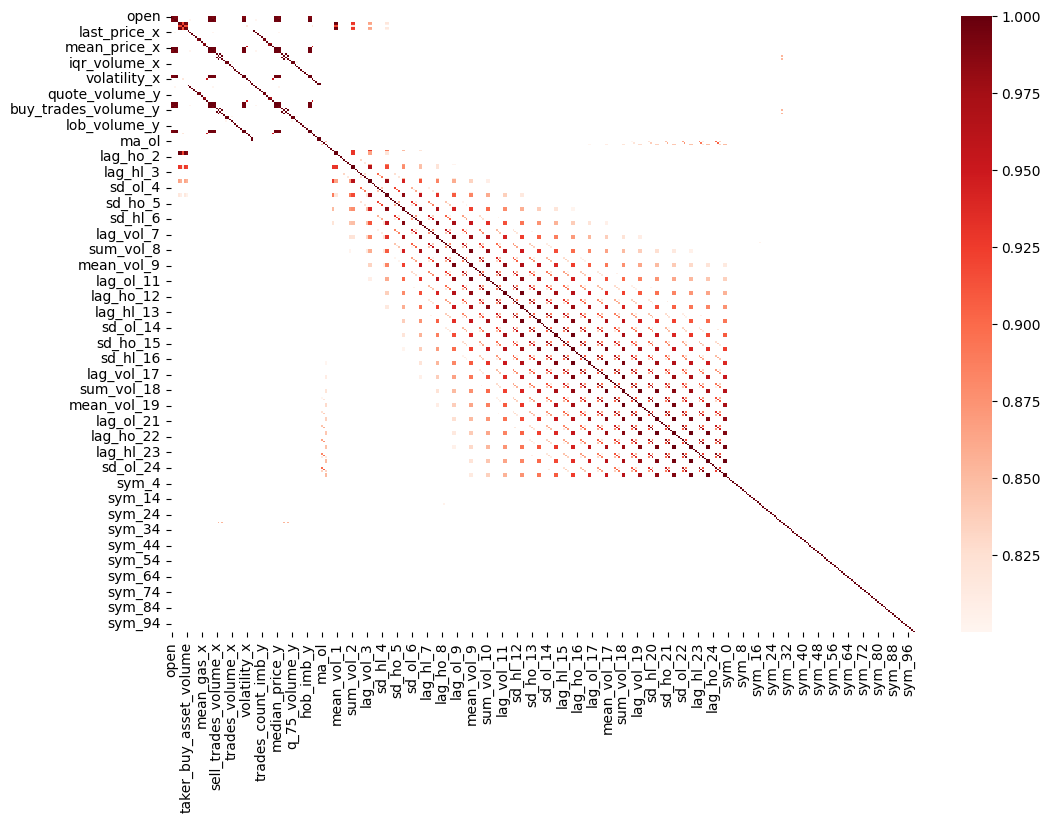

In [52]:
corr = correlation[correlation >= .80]
corr2 = corr.corr(method='spearman')
print(corr2)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="Reds")

            open      high       low     close  volume  quote_asset_volume  \
open    1.000000  0.536971 -0.301173 -0.892153     NaN                 NaN   
high    0.536971  1.000000 -0.809388 -0.317845     NaN                 NaN   
low    -0.301173 -0.809388  1.000000  0.298613     NaN                 NaN   
close  -0.892153 -0.317845  0.298613  1.000000     NaN                 NaN   
volume       NaN       NaN       NaN       NaN     1.0            0.997408   
...          ...       ...       ...       ...     ...                 ...   
sym_95       NaN       NaN       NaN       NaN     NaN                 NaN   
sym_96       NaN       NaN       NaN       NaN     NaN                 NaN   
sym_97       NaN       NaN       NaN       NaN     NaN                 NaN   
sym_98       NaN       NaN       NaN       NaN     NaN                 NaN   
sym_99       NaN       NaN       NaN       NaN     NaN                 NaN   

          trades  buy_asset_volume  taker_buy_asset_volume  ave

<AxesSubplot:>

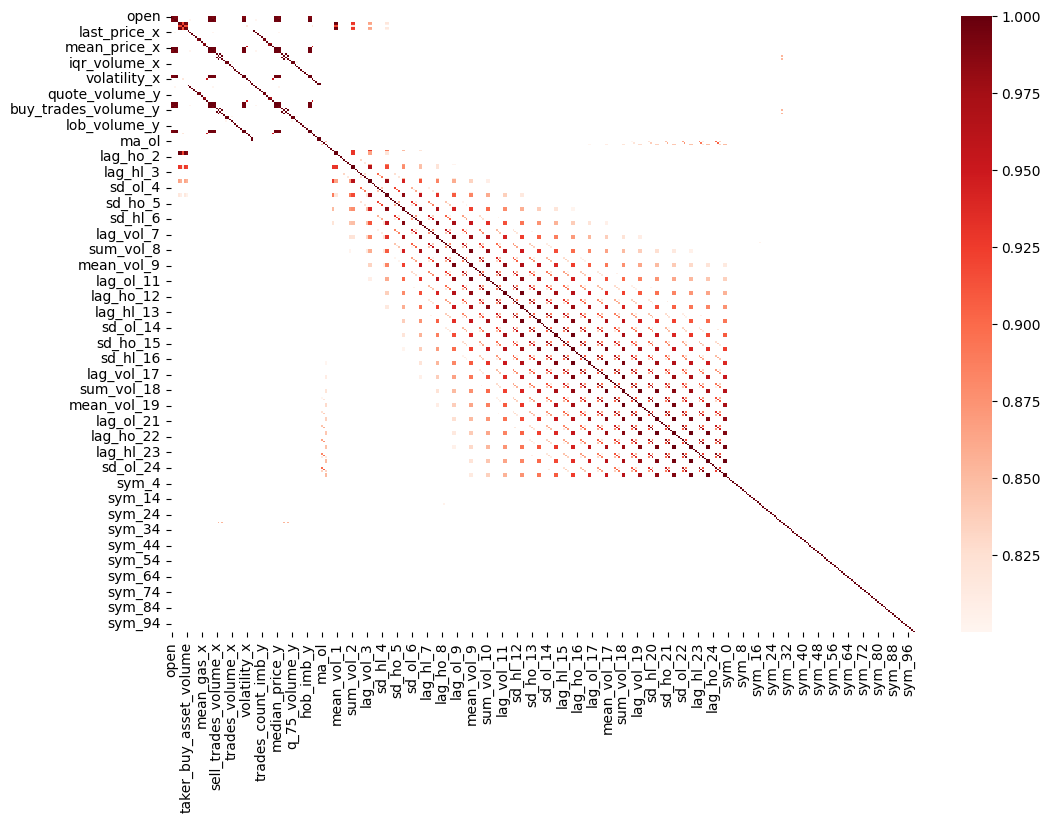

In [53]:
corr = correlation[correlation >= .80]
corr2 = corr.corr(method='pearson')
print(corr2)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="Reds")

In [54]:
cor_matrix = X_.corr().abs()
print(cor_matrix)
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
print(upper_tri)

            open      high       low     close    volume  quote_asset_volume  \
open    1.000000  0.995209  0.992151  0.989487  0.023087            0.128197   
high    0.995209  1.000000  0.989940  0.993905  0.064944            0.170282   
low     0.992151  0.989940  1.000000  0.995356  0.044175            0.061409   
close   0.989487  0.993905  0.995356  1.000000  0.007850            0.112671   
volume  0.023087  0.064944  0.044175  0.007850  1.000000            0.993531   
...          ...       ...       ...       ...       ...                 ...   
sym_95  0.013695  0.004153  0.047805  0.039889  0.263792            0.258278   
sym_96  0.049406  0.052694  0.100748  0.093452  0.366642            0.357009   
sym_97  0.037676  0.038436  0.004125  0.015838  0.312493            0.313235   
sym_98  0.024949  0.002657  0.032251  0.012838  0.299919            0.297140   
sym_99  0.001995  0.023377  0.010613  0.023726  0.115173            0.117145   

          trades  buy_asset_volume  tak

C:\Users\Emilio\AppData\Local\Temp\ipykernel_23884\1657783810.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [55]:
# .5 according to JF, but not many features after that.
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= .85)]
print();
print(to_drop)


['high', 'low', 'close', 'quote_asset_volume', 'trades', 'buy_asset_volume', 'taker_buy_asset_volume', 'quote_volume_x', 'mean_gas_value_x', 'mean_price_x', 'median_price_x', 'lowest_price_x', 'highest_price_x', 'buy_trades_volume_x', 'sell_trades_count_y_x', 'buy_trades_count_y_x', 'iqr_volume_x', 'lob_vwap_x', 'hob_vwap_x', 'volatility_x', 'average_price_y', 'last_price_y', 'buy_trades_count_x_y', 'sell_trades_count_x_y', 'trades_count_imb_y', 'base_volume_y', 'quote_volume_y', 'mean_gas_y', 'mean_gas_price_y', 'mean_gas_value_y', 'std_prices_y', 'mean_price_y', 'median_price_y', 'lowest_price_y', 'highest_price_y', 'sell_trades_volume_y', 'buy_trades_volume_y', 'sell_trades_count_y_y', 'buy_trades_count_y_y', 'q_25_volume_y', 'q_75_volume_y', 'iqr_volume_y', 'trades_count_y', 'trades_volume_y', 'tob_volume_y', 'hob_volume_y', 'lob_volume_y', 'lob_imb_y', 'hob_imb_y', 'lob_vwap_y', 'hob_vwap_y', 'volatility_y', 'high_open_y', 'open_low_y', 'close_open_y', 'co', 'sum_vol_1', 'mean_vo

In [56]:
x = X_.drop(X_[to_drop], axis=1)
print();
print(x.head())
x.head()


                         open       volume  average_price_x  last_price_x  \
timestamp                                                                   
2022-09-02 00:00:00  20132.64   6596.35671      1580.016966   1575.767318   
2022-09-02 01:00:00  20072.73   6023.42328      1577.896438   1579.292276   
2022-09-02 02:00:00  20049.83   6853.62093      1574.623307   1577.579849   
2022-09-02 03:00:00  20033.01  10870.15267      1596.905795   1597.571685   
2022-09-02 04:00:00  20157.01   7988.89076      1598.698746   1602.904451   

                     buy_trades_count_x_x  sell_trades_count_x_x  \
timestamp                                                          
2022-09-02 00:00:00                  99.0                     92   
2022-09-02 01:00:00                  85.0                     95   
2022-09-02 02:00:00                  93.0                    118   
2022-09-02 03:00:00                 112.0                    122   
2022-09-02 04:00:00                  74.0          

open       volume  average_price_x  last_price_x  \
timestamp                                                                   
2022-09-02 00:00:00  20132.64   6596.35671      1580.016966   1575.767318   
2022-09-02 01:00:00  20072.73   6023.42328      1577.896438   1579.292276   
2022-09-02 02:00:00  20049.83   6853.62093      1574.623307   1577.579849   
2022-09-02 03:00:00  20033.01  10870.15267      1596.905795   1597.571685   
2022-09-02 04:00:00  20157.01   7988.89076      1598.698746   1602.904451   

                     buy_trades_count_x_x  sell_trades_count_x_x  \
timestamp                                                          
2022-09-02 00:00:00                  99.0                     92   
2022-09-02 01:00:00                  85.0                     95   
2022-09-02 02:00:00                  93.0                    118   
2022-09-02 03:00:00                 112.0                    122   
2022-09-02 04:00:00                  74.0                     94   

                     trades_count_imb_x  base_volume_x   mean_gas_x  \
timestamp                                                             
2022-09-02 00:00:00            0.481675    1013.780886  207278.9110   
2022-09-02 01:00:00            0.527778    1193.417876  222136.7778   
2022-09-02 02:00:00            0.559242    1470.336434  215082.4502   
2022-09-02 03:00:00            0.521368    2999.508506  228843.6752   
2022-09-02 04:00:00            0.559524    1489.965259  196103.4762   

                     mean_gas_price_x  ...     sym_90    sym_91    sym_92  \
timestamp                              ...                                  
2022-09-02 00:00:00         16.430531  ...  61.395923  0.175268  4.748172   
2022-09-02 01:00:00         19.769718  ...  45.487615  0.151136  7.956402   
2022-09-02 02:00:00         15.910858  ...  45.912671  1.734890  6.908172   
2022-09-02 03:00:00         22.356587  ...   4.908008  0.077498  6.678007   
2022-09-02 04:00:00         15.000093  ...  20.310478  0.100187  7.154007   

                       sym_93    sym_94         sym_95    sym_96    sym_97  \
timestamp                                                                    
2022-09-02 00:00:00  0.570645  0.027137  682446.622910  0.594661  0.004048   
2022-09-02 01:00:00  1.393798  0.032054   54212.388676  0.489090  0.007741   
2022-09-02 02:00:00  2.102996  0.036290  417969.988715  0.590924  0.005634   
2022-09-02 03:00:00  0.803266  0.020153    2622.493816  0.518991  0.017080   
2022-09-02 04:00:00  2.255663  0.026682    9292.506515  0.490955  0.019221   

                         sym_98    sym_99  
timestamp                                  
2022-09-02 00:00:00    2.077083  0.875232  
2022-09-02 01:00:00    5.734572  1.043786  
2022-09-02 02:00:00   14.919459  0.605620  
2022-09-02 03:00:00  214.637541 -0.796451  
2022-09-02 04:00:00   13.797294 -0.326469  

[5 rows x 229 columns]

In [57]:
y= ohlc['y_hat']

In [58]:
best = SelectKBest(k=70)
x_new= best.fit_transform(x,y)
x_new.shape
selected = best.get_support(indices=True)
print(x.columns[selected])

Index(['volume', 'buy_trades_count_x_x', 'std_prices_x', 'high_open_x',
       'open_low_x', 'close_open_x', 'sd_ol_2', 'sd_ho_2', 'sd_ho_3', 'sym_0',
       'sym_1', 'sym_2', 'sym_3', 'sym_4', 'sym_5', 'sym_6', 'sym_7', 'sym_8',
       'sym_9', 'sym_10', 'sym_11', 'sym_12', 'sym_13', 'sym_14', 'sym_15',
       'sym_16', 'sym_17', 'sym_18', 'sym_19', 'sym_20', 'sym_21', 'sym_22',
       'sym_23', 'sym_24', 'sym_25', 'sym_26', 'sym_27', 'sym_28', 'sym_30',
       'sym_31', 'sym_32', 'sym_33', 'sym_34', 'sym_35', 'sym_36', 'sym_37',
       'sym_38', 'sym_39', 'sym_40', 'sym_41', 'sym_42', 'sym_43', 'sym_45',
       'sym_46', 'sym_51', 'sym_52', 'sym_54', 'sym_58', 'sym_59', 'sym_60',
       'sym_63', 'sym_64', 'sym_69', 'sym_75', 'sym_80', 'sym_81', 'sym_85',
       'sym_88', 'sym_91', 'sym_94'],
      dtype='object')


In [59]:
best.scores_

array([9.69380339e-01, 2.82169583e+01, 6.86897216e-01, 3.21360945e-01,
       2.30426519e+01, 1.50889535e+01, 9.82256554e+00, 1.45911085e+01,
       5.44310500e-02, 1.25625365e+01, 5.05814185e+01, 1.17444644e+00,
       4.55672381e-01, 6.77137840e+00, 4.39647343e-01, 5.40504911e+00,
       3.03182077e+00, 1.53865469e+00, 3.35927769e+00, 9.61395105e-01,
       1.40377466e-01, 1.86727302e+02, 1.13388056e+02, 3.30792004e+02,
       6.08148135e+00, 8.63744759e+00, 1.01046361e+01, 3.70056907e+00,
       3.12676827e+00, 7.19769898e+00, 9.85887321e+00, 2.64966065e-01,
       5.62581236e+00, 3.61451875e+00, 2.84707423e+01, 2.35962325e+01,
       1.67704760e+01, 7.73081079e+00, 2.47526631e+00, 2.49862760e+00,
       5.74104617e+00, 2.06965075e+01, 2.23067561e+01, 1.52692833e+01,
       5.98689560e+00, 6.83171026e-01, 6.09239991e+00, 1.50655173e+00,
       2.08379356e+01, 3.42118592e+00, 1.30208638e+00, 4.55312197e-01,
       1.81834643e+00, 3.19431431e+00, 1.28118259e+00, 7.38483876e-01,
      

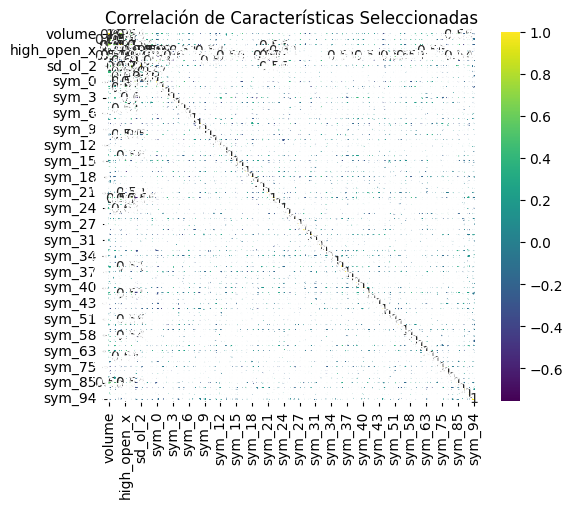

In [60]:
used_features = x.columns[selected]
plt.title('Correlación de Características Seleccionadas');
sb.heatmap(x[used_features].astype(float).corr(),
           linewidths=0.01,
           vmax=1.0, 
           square=True, 
           cmap='viridis', 
           linecolor='white', 
           annot=True);

In [61]:
x_neo = x[used_features]
x_neo

volume  buy_trades_count_x_x  std_prices_x  \
timestamp                                                              
2022-09-02 00:00:00   6596.35671                  99.0     16.321454   
2022-09-02 01:00:00   6023.42328                  85.0     15.312641   
2022-09-02 02:00:00   6853.62093                  93.0     29.748575   
2022-09-02 03:00:00  10870.15267                 112.0     30.721975   
2022-09-02 04:00:00   7988.89076                  74.0     33.511003   
...                          ...                   ...           ...   
2022-09-29 19:00:00  15817.49109                 127.0     30.071067   
2022-09-29 20:00:00   9727.75583                  98.0     39.709519   
2022-09-29 21:00:00   5310.54832                  94.0     21.496133   
2022-09-29 22:00:00  11951.94972                 126.0     28.357663   
2022-09-29 23:00:00  12876.44608                  89.0     48.640249   

                     high_open_x  open_low_x  close_open_x     sd_ol_2  \
timestamp                                                                
2022-09-02 00:00:00         4.49       85.03        -59.91   42.292057   
2022-09-02 01:00:00        24.60       64.08        -21.89   14.813887   
2022-09-02 02:00:00        32.25       92.05        -16.82   19.777777   
2022-09-02 03:00:00       212.88        3.18        124.00   62.840580   
2022-09-02 04:00:00       140.99       16.64          4.06    9.517657   
...                          ...         ...           ...         ...   
2022-09-29 19:00:00       186.71        4.57        104.12  100.006112   
2022-09-29 20:00:00       138.08       22.89        103.01   12.954196   
2022-09-29 21:00:00        12.91       89.22        -76.94   46.902393   
2022-09-29 22:00:00       108.14       13.54         24.65   53.513841   
2022-09-29 23:00:00       164.94       25.02        136.45    8.117586   

                        sd_ho_2     sd_ho_3     sym_0  ...    sym_63  \
timestamp                                              ...             
2022-09-02 00:00:00   47.376154   46.855016 -0.756390  ... -0.996868   
2022-09-02 01:00:00   14.219917   34.380431 -0.091542  ... -0.986094   
2022-09-02 02:00:00    5.409367   14.338481 -0.337777  ... -0.990790   
2022-09-02 03:00:00  127.724698  106.563813  0.970409  ... -0.854666   
2022-09-02 04:00:00   50.833906   90.939317  0.031384  ... -0.958151   
...                         ...         ...       ...  ...       ...   
2022-09-29 19:00:00   16.624080   49.068881  0.956525  ... -0.711420   
2022-09-29 20:00:00   34.386603   24.319441  0.983860  ... -0.811094   
2022-09-29 21:00:00   88.508556   89.664974 -0.549574  ... -0.987554   
2022-09-29 22:00:00   67.337779   65.361412  0.219648  ... -0.793707   
2022-09-29 23:00:00   40.163665   76.820260  1.394786  ... -0.729978   

                         sym_64    sym_69    sym_75    sym_80    sym_81  \
timestamp                                                                 
2022-09-02 00:00:00  -10.999363 -1.018568  0.000117  0.000331  3.902520   
2022-09-02 01:00:00   -8.884249 -0.140498  0.000214  0.000310  3.125210   
2022-09-02 02:00:00   -8.899354  0.378188  0.000176  0.000291  2.790890   
2022-09-02 03:00:00  122.229556 -0.345417  0.000138  0.000238  4.799796   
2022-09-02 04:00:00    6.931739 -0.194354  0.000120  0.000365  6.898736   
...                         ...       ...       ...       ...       ...   
2022-09-29 19:00:00  109.614264  0.098214  0.000148  0.000709 -0.466002   
2022-09-29 20:00:00   76.752589  0.080199  0.000284  0.002719  4.232058   
2022-09-29 21:00:00  -41.265674 -0.624769  0.000122  0.000390  3.712863   
2022-09-29 22:00:00   23.727141  0.721900  0.000086  0.000494 -1.327085   
2022-09-29 23:00:00  104.742560 -0.241015  0.000170  0.000351  3.802523   

                     sym_85      sym_88     sym_91    sym_94  
timestamp                                                     
2022-09-02 00:00:00     0.0  -93.671432   0.175268  0.027137  
2022-09-02 01:00:00     

In [62]:
x_neo_=pd.merge(x_neo,y,on='timestamp')

In [63]:
abs(x_neo_[x_neo_.columns].corr()['y_hat'][:].sort_values(ascending=False)).to_frame()

y_hat
y_hat         1.000000
sym_0         0.792379
close_open_x  0.765054
sym_1         0.613139
high_open_x   0.604462
...                ...
sym_7         0.437315
sym_6         0.474422
sym_3         0.487020
open_low_x    0.505219
sym_2         0.569153

[71 rows x 1 columns]

<AxesSubplot:>

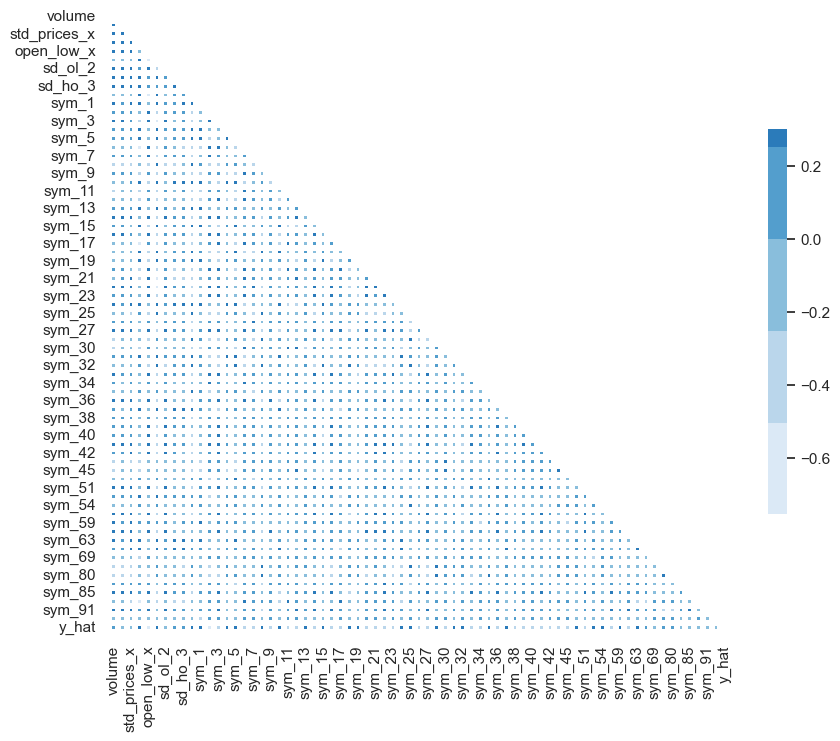

In [64]:
sns.set_theme(style="white")
corr = x_neo_.corr()
mask = np.triu(x_neo_.corr())
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.color_palette("Blues")

sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            vmax=.3, 
            center=0,
            square=True, 
            linewidths=3, 
            cbar_kws={"shrink": .5}
           )

In [65]:
x_neo

volume  buy_trades_count_x_x  std_prices_x  \
timestamp                                                              
2022-09-02 00:00:00   6596.35671                  99.0     16.321454   
2022-09-02 01:00:00   6023.42328                  85.0     15.312641   
2022-09-02 02:00:00   6853.62093                  93.0     29.748575   
2022-09-02 03:00:00  10870.15267                 112.0     30.721975   
2022-09-02 04:00:00   7988.89076                  74.0     33.511003   
...                          ...                   ...           ...   
2022-09-29 19:00:00  15817.49109                 127.0     30.071067   
2022-09-29 20:00:00   9727.75583                  98.0     39.709519   
2022-09-29 21:00:00   5310.54832                  94.0     21.496133   
2022-09-29 22:00:00  11951.94972                 126.0     28.357663   
2022-09-29 23:00:00  12876.44608                  89.0     48.640249   

                     high_open_x  open_low_x  close_open_x     sd_ol_2  \
timestamp                                                                
2022-09-02 00:00:00         4.49       85.03        -59.91   42.292057   
2022-09-02 01:00:00        24.60       64.08        -21.89   14.813887   
2022-09-02 02:00:00        32.25       92.05        -16.82   19.777777   
2022-09-02 03:00:00       212.88        3.18        124.00   62.840580   
2022-09-02 04:00:00       140.99       16.64          4.06    9.517657   
...                          ...         ...           ...         ...   
2022-09-29 19:00:00       186.71        4.57        104.12  100.006112   
2022-09-29 20:00:00       138.08       22.89        103.01   12.954196   
2022-09-29 21:00:00        12.91       89.22        -76.94   46.902393   
2022-09-29 22:00:00       108.14       13.54         24.65   53.513841   
2022-09-29 23:00:00       164.94       25.02        136.45    8.117586   

                        sd_ho_2     sd_ho_3     sym_0  ...    sym_63  \
timestamp                                              ...             
2022-09-02 00:00:00   47.376154   46.855016 -0.756390  ... -0.996868   
2022-09-02 01:00:00   14.219917   34.380431 -0.091542  ... -0.986094   
2022-09-02 02:00:00    5.409367   14.338481 -0.337777  ... -0.990790   
2022-09-02 03:00:00  127.724698  106.563813  0.970409  ... -0.854666   
2022-09-02 04:00:00   50.833906   90.939317  0.031384  ... -0.958151   
...                         ...         ...       ...  ...       ...   
2022-09-29 19:00:00   16.624080   49.068881  0.956525  ... -0.711420   
2022-09-29 20:00:00   34.386603   24.319441  0.983860  ... -0.811094   
2022-09-29 21:00:00   88.508556   89.664974 -0.549574  ... -0.987554   
2022-09-29 22:00:00   67.337779   65.361412  0.219648  ... -0.793707   
2022-09-29 23:00:00   40.163665   76.820260  1.394786  ... -0.729978   

                         sym_64    sym_69    sym_75    sym_80    sym_81  \
timestamp                                                                 
2022-09-02 00:00:00  -10.999363 -1.018568  0.000117  0.000331  3.902520   
2022-09-02 01:00:00   -8.884249 -0.140498  0.000214  0.000310  3.125210   
2022-09-02 02:00:00   -8.899354  0.378188  0.000176  0.000291  2.790890   
2022-09-02 03:00:00  122.229556 -0.345417  0.000138  0.000238  4.799796   
2022-09-02 04:00:00    6.931739 -0.194354  0.000120  0.000365  6.898736   
...                         ...       ...       ...       ...       ...   
2022-09-29 19:00:00  109.614264  0.098214  0.000148  0.000709 -0.466002   
2022-09-29 20:00:00   76.752589  0.080199  0.000284  0.002719  4.232058   
2022-09-29 21:00:00  -41.265674 -0.624769  0.000122  0.000390  3.712863   
2022-09-29 22:00:00   23.727141  0.721900  0.000086  0.000494 -1.327085   
2022-09-29 23:00:00  104.742560 -0.241015  0.000170  0.000351  3.802523   

                     sym_85      sym_88     sym_91    sym_94  
timestamp                                                     
2022-09-02 00:00:00     0.0  -93.671432   0.175268  0.027137  
2022-09-02 01:00:00     

In [66]:
#  Min Max Scaler
scale = MinMaxScaler().fit(x_neo)
X_scale = scale.transform(x_neo)
X_scale = pd.DataFrame(X_scale, index=x_neo.index, columns=x_neo.columns)
X_scale.head()

volume  buy_trades_count_x_x  std_prices_x  \
timestamp                                                           
2022-09-02 00:00:00  0.068216              0.160000      0.021101   
2022-09-02 01:00:00  0.058630              0.113333      0.019004   
2022-09-02 02:00:00  0.072520              0.140000      0.049003   
2022-09-02 03:00:00  0.139721              0.203333      0.051026   
2022-09-02 04:00:00  0.091514              0.076667      0.056822   

                     high_open_x  open_low_x  close_open_x   sd_ol_2  \
timestamp                                                              
2022-09-02 00:00:00     0.006090    0.070746      0.605820  0.050200   
2022-09-02 01:00:00     0.033428    0.053315      0.627457  0.017584   
2022-09-02 02:00:00     0.043828    0.076586      0.630342  0.023476   
2022-09-02 03:00:00     0.289379    0.002646      0.710484  0.074591   
2022-09-02 04:00:00     0.191650    0.013845      0.642225  0.011297   

                      sd_ho_2   sd_ho_3     sym_0  ...    sym_63    sym_64  \
timestamp                                          ...                       
2022-09-02 00:00:00  0.094769  0.110945  0.356114  ...  0.771278  0.526529   
2022-09-02 01:00:00  0.028445  0.079568  0.400421  ...  0.773822  0.527754   
2022-09-02 02:00:00  0.010821  0.029157  0.384012  ...  0.772713  0.527745   
2022-09-02 03:00:00  0.255495  0.261130  0.471193  ...  0.804864  0.603690   
2022-09-02 04:00:00  0.101686  0.221830  0.408614  ...  0.780422  0.536914   

                       sym_69    sym_75    sym_80    sym_81  sym_85    sym_88  \
timestamp                                                                       
2022-09-02 00:00:00  0.145731  0.034938  0.084504  0.697425     0.0  0.876986   
2022-09-02 01:00:00  0.259804  0.072595  0.078983  0.618928     0.0  0.922997   
2022-09-02 02:00:00  0.327188  0.058002  0.074127  0.585166     0.0  0.743704   
2022-09-02 03:00:00  0.233182  0.042841  0.060315  0.788037     0.0  0.866557   
2022-09-02 04:00:00  0.252807  0.036140  0.093096  1.000000     0.0  0.802337   

                       sym_91    sym_94  
timestamp                                
2022-09-02 00:00:00  0.534561  0.038417  
2022-09-02 01:00:00  0.534164  0.049794  
2022-09-02 02:00:00  0.560192  0.059597  
2022-09-02 03:00:00  0.532954  0.022256  
2022-09-02 04:00:00  0.533327  0.037364  

[5 rows x 70 columns]

In [67]:
# Normalizer
transformer = Normalizer(norm='max').fit(X_scale)
transformed = transformer.transform(X_scale)
X_normalized = pd.DataFrame(transformed, index=x_neo.index, columns=x_neo.columns)
X_normalized.head()

volume  buy_trades_count_x_x  std_prices_x  \
timestamp                                                           
2022-09-02 00:00:00  0.069646              0.163354      0.021543   
2022-09-02 01:00:00  0.058688              0.113445      0.019023   
2022-09-02 02:00:00  0.072589              0.140134      0.049050   
2022-09-02 03:00:00  0.139986              0.203719      0.051123   
2022-09-02 04:00:00  0.091514              0.076667      0.056822   

                     high_open_x  open_low_x  close_open_x   sd_ol_2  \
timestamp                                                              
2022-09-02 00:00:00     0.006218    0.072229      0.618521  0.051253   
2022-09-02 01:00:00     0.033461    0.053368      0.628077  0.017601   
2022-09-02 02:00:00     0.043870    0.076660      0.630946  0.023498   
2022-09-02 03:00:00     0.289927    0.002651      0.711830  0.074732   
2022-09-02 04:00:00     0.191650    0.013845      0.642225  0.011297   

                      sd_ho_2   sd_ho_3     sym_0  ...    sym_63    sym_64  \
timestamp                                          ...                       
2022-09-02 00:00:00  0.096756  0.113271  0.363580  ...  0.787448  0.537567   
2022-09-02 01:00:00  0.028473  0.079647  0.400817  ...  0.774586  0.528275   
2022-09-02 02:00:00  0.010831  0.029185  0.384379  ...  0.773453  0.528250   
2022-09-02 03:00:00  0.255979  0.261625  0.472085  ...  0.806389  0.604833   
2022-09-02 04:00:00  0.101686  0.221830  0.408614  ...  0.780422  0.536914   

                       sym_69    sym_75    sym_80    sym_81  sym_85    sym_88  \
timestamp                                                                       
2022-09-02 00:00:00  0.148786  0.035670  0.086276  0.712047     0.0  0.895372   
2022-09-02 01:00:00  0.260060  0.072667  0.079061  0.619539     0.0  0.923908   
2022-09-02 02:00:00  0.327501  0.058057  0.074198  0.585726     0.0  0.744416   
2022-09-02 03:00:00  0.233624  0.042922  0.060429  0.789530     0.0  0.868199   
2022-09-02 04:00:00  0.252807  0.036140  0.093096  1.000000     0.0  0.802337   

                       sym_91    sym_94  
timestamp                                
2022-09-02 00:00:00  0.545768  0.039222  
2022-09-02 01:00:00  0.534692  0.049843  
2022-09-02 02:00:00  0.560728  0.059654  
2022-09-02 03:00:00  0.533964  0.022298  
2022-09-02 04:00:00  0.533327  0.037364  

[5 rows x 70 columns]

In [68]:
x = X_normalized.copy()
x.head()

volume  buy_trades_count_x_x  std_prices_x  \
timestamp                                                           
2022-09-02 00:00:00  0.069646              0.163354      0.021543   
2022-09-02 01:00:00  0.058688              0.113445      0.019023   
2022-09-02 02:00:00  0.072589              0.140134      0.049050   
2022-09-02 03:00:00  0.139986              0.203719      0.051123   
2022-09-02 04:00:00  0.091514              0.076667      0.056822   

                     high_open_x  open_low_x  close_open_x   sd_ol_2  \
timestamp                                                              
2022-09-02 00:00:00     0.006218    0.072229      0.618521  0.051253   
2022-09-02 01:00:00     0.033461    0.053368      0.628077  0.017601   
2022-09-02 02:00:00     0.043870    0.076660      0.630946  0.023498   
2022-09-02 03:00:00     0.289927    0.002651      0.711830  0.074732   
2022-09-02 04:00:00     0.191650    0.013845      0.642225  0.011297   

                      sd_ho_2   sd_ho_3     sym_0  ...    sym_63    sym_64  \
timestamp                                          ...                       
2022-09-02 00:00:00  0.096756  0.113271  0.363580  ...  0.787448  0.537567   
2022-09-02 01:00:00  0.028473  0.079647  0.400817  ...  0.774586  0.528275   
2022-09-02 02:00:00  0.010831  0.029185  0.384379  ...  0.773453  0.528250   
2022-09-02 03:00:00  0.255979  0.261625  0.472085  ...  0.806389  0.604833   
2022-09-02 04:00:00  0.101686  0.221830  0.408614  ...  0.780422  0.536914   

                       sym_69    sym_75    sym_80    sym_81  sym_85    sym_88  \
timestamp                                                                       
2022-09-02 00:00:00  0.148786  0.035670  0.086276  0.712047     0.0  0.895372   
2022-09-02 01:00:00  0.260060  0.072667  0.079061  0.619539     0.0  0.923908   
2022-09-02 02:00:00  0.327501  0.058057  0.074198  0.585726     0.0  0.744416   
2022-09-02 03:00:00  0.233624  0.042922  0.060429  0.789530     0.0  0.868199   
2022-09-02 04:00:00  0.252807  0.036140  0.093096  1.000000     0.0  0.802337   

                       sym_91    sym_94  
timestamp                                
2022-09-02 00:00:00  0.545768  0.039222  
2022-09-02 01:00:00  0.534692  0.049843  
2022-09-02 02:00:00  0.560728  0.059654  
2022-09-02 03:00:00  0.533964  0.022298  
2022-09-02 04:00:00  0.533327  0.037364  

[5 rows x 70 columns]

In [69]:
X= x.copy()

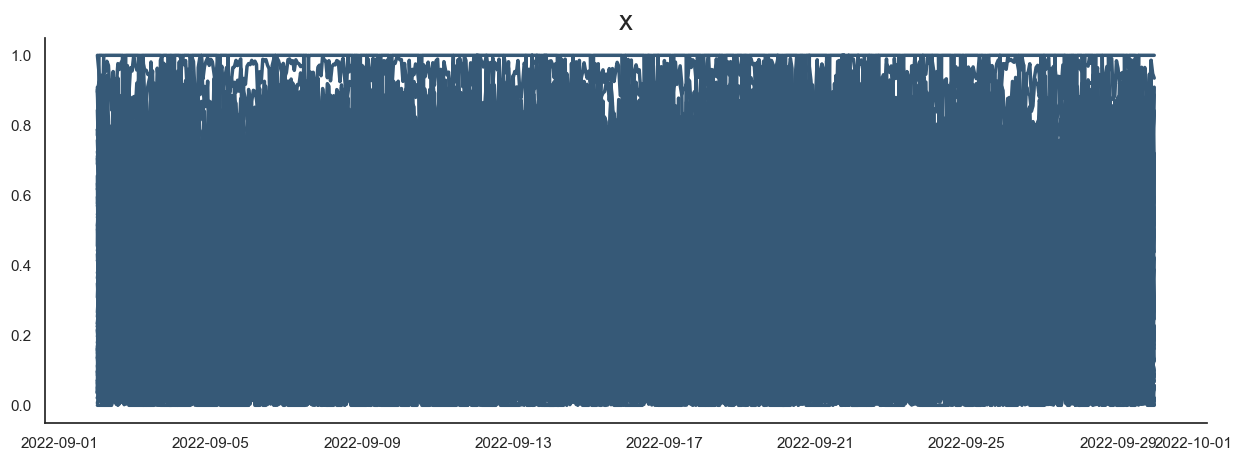

In [70]:
rcParams['figure.figsize'] = 15, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5
plt.title('x', size=20)
plt.plot(X);

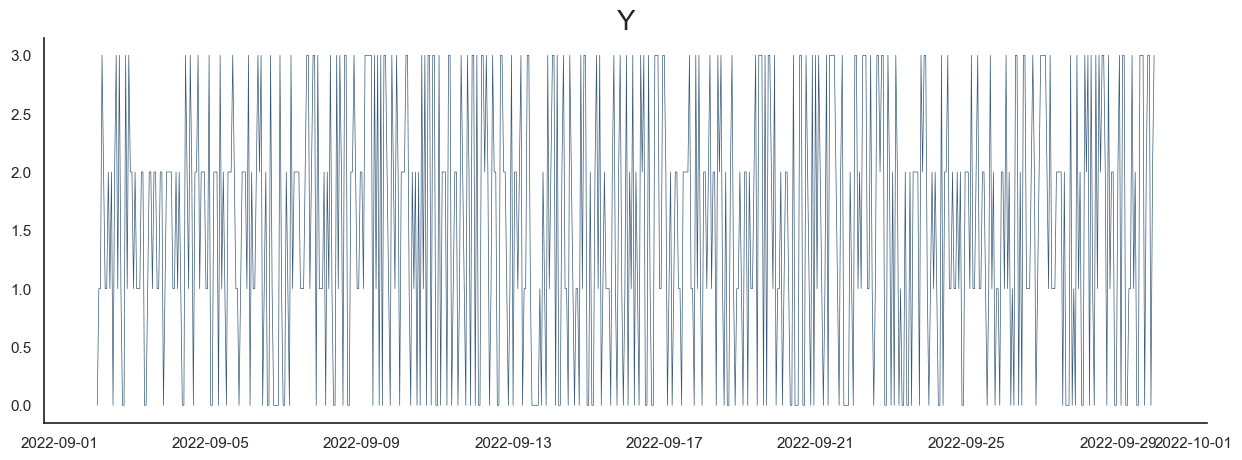

In [71]:
rcParams['figure.figsize'] = 15, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = .5
plt.title('Y', size=20)
plt.plot(y);

In [72]:
test_size = int(len(X) * .30)
validation_size = int(len(X) * .10)
X_train = X[:-test_size].copy()
X_test = X[-test_size:].copy()
X_test = X_test[:-validation_size].copy()
X_validation = X_test[-validation_size:].copy()

X_train2 = X_train.copy()
X_test2 = X_test.copy()
X_validation2 = X_validation.copy()

X_train3 = X_train.copy()
X_test3 = X_test.copy()
X_validation3 = X_validation.copy()

X_train4 = X_train.copy()
X_test4 = X_test.copy()
X_validation4 = X_validation.copy()

X_train5 = X_train.copy()
X_test5 = X_test.copy()
X_validation5 = X_validation.copy()




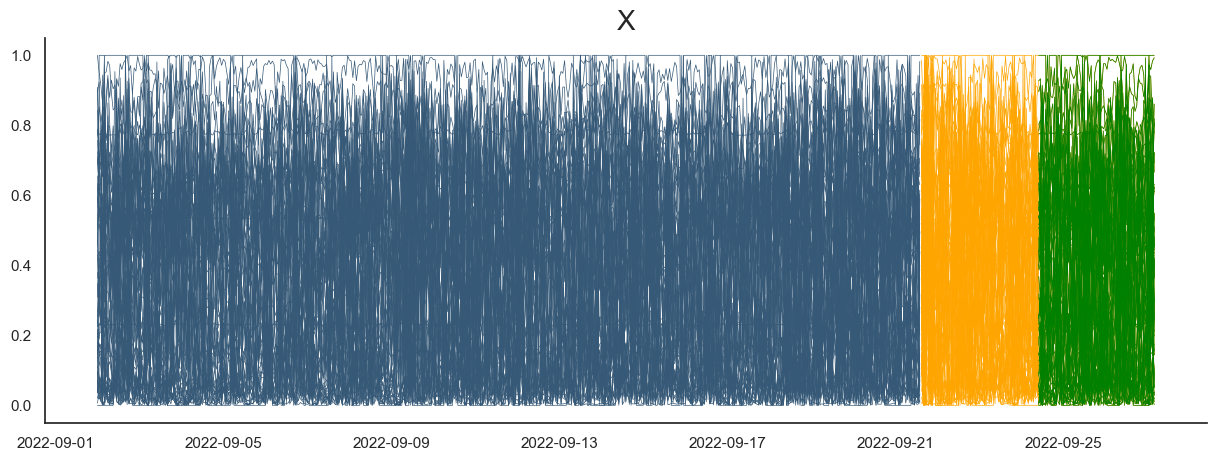

In [73]:
plt.title('X', size=20)
plt.plot(X_train)  # ,label='Training set')
plt.plot(X_test, label='Test set', color='orange')
plt.plot(X_validation,label= 'Trial set',color='green')
plt.legend;

In [74]:
y_train = y[:-test_size].copy()
y_test = y[-test_size:].copy()
y_test = y_test[:-validation_size].copy()
y_validation = y_test[-validation_size:].copy()


y_train2 = y_train.copy()
y_test2 = y_test.copy()
y_validation2 = y_validation.copy()

y_train3 = y_train.copy()
y_test3 = y_test.copy()
y_validation3 = y_validation.copy()

y_train4 = y_train.copy()
y_test4 = y_test.copy()
y_validation4 = y_validation.copy()

y_train5 = y_train.copy()
y_test5 = y_test.copy()
y_validation5 = y_validation.copy()

Y_train_dum = pd.get_dummies(y_train5, prefix='y')
Y_test_dum = pd.get_dummies(y_test5, prefix='y')
Y_validation_dum = pd.get_dummies(y_validation5,prefix='y')

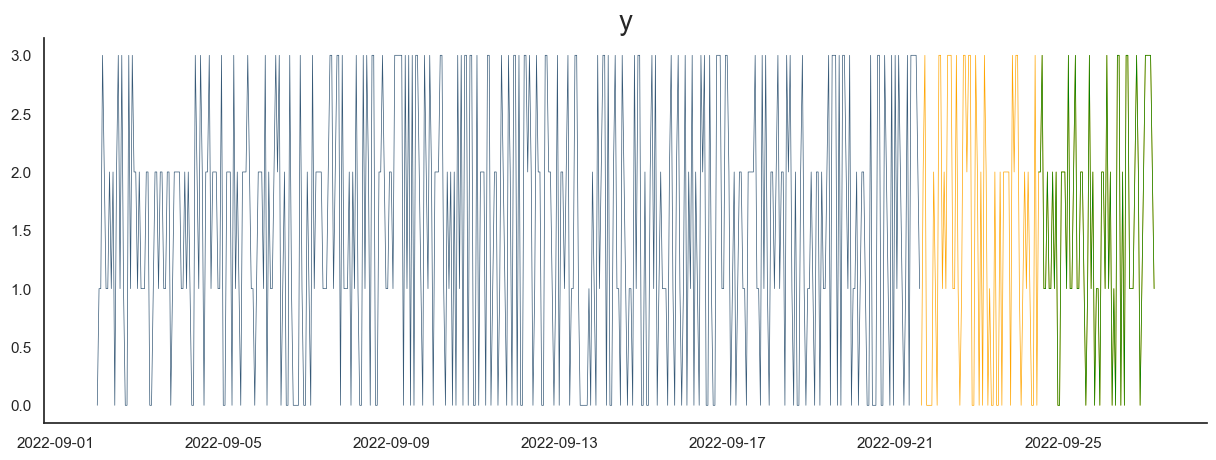

In [75]:
plt.title('y', size=20)
plt.plot(y_train)  # ,label='Training set')
plt.plot(y_test, label='Test set', color='orange')
plt.plot(y_validation,label= 'Trial set',color='green')
plt.legend;

In [76]:
#naive bayes
# %% Naive Bayes
print(X_train.shape, X_test.shape)
# instantiate the model
gnb = GaussianNB()
# gnb = CategoricalNB()
# pgmpy()

# fit the model
gnb.fit(X_train2, y_train2)

(471, 70) (134, 70)


GaussianNB()

In [77]:
y_pred2 = gnb.predict(X_test2)

In [78]:
accuracy_naive = (accuracy_score(y_test2, y_pred2)) * 100
recall_naive = recall_score(y_test2, y_pred2, average='weighted') * 100
precision_naive = precision_score(y_test2, y_pred2, average='weighted', zero_division=0) * 100
f1_naive = f1_score(y_test2, y_pred2, average='weighted') * 100
balanced_naive = balanced_accuracy_score(y_test2, y_pred2) * 100
print('Accuracy:', accuracy_naive, '%')
print('Recall:', recall_naive, '%')
print('Precision:', precision_naive, '%')
print('F1:', f1_naive, '%')
print('Balanced Accuracy:', balanced_naive, '%')

Accuracy: 79.8507462686567 %
Recall: 79.8507462686567 %
Precision: 80.31883592788745 %
F1: 79.8507462686567 %
Balanced Accuracy: 80.06080389144905 %


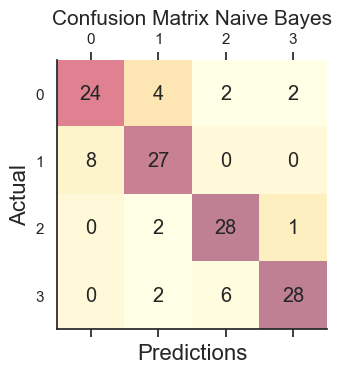

In [79]:
y_pred_train = gnb.predict(X_train2)
conf_mat = confusion_matrix(y_test2, y_pred2)
fig, px = plt.subplots(figsize=(3.5, 3.5))
px.matshow(conf_mat, cmap=plt.cm.YlOrRd, alpha=0.5)
for m in range(conf_mat.shape[0]):
    for n in range(conf_mat.shape[1]):
        px.text(x=m, y=n, s=conf_mat[m, n], va='center', ha='center', size='large')
# Sets the labels
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.title('Confusion Matrix Naive Bayes', fontsize=15)
plt.show()

In [80]:
y_pred2_validation = gnb.predict(X_validation2)

In [81]:
accuracy_naive2 = (accuracy_score(y_validation2, y_pred2_validation)) * 100
recall_naive2 = recall_score(y_validation2, y_pred2_validation, average='weighted') * 100
precision_naive2 = precision_score(y_validation2, y_pred2_validation, average='weighted', zero_division=0) * 100
f1_naive2 = f1_score(y_validation2, y_pred2_validation, average='weighted') * 100
balanced_naive2 = balanced_accuracy_score(y_validation2, y_pred2_validation) * 100
print('Accuracy:', accuracy_naive2, '%')
print('Recall:', recall_naive2, '%')
print('Precision:', precision_naive2, '%')
print('F1:', f1_naive2, '%')
print('Balanced Accuracy:', balanced_naive2, '%')

Accuracy: 82.08955223880598 %
Recall: 82.08955223880598 %
Precision: 82.21006212954367 %
F1: 82.0385253221074 %
Balanced Accuracy: 81.3664596273292 %


In [82]:
# Logistic regression simple
logistic_model_simple = LogisticRegression(max_iter=1000000)
logistic_model_simple.fit(X_train,y_train)

LogisticRegression(max_iter=1000000)

In [83]:
# logistic_model.predict_proba((X[:2, :])
y_pred = logistic_model_simple.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
logistic_model_simple.score(x, y)
confusion_mat = confusion_matrix(y_test, y_pred)
print(accuracy)


84.32835820895522


In [84]:
logistic_model_simple.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [85]:
coef = logistic_model_simple.coef_
print(logistic_model_simple.intercept_)
print(coef)

[ 1.227934    1.29119472 -1.62064824 -0.89848048]
[[ 4.26412845e-02  5.24352735e-01  3.54779673e-01 -6.60826048e-01
   8.91460195e-01 -1.20760749e+00  2.18771760e-01  1.13907274e-01
   5.68130998e-01 -1.52502778e+00 -2.36806175e+00  1.21223122e+00
   8.13506556e-01 -8.22014836e-01 -5.36476290e-01  3.43863723e-01
   1.03862601e+00 -1.93113377e+00  5.68120476e-01 -4.55501669e-01
   2.72107099e-01  7.10465619e-01 -1.04620288e+00  5.21784859e-01
  -4.35691269e-01  1.44228719e+00  1.96479216e-01 -1.26126502e-01
   1.15356061e-02  1.60998516e-01  5.39194975e-01  3.18002986e-01
   4.34956950e-01 -6.08679142e-01 -2.18869797e+00  8.57906815e-01
   7.75891085e-01 -3.57425524e-01  6.56981450e-01 -8.28694104e-02
  -5.47715264e-01  9.00870471e-01  5.89873124e-02 -1.96690002e-01
   5.68608638e-01 -2.47556749e-01  1.87142877e-01  6.91201198e-01
   1.74090227e-01  6.98854114e-01  5.12149040e-02  6.16909270e-01
   2.72445807e-02 -1.55090406e-01  4.90314445e-01 -2.77751426e-01
  -1.46285283e+00 -1.61495

In [86]:
predict_ = logistic_model_simple.predict_proba(X_train)
print(predict_)

[[0.34581124 0.62037342 0.03215395 0.00166138]
 [0.11263951 0.58412751 0.28075655 0.02247642]
 [0.07219112 0.52917425 0.32858711 0.07004751]
 ...
 [0.03831201 0.10699414 0.38456805 0.47012579]
 [0.01592225 0.18416074 0.65672952 0.1431875 ]
 [0.19880536 0.35931838 0.21556271 0.22631356]]


(1.0, 30000.0, -3.0, 3.0)

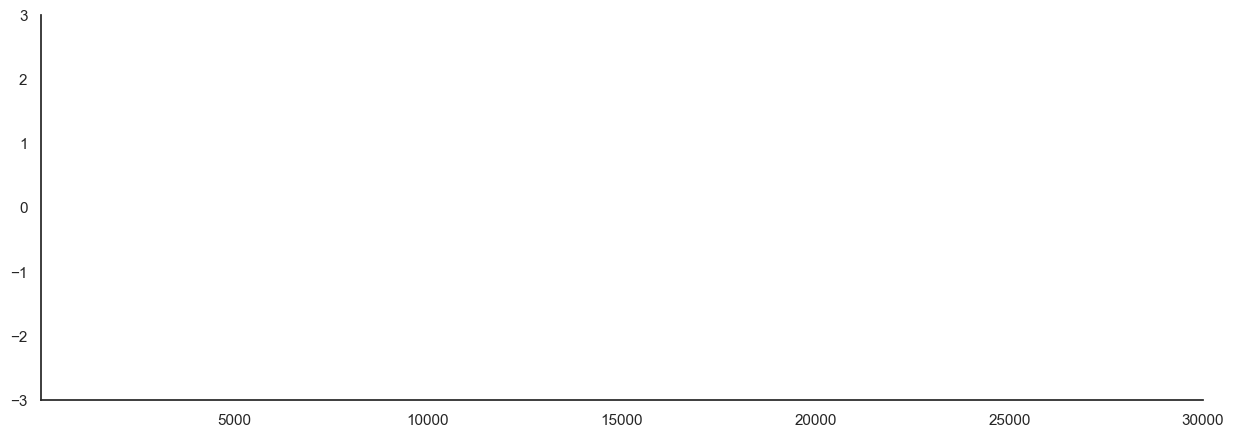

In [87]:
plt.plot(X_test, y_pred, 'r')
plt.plot(X, y_true, 'b')
plt.axis([1, 30000, -3, 3])


In [88]:
y_pred_simple = logistic_model_simple.predict(X_test)
accuracy_logistic_simple = accuracy_score(y_test, y_pred) * 100
logistic_model_simple.score(x, y)
confusion_mat = confusion_matrix(y_test, y_pred)
recall_logistic_simple = recall_score(y_test, y_pred, average='weighted') * 100
precision_logistic_simple = precision_score(y_test, y_pred, average='weighted', zero_division=0) * 100
f1_logistic_simple = f1_score(y_test, y_pred, average='weighted') * 100
balanced_logistic_simple = balanced_accuracy_score(y_test, y_pred) * 100

print('Accuracy:', accuracy_logistic_simple, '%')
print('Recall:', recall_logistic_simple, '%')
print('Precision:', precision_logistic_simple, '%')
print('F1:', f1_logistic_simple, '%')
print('Balanced Accuracy:', balanced_logistic_simple, '%')
print("Confusion Matrix:")

print(confusion_mat)


Accuracy: 84.32835820895522 %
Recall: 84.32835820895522 %
Precision: 85.02367607592318 %
F1: 84.33663796954336 %
Balanced Accuracy: 84.56725230414747 %
Confusion Matrix:
[[27  5  0  0]
 [ 2 31  1  1]
 [ 0  1 27  8]
 [ 0  0  3 28]]


In [89]:
y_pred_simple2 = logistic_model_simple.predict(X_validation)
accuracy = accuracy_score(y_validation, y_pred_simple2) * 100
logistic_model_simple.score(x, y)
confusion_mat = confusion_matrix(y_validation, y_pred_simple2)
print(accuracy)

86.56716417910447


In [90]:
pipelineLR = make_pipeline(
LogisticRegression(random_state=False, penalty='elasticnet',solver ='saga', max_iter=1000000, C=1
 ))
param_grid_lr = [{
    'logisticregression__l1_ratio':[.10,.20,.30,.40,.50,.60,.70,.80,.90],
    'logisticregression__class_weight':[None],
    'logisticregression__C':[0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
    'logisticregression__solver':['saga']
}]
gd_lm = RandomizedSearchCV(estimator=pipelineLR,
                     param_distributions=param_grid_lr,
                     scoring='accuracy',
                     cv=2,
                     n_jobs=1,
                     n_iter=17)
gd_lm.fit(X_train3, y_train3)
print(gd_lm.best_score_)

0.7685719437432383


In [91]:
gd_lm.best_params_

{'logisticregression__solver': 'saga',
 'logisticregression__l1_ratio': 0.9,
 'logisticregression__class_weight': None,
 'logisticregression__C': 10.0}

In [92]:
clfLR = gd_lm.best_estimator_
clfLR

Pipeline(steps=[('logisticregression',
                 LogisticRegression(C=10.0, l1_ratio=0.9, max_iter=1000000,
                                    penalty='elasticnet', random_state=False,
                                    solver='saga'))])

In [93]:
clfLR.score(X_test3, y_test3)

0.8283582089552238

In [94]:
logistic_model = LogisticRegression(random_state=False, penalty='elasticnet',
                                            solver='saga', l1_ratio=0.4, max_iter=1000000, C=10,
                                            class_weight= None, )
logistic_model.fit(X_train3, y_train3)

LogisticRegression(C=10, l1_ratio=0.4, max_iter=1000000, penalty='elasticnet',
                   random_state=False, solver='saga')

In [95]:
y_pred3 = logistic_model.predict(X_test3)
accuracy = accuracy_score(y_test3, y_pred3) * 100
logistic_model.score(x, y)
confusion_mat = confusion_matrix(y_test3, y_pred3)

y_pred_validation = logistic_model.predict(X_validation3)
accuracy_validation = accuracy_score(y_validation3, y_pred_validation) * 100
logistic_model.score(x, y)
print(accuracy)
print(accuracy_validation)

82.83582089552239
86.56716417910447


In [96]:
accuracy_logistic= accuracy_score(y_test3, y_pred3) * 100
recall_logistic = recall_score(y_test3, y_pred3, average='weighted') * 100
precision_logistic = precision_score(y_test3, y_pred3, average='weighted', zero_division=0) * 100
f1_logistic = f1_score(y_test3, y_pred3, average='weighted') * 100
balanced_logistic = balanced_accuracy_score(y_test3, y_pred3) * 100

print('Accuracy:', accuracy_logistic, '%')
print('Recall:', recall_logistic, '%')
print('Precision:', precision_logistic, '%')
print('F1:', f1_logistic, '%')
print('Balanced Accuracy:', balanced_logistic, '%')
print("Confusion Matrix:")

print(confusion_mat)


Accuracy: 82.83582089552239 %
Recall: 82.83582089552239 %
Precision: 83.2846755234815 %
F1: 82.73426400532806 %
Balanced Accuracy: 83.15316180235534 %
Confusion Matrix:
[[28  4  0  0]
 [ 2 31  2  0]
 [ 0  3 25  8]
 [ 0  1  3 27]]


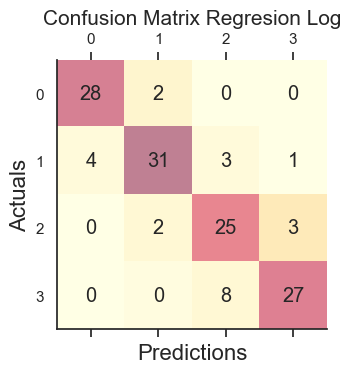

In [97]:
fig, px = plt.subplots(figsize=(3.5, 3.5))
px.matshow(confusion_mat, cmap=plt.cm.YlOrRd, alpha=0.5)
for m in range(confusion_mat.shape[0]):
    for n in range(confusion_mat.shape[1]):
        px.text(x=m, y=n, s=confusion_mat[m, n], va='center', ha='center', size='large')

# Sets the labels
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix Regresion Log', fontsize=15)
plt.show()

In [98]:
seed = 4

In [99]:
pipelineRFC = make_pipeline(
RandomForestClassifier(max_depth=None,
                       min_samples_split=2,
                       max_features='auto',
                       n_estimators=1000,
                       bootstrap=True,
                       oob_score=False,
                       verbose=1))

param_grid_rfc = [{
    'randomforestclassifier__max_features':['sqrt', 'log2', None],
    'randomforestclassifier__criterion':['gini','entropy','log_loss'],
    #'ranfomforestclassifier__n_estimators':[100, 500,1000]    
}]

gsrfc = RandomizedSearchCV(estimator= pipelineRFC,
                       param_distributions=param_grid_rfc,
                       scoring='accuracy',
                       cv=10,
                       n_jobs=1)
gs_rfc =gsrfc.fit(X_train4,y_train4)
print(gs_rfc.best_score_)

C:\Users\Emilio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning:

The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    8.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    8.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    8.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    8.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    9.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    9.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

0.9809840425531915


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.7s finished


In [100]:
print(gs_rfc.best_params_)


{'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__criterion': 'gini'}


In [101]:
clfRFC = gs_rfc.best_estimator_
clfRFC

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(n_estimators=1000, verbose=1))])

In [102]:
clfRFC.score(X_test4, y_test4)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


0.9776119402985075

In [103]:
# performing predictions on the test dataset
y_pred4 = clfRFC.predict(X_test4)
accuracy_forest = accuracy_score(y_test4, y_pred4) * 100
print(clfRFC.score(X_test4, y_test4))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.9776119402985075


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


In [104]:
# performing predictions on the validation dataset
y_pred4_validation = clfRFC.predict(X_validation4)
accuracy_forest_validation = accuracy_score(y_validation4, y_pred4_validation) * 100
print(clfRFC.score(X_validation4, y_validation4))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.9701492537313433


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


In [105]:
confusion_mat = confusion_matrix(y_test4, y_pred4)
recall_forest = recall_score(y_test4, y_pred4, average='weighted') * 100
precision_forest = precision_score(y_test4, y_pred4, average='weighted', zero_division=0) * 100
f1_forest = f1_score(y_test4, y_pred4, average='weighted') * 100
balanced_forest = balanced_accuracy_score(y_test4, y_pred4) * 100

print('Accuracy:', accuracy_forest, '%')
print('Recall:', recall_forest, '%')
print('Precision:', precision_forest, '%')
print('F1:', f1_forest, '%')
print('Balanced Accuracy:', balanced_forest, '%')
print("Confusion Matrix:")

print(confusion_mat)

Accuracy: 97.76119402985076 %
Recall: 97.76119402985076 %
Precision: 97.87231123792802 %
F1: 97.76252650747203 %
Balanced Accuracy: 97.87698412698413 %
Confusion Matrix:
[[32  0  0  0]
 [ 2 33  0  0]
 [ 0  0 35  1]
 [ 0  0  0 31]]


In [106]:
#%% Attributes of the model bag
clfRFC.base_estimator_ # Base estimator: Base configuration of each model
clfRFC.estimators_ # list of individual models created in each iteration
clfRFC.estimator_params # extraction of the configurable parameters of each estimator
score = clf.score(x,y) # Model fit metric
#modelo.oob_score_ # Out-of-the-bag data score

AttributeError: 'Pipeline' object has no attribute 'base_estimator_'

In [ ]:
#%% Visualizar el arbol de decision

tree.plot_tree(clfRFC.estimators_[0]) 

In [107]:
# Decision tree
Yprob_train_rf = clfRFC.predict_proba(X_train4)[:,1]
Yprob_test_rf = clfRFC.predict_proba(X_test4)[:,1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


In [108]:
n_inputs = len(list(X_train5.columns))
neuron_quant = [n_inputs, n_inputs+2,n_inputs+4,n_inputs+8,n_inputs+16,n_inputs+32,n_inputs+64]
quant_hidden = [1,2]
learning_rate = [0.01,0.1,0.5,1]
batch_size = [1,8,16]
dropout = [.01,.03,.05,.07,.09,.11,.13,.15,.17,.19]


In [109]:
recc = []
fitness=0
model_best =[]
for i in neuron_quant:
    for j in quant_hidden:
        for k in dropout:
                
               

                # Agregar: learning rate, momentum, nesterov, dropout, modificar capas, neuronas por capa, funcion activacion
                # por capa.
                n_inputs = len(list(X_train5.columns))
                # Neural network structure
                model = Sequential()
                
                model.add(Dense(n_inputs, activation='sigmoid', input_shape=(n_inputs,)))
                # model.add(Dense(10, activation='softplus'))
                model.add(Dense(i, activation='sigmoid'))
                model.add(Dropout(k))
                model.add(Dense(i/2,activation= 'sigmoid'))
                model.add(Dropout(k))
                model.add(Dense(4, activation='softmax'))
                # Optimizer configuration
                # model.compile(loss='binary_crossentropy',
                # with no one hot encoding
                #model.compile(loss='sparse_categorical_crossentropy',
                #              optimizer='Adam',
                #              metrics=['accuracy'])
                # with one hot encoding
                model.compile(loss='categorical_crossentropy',
                              optimizer='Adam',
                              metrics=['accuracy'])
                model_history = model.fit(X_train5, Y_train_dum, epochs=50, batch_size=16, verbose=1,
                                         validation_data=(X_test5,Y_test_dum))
                score = model.evaluate(X_test5, Y_test_dum,verbose=1)
                Y_prob = model.predict(X_test5)
                R2_score_val = r2_score(Y_test_dum, Y_prob)
                metric = tfa.metrics.F1Score(num_classes=4, threshold=0.5)
                metric.update_state(Y_test_dum, Y_prob)
                result = metric.result()
                result_mean= np.mean(result)

                result.numpy()
                if result_mean > fitness:
                    model_best = model
                fitness = result_mean
                
                #model.evalu model.evaluate(x_test, y_test, batch_size=128) 
                recc.append(model_history)
model.save_weights(route+'weights3')

Epoch 1/50
30/30 [==============================] - 1s 8ms/step - loss: 1.4058 - accuracy: 0.2718 - val_loss: 1.3838 - val_accuracy: 0.2687
Epoch 2/50
30/30 [==============================] - 0s 3ms/step - loss: 1.3895 - accuracy: 0.2399 - val_loss: 1.3831 - val_accuracy: 0.2313
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3885 - accuracy: 0.2548 - val_loss: 1.3750 - val_accuracy: 0.2612
Epoch 4/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3777 - accuracy: 0.2675 - val_loss: 1.3686 - val_accuracy: 0.3806
Epoch 5/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3687 - accuracy: 0.3291 - val_loss: 1.3635 - val_accuracy: 0.4403
Epoch 6/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3543 - accuracy: 0.3355 - val_loss: 1.3382 - val_accuracy: 0.4776
Epoch 7/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3306 - accuracy: 0.5096 - val_loss: 1.3022 - val_accuracy: 0.5896
Epoch 8/50
30/30 [==

30/30 [==============================] - 0s 2ms/step - loss: 1.3425 - accuracy: 0.4013 - val_loss: 1.3185 - val_accuracy: 0.5746
Epoch 9/50
30/30 [==============================] - 0s 3ms/step - loss: 1.3102 - accuracy: 0.4161 - val_loss: 1.2773 - val_accuracy: 0.5970
Epoch 10/50
30/30 [==============================] - 0s 4ms/step - loss: 1.2494 - accuracy: 0.5372 - val_loss: 1.2083 - val_accuracy: 0.5299
Epoch 11/50
30/30 [==============================] - 0s 2ms/step - loss: 1.1637 - accuracy: 0.4968 - val_loss: 1.1323 - val_accuracy: 0.6045
Epoch 12/50
30/30 [==============================] - 0s 3ms/step - loss: 1.0690 - accuracy: 0.6221 - val_loss: 1.0347 - val_accuracy: 0.6866
Epoch 13/50
30/30 [==============================] - 0s 3ms/step - loss: 0.9903 - accuracy: 0.6285 - val_loss: 0.9664 - val_accuracy: 0.6194
Epoch 14/50
30/30 [==============================] - 0s 3ms/step - loss: 0.9227 - accuracy: 0.6157 - val_loss: 0.9124 - val_accuracy: 0.6119
Epoch 15/50
30/30 [=======

30/30 [==============================] - 0s 2ms/step - loss: 0.8756 - accuracy: 0.6412 - val_loss: 0.8863 - val_accuracy: 0.6642
Epoch 16/50
30/30 [==============================] - 0s 2ms/step - loss: 0.8366 - accuracy: 0.6582 - val_loss: 0.8291 - val_accuracy: 0.6940
Epoch 17/50
30/30 [==============================] - 0s 2ms/step - loss: 0.8073 - accuracy: 0.6645 - val_loss: 0.8085 - val_accuracy: 0.6642
Epoch 18/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7749 - accuracy: 0.6730 - val_loss: 0.7765 - val_accuracy: 0.6866
Epoch 19/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7503 - accuracy: 0.6985 - val_loss: 0.7661 - val_accuracy: 0.6567
Epoch 20/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7313 - accuracy: 0.6773 - val_loss: 0.7442 - val_accuracy: 0.7164
Epoch 21/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.7304 - val_loss: 0.7369 - val_accuracy: 0.6716
Epoch 22/50
30/30 [======

30/30 [==============================] - 0s 2ms/step - loss: 0.7313 - accuracy: 0.6964 - val_loss: 0.7355 - val_accuracy: 0.7388
Epoch 23/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7228 - accuracy: 0.7028 - val_loss: 0.7468 - val_accuracy: 0.6940
Epoch 24/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.7070 - val_loss: 0.7079 - val_accuracy: 0.7015
Epoch 25/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.7134 - val_loss: 0.7129 - val_accuracy: 0.6940
Epoch 26/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.7176 - val_loss: 0.6896 - val_accuracy: 0.6940
Epoch 27/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6601 - accuracy: 0.7240 - val_loss: 0.6679 - val_accuracy: 0.7164
Epoch 28/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6321 - accuracy: 0.7261 - val_loss: 0.6626 - val_accuracy: 0.7090
Epoch 29/50
30/30 [======

30/30 [==============================] - 0s 2ms/step - loss: 0.5927 - accuracy: 0.7473 - val_loss: 0.6381 - val_accuracy: 0.6940
Epoch 30/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5802 - accuracy: 0.7643 - val_loss: 0.6754 - val_accuracy: 0.7090
Epoch 31/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5882 - accuracy: 0.7686 - val_loss: 0.6175 - val_accuracy: 0.7537
Epoch 32/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5460 - accuracy: 0.8025 - val_loss: 0.6362 - val_accuracy: 0.7313
Epoch 33/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5471 - accuracy: 0.7771 - val_loss: 0.6134 - val_accuracy: 0.7537
Epoch 34/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5390 - accuracy: 0.7728 - val_loss: 0.6012 - val_accuracy: 0.7612
Epoch 35/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5264 - accuracy: 0.7834 - val_loss: 0.6134 - val_accuracy: 0.7388
Epoch 36/50
30/30 [======

30/30 [==============================] - 0s 2ms/step - loss: 0.5248 - accuracy: 0.7813 - val_loss: 0.5858 - val_accuracy: 0.7612
Epoch 37/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5143 - accuracy: 0.7728 - val_loss: 0.5930 - val_accuracy: 0.7537
Epoch 38/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5267 - accuracy: 0.7707 - val_loss: 0.5866 - val_accuracy: 0.7537
Epoch 39/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5011 - accuracy: 0.7983 - val_loss: 0.5879 - val_accuracy: 0.7388
Epoch 40/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4904 - accuracy: 0.7919 - val_loss: 0.6076 - val_accuracy: 0.7463
Epoch 41/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5194 - accuracy: 0.7749 - val_loss: 0.6069 - val_accuracy: 0.7463
Epoch 42/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4597 - accuracy: 0.8323 - val_loss: 0.5623 - val_accuracy: 0.7537
Epoch 43/50
30/30 [======

30/30 [==============================] - 0s 2ms/step - loss: 0.4821 - accuracy: 0.7962 - val_loss: 0.5792 - val_accuracy: 0.7537
Epoch 44/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4720 - accuracy: 0.7919 - val_loss: 0.5587 - val_accuracy: 0.7612
Epoch 45/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4653 - accuracy: 0.8217 - val_loss: 0.6046 - val_accuracy: 0.7537
Epoch 46/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4590 - accuracy: 0.8025 - val_loss: 0.5803 - val_accuracy: 0.7612
Epoch 47/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4483 - accuracy: 0.8280 - val_loss: 0.5453 - val_accuracy: 0.7687
Epoch 48/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4510 - accuracy: 0.8153 - val_loss: 0.5417 - val_accuracy: 0.7761
Epoch 49/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4407 - accuracy: 0.8217 - val_loss: 0.5973 - val_accuracy: 0.7612
Epoch 50/50
5/5 [========

5/5 [==============================] - 0s 1ms/step
Epoch 1/50
30/30 [==============================] - 1s 7ms/step - loss: 1.4309 - accuracy: 0.2293 - val_loss: 1.3856 - val_accuracy: 0.2388
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 1.4157 - accuracy: 0.2399 - val_loss: 1.3842 - val_accuracy: 0.2612
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 1.4104 - accuracy: 0.2590 - val_loss: 1.3821 - val_accuracy: 0.2687
Epoch 4/50
30/30 [==============================] - 0s 2ms/step - loss: 1.4083 - accuracy: 0.2675 - val_loss: 1.3794 - val_accuracy: 0.2463
Epoch 5/50
30/30 [==============================] - 0s 3ms/step - loss: 1.4193 - accuracy: 0.2314 - val_loss: 1.3758 - val_accuracy: 0.4179
Epoch 6/50
30/30 [==============================] - 0s 2ms/step - loss: 1.4025 - accuracy: 0.2527 - val_loss: 1.3717 - val_accuracy: 0.2910
Epoch 7/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3765 - accuracy: 0.2909 - val_loss:

30/30 [==============================] - 0s 2ms/step - loss: 1.4143 - accuracy: 0.2038 - val_loss: 1.3759 - val_accuracy: 0.3731
Epoch 7/50
30/30 [==============================] - 0s 2ms/step - loss: 1.4094 - accuracy: 0.2484 - val_loss: 1.3712 - val_accuracy: 0.4179
Epoch 8/50
30/30 [==============================] - 0s 2ms/step - loss: 1.4069 - accuracy: 0.2590 - val_loss: 1.3677 - val_accuracy: 0.6269
Epoch 9/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3826 - accuracy: 0.2781 - val_loss: 1.3588 - val_accuracy: 0.2985
Epoch 10/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3830 - accuracy: 0.2803 - val_loss: 1.3491 - val_accuracy: 0.5672
Epoch 11/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3696 - accuracy: 0.3185 - val_loss: 1.3326 - val_accuracy: 0.5149
Epoch 12/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3488 - accuracy: 0.3461 - val_loss: 1.3064 - val_accuracy: 0.5746
Epoch 13/50
30/30 [=========

30/30 [==============================] - 0s 2ms/step - loss: 0.9335 - accuracy: 0.6709 - val_loss: 0.9267 - val_accuracy: 0.6045
Epoch 14/50
30/30 [==============================] - 0s 2ms/step - loss: 0.8820 - accuracy: 0.6561 - val_loss: 0.8788 - val_accuracy: 0.6642
Epoch 15/50
30/30 [==============================] - 0s 2ms/step - loss: 0.8357 - accuracy: 0.6815 - val_loss: 0.8368 - val_accuracy: 0.6493
Epoch 16/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7990 - accuracy: 0.6730 - val_loss: 0.8113 - val_accuracy: 0.6418
Epoch 17/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7693 - accuracy: 0.6943 - val_loss: 0.7804 - val_accuracy: 0.7015
Epoch 18/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7361 - accuracy: 0.7091 - val_loss: 0.7616 - val_accuracy: 0.6791
Epoch 19/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7219 - accuracy: 0.7134 - val_loss: 0.7511 - val_accuracy: 0.6866
Epoch 20/50
30/30 [======

30/30 [==============================] - 0s 2ms/step - loss: 0.7021 - accuracy: 0.7325 - val_loss: 0.7416 - val_accuracy: 0.6866
Epoch 21/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.7367 - val_loss: 0.7209 - val_accuracy: 0.7090
Epoch 22/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.7473 - val_loss: 0.6950 - val_accuracy: 0.6866
Epoch 23/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6482 - accuracy: 0.7325 - val_loss: 0.6800 - val_accuracy: 0.6940
Epoch 24/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6263 - accuracy: 0.7537 - val_loss: 0.6618 - val_accuracy: 0.7090
Epoch 25/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6058 - accuracy: 0.7665 - val_loss: 0.6642 - val_accuracy: 0.7090
Epoch 26/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5966 - accuracy: 0.7580 - val_loss: 0.6409 - val_accuracy: 0.7015
Epoch 27/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.5575 - accuracy: 0.7771 - val_loss: 0.6355 - val_accuracy: 0.7313
Epoch 28/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5491 - accuracy: 0.7728 - val_loss: 0.6222 - val_accuracy: 0.7388
Epoch 29/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5366 - accuracy: 0.8004 - val_loss: 0.6206 - val_accuracy: 0.7388
Epoch 30/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5283 - accuracy: 0.7728 - val_loss: 0.6511 - val_accuracy: 0.7313
Epoch 31/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4984 - accuracy: 0.7919 - val_loss: 0.6026 - val_accuracy: 0.7537
Epoch 32/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5256 - accuracy: 0.7919 - val_loss: 0.5860 - val_accuracy: 0.7687
Epoch 33/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5064 - accuracy: 0.7834 - val_loss: 0.6168 - val_accuracy: 0.7239
Epoch 34/50
30/30 [======

30/30 [==============================] - 0s 2ms/step - loss: 0.5388 - accuracy: 0.7686 - val_loss: 0.6071 - val_accuracy: 0.7388
Epoch 35/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5219 - accuracy: 0.7919 - val_loss: 0.5963 - val_accuracy: 0.7463
Epoch 36/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5152 - accuracy: 0.7919 - val_loss: 0.6138 - val_accuracy: 0.7313
Epoch 37/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4860 - accuracy: 0.7941 - val_loss: 0.5785 - val_accuracy: 0.7612
Epoch 38/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.8089 - val_loss: 0.5877 - val_accuracy: 0.7537
Epoch 39/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4933 - accuracy: 0.8004 - val_loss: 0.5976 - val_accuracy: 0.7612
Epoch 40/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.8068 - val_loss: 0.6224 - val_accuracy: 0.7388
Epoch 41/50
30/30 [======

30/30 [==============================] - 0s 2ms/step - loss: 0.5022 - accuracy: 0.7877 - val_loss: 0.5762 - val_accuracy: 0.7537
Epoch 42/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4915 - accuracy: 0.8004 - val_loss: 0.5547 - val_accuracy: 0.7687
Epoch 43/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4747 - accuracy: 0.8110 - val_loss: 0.5676 - val_accuracy: 0.7612
Epoch 44/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.7919 - val_loss: 0.5776 - val_accuracy: 0.7537
Epoch 45/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4609 - accuracy: 0.8047 - val_loss: 0.5764 - val_accuracy: 0.7537
Epoch 46/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4550 - accuracy: 0.8174 - val_loss: 0.5593 - val_accuracy: 0.7687
Epoch 47/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4537 - accuracy: 0.8047 - val_loss: 0.5605 - val_accuracy: 0.7836
Epoch 48/50
30/30 [======

30/30 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.8153 - val_loss: 0.5414 - val_accuracy: 0.7687
Epoch 49/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4753 - accuracy: 0.7834 - val_loss: 0.5797 - val_accuracy: 0.7388
Epoch 50/50
5/5 [==============================] - 0s 1ms/step
Epoch 1/50
30/30 [==============================] - 1s 7ms/step - loss: 1.4792 - accuracy: 0.2633 - val_loss: 1.3916 - val_accuracy: 0.2687
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3906 - accuracy: 0.2887 - val_loss: 1.3831 - val_accuracy: 0.3731
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 1.4131 - accuracy: 0.2229 - val_loss: 1.3834 - val_accuracy: 0.2985
Epoch 4/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3997 - accuracy: 0.2527 - val_loss: 1.3758 - val_accuracy: 0.2910
Epoch 5/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3916 - accuracy: 0.2548 - val_los

30/30 [==============================] - 0s 2ms/step - loss: 1.4102 - accuracy: 0.2930 - val_loss: 1.3649 - val_accuracy: 0.2687
Epoch 5/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3781 - accuracy: 0.3036 - val_loss: 1.3520 - val_accuracy: 0.4627
Epoch 6/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3779 - accuracy: 0.3057 - val_loss: 1.3340 - val_accuracy: 0.4403
Epoch 7/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3431 - accuracy: 0.3270 - val_loss: 1.3045 - val_accuracy: 0.5896
Epoch 8/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3245 - accuracy: 0.3482 - val_loss: 1.2734 - val_accuracy: 0.4254
Epoch 9/50
30/30 [==============================] - 0s 2ms/step - loss: 1.2650 - accuracy: 0.3864 - val_loss: 1.2021 - val_accuracy: 0.5149
Epoch 10/50
30/30 [==============================] - 0s 2ms/step - loss: 1.1691 - accuracy: 0.4756 - val_loss: 1.1200 - val_accuracy: 0.6567
Epoch 11/50
30/30 [===========

30/30 [==============================] - 0s 2ms/step - loss: 1.3139 - accuracy: 0.3928 - val_loss: 1.2565 - val_accuracy: 0.5746
Epoch 12/50
30/30 [==============================] - 0s 2ms/step - loss: 1.2495 - accuracy: 0.4628 - val_loss: 1.1911 - val_accuracy: 0.5746
Epoch 13/50
30/30 [==============================] - 0s 2ms/step - loss: 1.1604 - accuracy: 0.5287 - val_loss: 1.1089 - val_accuracy: 0.5821
Epoch 14/50
30/30 [==============================] - 0s 2ms/step - loss: 1.0729 - accuracy: 0.5732 - val_loss: 1.0256 - val_accuracy: 0.5672
Epoch 15/50
30/30 [==============================] - 0s 2ms/step - loss: 1.0001 - accuracy: 0.5860 - val_loss: 0.9539 - val_accuracy: 0.6418
Epoch 16/50
30/30 [==============================] - 0s 3ms/step - loss: 0.9342 - accuracy: 0.6115 - val_loss: 0.8985 - val_accuracy: 0.6716
Epoch 17/50
30/30 [==============================] - 0s 2ms/step - loss: 0.8855 - accuracy: 0.6263 - val_loss: 0.8571 - val_accuracy: 0.6567
Epoch 18/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.9575 - accuracy: 0.5499 - val_loss: 0.8992 - val_accuracy: 0.6493
Epoch 19/50
30/30 [==============================] - 0s 3ms/step - loss: 0.9119 - accuracy: 0.5648 - val_loss: 0.8584 - val_accuracy: 0.6866
Epoch 20/50
30/30 [==============================] - 0s 3ms/step - loss: 0.8570 - accuracy: 0.6369 - val_loss: 0.8336 - val_accuracy: 0.6567
Epoch 21/50
30/30 [==============================] - 0s 3ms/step - loss: 0.8279 - accuracy: 0.6263 - val_loss: 0.8080 - val_accuracy: 0.6567
Epoch 22/50
30/30 [==============================] - 0s 3ms/step - loss: 0.8063 - accuracy: 0.6518 - val_loss: 0.7774 - val_accuracy: 0.6716
Epoch 23/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7981 - accuracy: 0.6412 - val_loss: 0.7647 - val_accuracy: 0.6642
Epoch 24/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7809 - accuracy: 0.6582 - val_loss: 0.7441 - val_accuracy: 0.6716
Epoch 25/50
30/30 [======

30/30 [==============================] - 0s 2ms/step - loss: 0.6102 - accuracy: 0.7601 - val_loss: 0.6618 - val_accuracy: 0.7463
Epoch 26/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5964 - accuracy: 0.7813 - val_loss: 0.6516 - val_accuracy: 0.7239
Epoch 27/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5746 - accuracy: 0.7792 - val_loss: 0.6534 - val_accuracy: 0.7313
Epoch 28/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5625 - accuracy: 0.7919 - val_loss: 0.6577 - val_accuracy: 0.7164
Epoch 29/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5599 - accuracy: 0.7665 - val_loss: 0.6280 - val_accuracy: 0.7537
Epoch 30/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5376 - accuracy: 0.7898 - val_loss: 0.6322 - val_accuracy: 0.7388
Epoch 31/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5230 - accuracy: 0.7962 - val_loss: 0.6039 - val_accuracy: 0.7463
Epoch 32/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.5102 - accuracy: 0.7834 - val_loss: 0.5743 - val_accuracy: 0.7836
Epoch 33/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4953 - accuracy: 0.8025 - val_loss: 0.6002 - val_accuracy: 0.7463
Epoch 34/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4959 - accuracy: 0.7962 - val_loss: 0.5731 - val_accuracy: 0.7687
Epoch 35/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4988 - accuracy: 0.7898 - val_loss: 0.5624 - val_accuracy: 0.7761
Epoch 36/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4769 - accuracy: 0.7941 - val_loss: 0.6055 - val_accuracy: 0.7463
Epoch 37/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4702 - accuracy: 0.8110 - val_loss: 0.5509 - val_accuracy: 0.7761
Epoch 38/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4649 - accuracy: 0.8025 - val_loss: 0.5804 - val_accuracy: 0.7537
Epoch 39/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.4808 - accuracy: 0.7919 - val_loss: 0.6120 - val_accuracy: 0.7612
Epoch 40/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4624 - accuracy: 0.7983 - val_loss: 0.5671 - val_accuracy: 0.7612
Epoch 41/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4592 - accuracy: 0.8132 - val_loss: 0.5988 - val_accuracy: 0.7537
Epoch 42/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4599 - accuracy: 0.8047 - val_loss: 0.5766 - val_accuracy: 0.7463
Epoch 43/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4486 - accuracy: 0.8047 - val_loss: 0.5632 - val_accuracy: 0.7687
Epoch 44/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4446 - accuracy: 0.8132 - val_loss: 0.5641 - val_accuracy: 0.7612
Epoch 45/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4480 - accuracy: 0.8047 - val_loss: 0.6105 - val_accuracy: 0.7537
Epoch 46/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.4276 - accuracy: 0.8068 - val_loss: 0.5274 - val_accuracy: 0.7910
Epoch 47/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4309 - accuracy: 0.8217 - val_loss: 0.5162 - val_accuracy: 0.7910
Epoch 48/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4378 - accuracy: 0.8132 - val_loss: 0.5337 - val_accuracy: 0.7687
Epoch 49/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4341 - accuracy: 0.8089 - val_loss: 0.5629 - val_accuracy: 0.7761
Epoch 50/50
5/5 [==============================] - 0s 1ms/step
Epoch 1/50
30/30 [==============================] - 1s 7ms/step - loss: 1.4224 - accuracy: 0.2739 - val_loss: 1.3884 - val_accuracy: 0.2687
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 1.4252 - accuracy: 0.2463 - val_loss: 1.3810 - val_accuracy: 0.2687
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 1.4057 - accuracy: 0.2569 - val_l

30/30 [==============================] - 0s 2ms/step - loss: 1.4064 - accuracy: 0.2548 - val_loss: 1.3849 - val_accuracy: 0.2687
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 1.4273 - accuracy: 0.2463 - val_loss: 1.3811 - val_accuracy: 0.3881
Epoch 4/50
30/30 [==============================] - 0s 3ms/step - loss: 1.4121 - accuracy: 0.2399 - val_loss: 1.3754 - val_accuracy: 0.2687
Epoch 5/50
30/30 [==============================] - 0s 3ms/step - loss: 1.3838 - accuracy: 0.2760 - val_loss: 1.3694 - val_accuracy: 0.2910
Epoch 6/50
30/30 [==============================] - 0s 3ms/step - loss: 1.3679 - accuracy: 0.2994 - val_loss: 1.3634 - val_accuracy: 0.2761
Epoch 7/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3828 - accuracy: 0.2760 - val_loss: 1.3443 - val_accuracy: 0.4925
Epoch 8/50
30/30 [==============================] - 0s 3ms/step - loss: 1.3480 - accuracy: 0.3524 - val_loss: 1.3227 - val_accuracy: 0.4179
Epoch 9/50
30/30 [=============

30/30 [==============================] - 0s 2ms/step - loss: 1.3159 - accuracy: 0.3800 - val_loss: 1.2608 - val_accuracy: 0.4776
Epoch 10/50
30/30 [==============================] - 0s 2ms/step - loss: 1.2667 - accuracy: 0.4310 - val_loss: 1.1966 - val_accuracy: 0.5299
Epoch 11/50
30/30 [==============================] - 0s 2ms/step - loss: 1.1867 - accuracy: 0.4607 - val_loss: 1.1195 - val_accuracy: 0.5746
Epoch 12/50
30/30 [==============================] - 0s 2ms/step - loss: 1.0893 - accuracy: 0.5308 - val_loss: 1.0362 - val_accuracy: 0.6493
Epoch 13/50
30/30 [==============================] - 0s 2ms/step - loss: 1.0031 - accuracy: 0.5648 - val_loss: 0.9707 - val_accuracy: 0.6418
Epoch 14/50
30/30 [==============================] - 0s 2ms/step - loss: 0.9588 - accuracy: 0.5860 - val_loss: 0.9130 - val_accuracy: 0.6418
Epoch 15/50
30/30 [==============================] - 0s 2ms/step - loss: 0.8993 - accuracy: 0.6093 - val_loss: 0.8917 - val_accuracy: 0.6194
Epoch 16/50
30/30 [======

30/30 [==============================] - 0s 2ms/step - loss: 0.8894 - accuracy: 0.6285 - val_loss: 0.8740 - val_accuracy: 0.6269
Epoch 17/50
30/30 [==============================] - 0s 3ms/step - loss: 0.8661 - accuracy: 0.6412 - val_loss: 0.8283 - val_accuracy: 0.6716
Epoch 18/50
30/30 [==============================] - 0s 3ms/step - loss: 0.8190 - accuracy: 0.6454 - val_loss: 0.8129 - val_accuracy: 0.6493
Epoch 19/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7836 - accuracy: 0.6603 - val_loss: 0.7737 - val_accuracy: 0.7090
Epoch 20/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7396 - accuracy: 0.7049 - val_loss: 0.7697 - val_accuracy: 0.6791
Epoch 21/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7478 - accuracy: 0.6730 - val_loss: 0.7334 - val_accuracy: 0.7090
Epoch 22/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7283 - accuracy: 0.6900 - val_loss: 0.7209 - val_accuracy: 0.6940
Epoch 23/50
30/30 [======

30/30 [==============================] - 0s 2ms/step - loss: 0.7185 - accuracy: 0.7049 - val_loss: 0.7184 - val_accuracy: 0.7015
Epoch 24/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6991 - accuracy: 0.7155 - val_loss: 0.7006 - val_accuracy: 0.7015
Epoch 25/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6723 - accuracy: 0.7261 - val_loss: 0.6853 - val_accuracy: 0.7239
Epoch 26/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6737 - accuracy: 0.7134 - val_loss: 0.6734 - val_accuracy: 0.6866
Epoch 27/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6620 - accuracy: 0.7070 - val_loss: 0.6954 - val_accuracy: 0.7090
Epoch 28/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6513 - accuracy: 0.7346 - val_loss: 0.6550 - val_accuracy: 0.7090
Epoch 29/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6386 - accuracy: 0.7091 - val_loss: 0.6554 - val_accuracy: 0.7239
Epoch 30/50
30/30 [======

30/30 [==============================] - 0s 2ms/step - loss: 0.5932 - accuracy: 0.7537 - val_loss: 0.6345 - val_accuracy: 0.7239
Epoch 31/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5929 - accuracy: 0.7452 - val_loss: 0.6380 - val_accuracy: 0.7239
Epoch 32/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5839 - accuracy: 0.7537 - val_loss: 0.6335 - val_accuracy: 0.7015
Epoch 33/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5856 - accuracy: 0.7495 - val_loss: 0.6209 - val_accuracy: 0.7313
Epoch 34/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5481 - accuracy: 0.7792 - val_loss: 0.6040 - val_accuracy: 0.7313
Epoch 35/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5438 - accuracy: 0.7622 - val_loss: 0.6510 - val_accuracy: 0.7015
Epoch 36/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5602 - accuracy: 0.7686 - val_loss: 0.5957 - val_accuracy: 0.7612
Epoch 37/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.4669 - accuracy: 0.7941 - val_loss: 0.5757 - val_accuracy: 0.7612
Epoch 38/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4525 - accuracy: 0.8195 - val_loss: 0.5767 - val_accuracy: 0.7612
Epoch 39/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4561 - accuracy: 0.8132 - val_loss: 0.5570 - val_accuracy: 0.7687
Epoch 40/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4432 - accuracy: 0.8238 - val_loss: 0.5547 - val_accuracy: 0.7612
Epoch 41/50
30/30 [==============================] - 0s 4ms/step - loss: 0.4456 - accuracy: 0.8280 - val_loss: 0.5754 - val_accuracy: 0.7537
Epoch 42/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4305 - accuracy: 0.8174 - val_loss: 0.5935 - val_accuracy: 0.7313
Epoch 43/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4183 - accuracy: 0.8259 - val_loss: 0.5532 - val_accuracy: 0.7612
Epoch 44/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.4253 - accuracy: 0.8344 - val_loss: 0.5340 - val_accuracy: 0.7761
Epoch 45/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4229 - accuracy: 0.8280 - val_loss: 0.5502 - val_accuracy: 0.7612
Epoch 46/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8301 - val_loss: 0.5836 - val_accuracy: 0.7537
Epoch 47/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.8301 - val_loss: 0.5416 - val_accuracy: 0.7612
Epoch 48/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4171 - accuracy: 0.8153 - val_loss: 0.5382 - val_accuracy: 0.7761
Epoch 49/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.8238 - val_loss: 0.5773 - val_accuracy: 0.7687
Epoch 50/50
5/5 [==============================] - 0s 1ms/step
Epoch 1/50
30/30 [==============================] - 1s 7ms/step - loss: 1.4113 - accuracy: 0.2930 - val

5/5 [==============================] - 0s 1ms/step
Epoch 1/50
30/30 [==============================] - 1s 6ms/step - loss: 1.5595 - accuracy: 0.2675 - val_loss: 1.3896 - val_accuracy: 0.2687
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 1.4070 - accuracy: 0.2420 - val_loss: 1.3919 - val_accuracy: 0.2388
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3963 - accuracy: 0.2718 - val_loss: 1.3818 - val_accuracy: 0.2687
Epoch 4/50
30/30 [==============================] - 0s 2ms/step - loss: 1.4002 - accuracy: 0.2675 - val_loss: 1.3820 - val_accuracy: 0.2388
Epoch 5/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3804 - accuracy: 0.2590 - val_loss: 1.3749 - val_accuracy: 0.2836
Epoch 6/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3889 - accuracy: 0.2824 - val_loss: 1.3698 - val_accuracy: 0.3209
Epoch 7/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3691 - accuracy: 0.3121 - val_loss:

30/30 [==============================] - 0s 3ms/step - loss: 1.3667 - accuracy: 0.3121 - val_loss: 1.3317 - val_accuracy: 0.4701
Epoch 8/50
30/30 [==============================] - 0s 3ms/step - loss: 1.3344 - accuracy: 0.3758 - val_loss: 1.3091 - val_accuracy: 0.4403
Epoch 9/50
30/30 [==============================] - 0s 2ms/step - loss: 1.2931 - accuracy: 0.4310 - val_loss: 1.2542 - val_accuracy: 0.4701
Epoch 10/50
30/30 [==============================] - 0s 2ms/step - loss: 1.2431 - accuracy: 0.4480 - val_loss: 1.2011 - val_accuracy: 0.5373
Epoch 11/50
30/30 [==============================] - 0s 2ms/step - loss: 1.1755 - accuracy: 0.4904 - val_loss: 1.1090 - val_accuracy: 0.6493
Epoch 12/50
30/30 [==============================] - 0s 3ms/step - loss: 1.0891 - accuracy: 0.5478 - val_loss: 1.0269 - val_accuracy: 0.6716
Epoch 13/50
30/30 [==============================] - 0s 3ms/step - loss: 1.0046 - accuracy: 0.5584 - val_loss: 0.9572 - val_accuracy: 0.6791
Epoch 14/50
30/30 [========

30/30 [==============================] - 0s 2ms/step - loss: 0.9753 - accuracy: 0.6136 - val_loss: 0.9467 - val_accuracy: 0.6343
Epoch 15/50
30/30 [==============================] - 0s 2ms/step - loss: 0.9107 - accuracy: 0.6221 - val_loss: 0.8959 - val_accuracy: 0.6567
Epoch 16/50
30/30 [==============================] - 0s 2ms/step - loss: 0.8871 - accuracy: 0.6348 - val_loss: 0.8659 - val_accuracy: 0.6269
Epoch 17/50
30/30 [==============================] - 0s 2ms/step - loss: 0.8454 - accuracy: 0.6263 - val_loss: 0.8357 - val_accuracy: 0.6493
Epoch 18/50
30/30 [==============================] - 0s 2ms/step - loss: 0.8076 - accuracy: 0.6921 - val_loss: 0.8119 - val_accuracy: 0.6642
Epoch 19/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7972 - accuracy: 0.6582 - val_loss: 0.7818 - val_accuracy: 0.6791
Epoch 20/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7648 - accuracy: 0.6794 - val_loss: 0.7770 - val_accuracy: 0.6642
Epoch 21/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.7527 - accuracy: 0.6858 - val_loss: 0.7539 - val_accuracy: 0.6791
Epoch 22/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7446 - accuracy: 0.6943 - val_loss: 0.7384 - val_accuracy: 0.7090
Epoch 23/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7108 - accuracy: 0.7261 - val_loss: 0.7094 - val_accuracy: 0.6940
Epoch 24/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.7219 - val_loss: 0.6960 - val_accuracy: 0.7015
Epoch 25/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.7410 - val_loss: 0.6793 - val_accuracy: 0.7239
Epoch 26/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6673 - accuracy: 0.7219 - val_loss: 0.6732 - val_accuracy: 0.7239
Epoch 27/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6391 - accuracy: 0.7473 - val_loss: 0.6742 - val_accuracy: 0.7388
Epoch 28/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.6604 - accuracy: 0.7304 - val_loss: 0.6524 - val_accuracy: 0.7164
Epoch 29/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6347 - accuracy: 0.7346 - val_loss: 0.6495 - val_accuracy: 0.7164
Epoch 30/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6152 - accuracy: 0.7431 - val_loss: 0.6344 - val_accuracy: 0.7239
Epoch 31/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5881 - accuracy: 0.7622 - val_loss: 0.6300 - val_accuracy: 0.7239
Epoch 32/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5882 - accuracy: 0.7580 - val_loss: 0.6348 - val_accuracy: 0.7313
Epoch 33/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5988 - accuracy: 0.7580 - val_loss: 0.6303 - val_accuracy: 0.7313
Epoch 34/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5673 - accuracy: 0.7622 - val_loss: 0.6200 - val_accuracy: 0.7313
Epoch 35/50
30/30 [======

30/30 [==============================] - 0s 2ms/step - loss: 0.5480 - accuracy: 0.7643 - val_loss: 0.5833 - val_accuracy: 0.7537
Epoch 36/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5169 - accuracy: 0.7856 - val_loss: 0.5892 - val_accuracy: 0.7388
Epoch 37/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5452 - accuracy: 0.7665 - val_loss: 0.5845 - val_accuracy: 0.7313
Epoch 38/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5225 - accuracy: 0.7813 - val_loss: 0.5750 - val_accuracy: 0.7612
Epoch 39/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5073 - accuracy: 0.7834 - val_loss: 0.5646 - val_accuracy: 0.7537
Epoch 40/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5080 - accuracy: 0.7834 - val_loss: 0.5641 - val_accuracy: 0.7687
Epoch 41/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5212 - accuracy: 0.7834 - val_loss: 0.5579 - val_accuracy: 0.7761
Epoch 42/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.5616 - accuracy: 0.7516 - val_loss: 0.6015 - val_accuracy: 0.7090
Epoch 43/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5091 - accuracy: 0.7834 - val_loss: 0.5795 - val_accuracy: 0.7388
Epoch 44/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4877 - accuracy: 0.7792 - val_loss: 0.5803 - val_accuracy: 0.7239
Epoch 45/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4833 - accuracy: 0.7898 - val_loss: 0.5812 - val_accuracy: 0.7388
Epoch 46/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.7941 - val_loss: 0.5721 - val_accuracy: 0.7537
Epoch 47/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4807 - accuracy: 0.8089 - val_loss: 0.5507 - val_accuracy: 0.7612
Epoch 48/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4633 - accuracy: 0.8153 - val_loss: 0.5732 - val_accuracy: 0.7313
Epoch 49/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.3953 - accuracy: 0.8429 - val_loss: 0.4976 - val_accuracy: 0.8209
Epoch 50/50
5/5 [==============================] - 0s 1ms/step
Epoch 1/50
30/30 [==============================] - 1s 7ms/step - loss: 1.4529 - accuracy: 0.2420 - val_loss: 1.3846 - val_accuracy: 0.2687
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3944 - accuracy: 0.2548 - val_loss: 1.3808 - val_accuracy: 0.2687
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3923 - accuracy: 0.2548 - val_loss: 1.3777 - val_accuracy: 0.4179
Epoch 4/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3906 - accuracy: 0.2654 - val_loss: 1.3726 - val_accuracy: 0.2687
Epoch 5/50
30/30 [==============================] - 0s 3ms/step - loss: 1.3770 - accuracy: 0.3015 - val_loss: 1.3662 - val_accuracy: 0.3433
Epoch 6/50
30/30 [==============================] - 0s 3ms/step - loss: 1.3720 - accuracy: 0.3079 - val_loss

30/30 [==============================] - 0s 2ms/step - loss: 1.3782 - accuracy: 0.3015 - val_loss: 1.3674 - val_accuracy: 0.4478
Epoch 6/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3667 - accuracy: 0.3227 - val_loss: 1.3517 - val_accuracy: 0.3358
Epoch 7/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3505 - accuracy: 0.3524 - val_loss: 1.3285 - val_accuracy: 0.5597
Epoch 8/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3240 - accuracy: 0.4034 - val_loss: 1.2981 - val_accuracy: 0.5149
Epoch 9/50
30/30 [==============================] - 0s 2ms/step - loss: 1.2832 - accuracy: 0.4374 - val_loss: 1.2469 - val_accuracy: 0.5896
Epoch 10/50
30/30 [==============================] - 0s 2ms/step - loss: 1.2277 - accuracy: 0.5032 - val_loss: 1.1781 - val_accuracy: 0.5597
Epoch 11/50
30/30 [==============================] - 0s 2ms/step - loss: 1.1470 - accuracy: 0.5669 - val_loss: 1.1012 - val_accuracy: 0.5597
Epoch 12/50
30/30 [==========

30/30 [==============================] - 0s 3ms/step - loss: 0.9954 - accuracy: 0.6008 - val_loss: 0.9523 - val_accuracy: 0.6045
Epoch 13/50
30/30 [==============================] - 0s 3ms/step - loss: 0.9168 - accuracy: 0.5902 - val_loss: 0.9174 - val_accuracy: 0.6119
Epoch 14/50
30/30 [==============================] - 0s 3ms/step - loss: 0.8728 - accuracy: 0.6582 - val_loss: 0.8540 - val_accuracy: 0.6642
Epoch 15/50
30/30 [==============================] - 0s 3ms/step - loss: 0.8383 - accuracy: 0.6200 - val_loss: 0.8220 - val_accuracy: 0.7090
Epoch 16/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7928 - accuracy: 0.6837 - val_loss: 0.8066 - val_accuracy: 0.6716
Epoch 17/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7803 - accuracy: 0.6709 - val_loss: 0.7825 - val_accuracy: 0.6716
Epoch 18/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7493 - accuracy: 0.6858 - val_loss: 0.7630 - val_accuracy: 0.7090
Epoch 19/50
30/30 [======

30/30 [==============================] - 0s 2ms/step - loss: 0.7743 - accuracy: 0.6730 - val_loss: 0.7926 - val_accuracy: 0.6940
Epoch 20/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7552 - accuracy: 0.6815 - val_loss: 0.7500 - val_accuracy: 0.6716
Epoch 21/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7180 - accuracy: 0.7113 - val_loss: 0.7344 - val_accuracy: 0.6716
Epoch 22/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7033 - accuracy: 0.7176 - val_loss: 0.7165 - val_accuracy: 0.6791
Epoch 23/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.7113 - val_loss: 0.7003 - val_accuracy: 0.6866
Epoch 24/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.7155 - val_loss: 0.6904 - val_accuracy: 0.6866
Epoch 25/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6575 - accuracy: 0.7219 - val_loss: 0.6714 - val_accuracy: 0.7015
Epoch 26/50
30/30 [======

30/30 [==============================] - 0s 2ms/step - loss: 0.5995 - accuracy: 0.7601 - val_loss: 0.6461 - val_accuracy: 0.7239
Epoch 27/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5727 - accuracy: 0.7728 - val_loss: 0.6415 - val_accuracy: 0.7164
Epoch 28/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5645 - accuracy: 0.7728 - val_loss: 0.6256 - val_accuracy: 0.7164
Epoch 29/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5608 - accuracy: 0.7665 - val_loss: 0.6048 - val_accuracy: 0.7313
Epoch 30/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5573 - accuracy: 0.7643 - val_loss: 0.6214 - val_accuracy: 0.7463
Epoch 31/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5429 - accuracy: 0.7707 - val_loss: 0.6010 - val_accuracy: 0.7463
Epoch 32/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5334 - accuracy: 0.7834 - val_loss: 0.6277 - val_accuracy: 0.7463
Epoch 33/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.5433 - accuracy: 0.7665 - val_loss: 0.5924 - val_accuracy: 0.7687
Epoch 34/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5348 - accuracy: 0.7771 - val_loss: 0.6174 - val_accuracy: 0.7239
Epoch 35/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5506 - accuracy: 0.7686 - val_loss: 0.6071 - val_accuracy: 0.7090
Epoch 36/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5107 - accuracy: 0.7813 - val_loss: 0.5728 - val_accuracy: 0.7612
Epoch 37/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4931 - accuracy: 0.7898 - val_loss: 0.5775 - val_accuracy: 0.7687
Epoch 38/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4929 - accuracy: 0.7856 - val_loss: 0.5634 - val_accuracy: 0.7761
Epoch 39/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4984 - accuracy: 0.7856 - val_loss: 0.5809 - val_accuracy: 0.7612
Epoch 40/50
30/30 [======

30/30 [==============================] - 0s 2ms/step - loss: 0.5171 - accuracy: 0.7749 - val_loss: 0.6047 - val_accuracy: 0.7313
Epoch 41/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5265 - accuracy: 0.7665 - val_loss: 0.5773 - val_accuracy: 0.7463
Epoch 42/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5119 - accuracy: 0.7983 - val_loss: 0.5804 - val_accuracy: 0.7313
Epoch 43/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4870 - accuracy: 0.7919 - val_loss: 0.5698 - val_accuracy: 0.7313
Epoch 44/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.8025 - val_loss: 0.5752 - val_accuracy: 0.7388
Epoch 45/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.7941 - val_loss: 0.5773 - val_accuracy: 0.7388
Epoch 46/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.7856 - val_loss: 0.5778 - val_accuracy: 0.7537
Epoch 47/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.4644 - accuracy: 0.8004 - val_loss: 0.5905 - val_accuracy: 0.7463
Epoch 48/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4709 - accuracy: 0.7983 - val_loss: 0.5399 - val_accuracy: 0.7687
Epoch 49/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4497 - accuracy: 0.8132 - val_loss: 0.5220 - val_accuracy: 0.7761
Epoch 50/50
5/5 [==============================] - 0s 1ms/step
Epoch 1/50
30/30 [==============================] - 1s 7ms/step - loss: 1.4303 - accuracy: 0.2845 - val_loss: 1.3819 - val_accuracy: 0.2687
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 1.4059 - accuracy: 0.2548 - val_loss: 1.3829 - val_accuracy: 0.3806
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 1.4149 - accuracy: 0.2505 - val_loss: 1.3771 - val_accuracy: 0.2687
Epoch 4/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3981 - accuracy: 0.2781 - val_lo

30/30 [==============================] - 0s 2ms/step - loss: 1.3870 - accuracy: 0.2123 - val_loss: 1.3748 - val_accuracy: 0.3731
Epoch 4/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3789 - accuracy: 0.2569 - val_loss: 1.3712 - val_accuracy: 0.2836
Epoch 5/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3669 - accuracy: 0.3312 - val_loss: 1.3534 - val_accuracy: 0.2836
Epoch 6/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3536 - accuracy: 0.3715 - val_loss: 1.3328 - val_accuracy: 0.3060
Epoch 7/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3249 - accuracy: 0.4055 - val_loss: 1.2914 - val_accuracy: 0.5821
Epoch 8/50
30/30 [==============================] - 0s 3ms/step - loss: 1.2738 - accuracy: 0.4756 - val_loss: 1.2262 - val_accuracy: 0.5224
Epoch 9/50
30/30 [==============================] - 0s 3ms/step - loss: 1.1945 - accuracy: 0.5648 - val_loss: 1.1339 - val_accuracy: 0.5522
Epoch 10/50
30/30 [============

30/30 [==============================] - 0s 2ms/step - loss: 1.1752 - accuracy: 0.5520 - val_loss: 1.1323 - val_accuracy: 0.6045
Epoch 11/50
30/30 [==============================] - 0s 2ms/step - loss: 1.0876 - accuracy: 0.5732 - val_loss: 1.0500 - val_accuracy: 0.5299
Epoch 12/50
30/30 [==============================] - 0s 2ms/step - loss: 1.0111 - accuracy: 0.5775 - val_loss: 0.9710 - val_accuracy: 0.6493
Epoch 13/50
30/30 [==============================] - 0s 2ms/step - loss: 0.9400 - accuracy: 0.6263 - val_loss: 0.9323 - val_accuracy: 0.5448
Epoch 14/50
30/30 [==============================] - 0s 2ms/step - loss: 0.8842 - accuracy: 0.6221 - val_loss: 0.8736 - val_accuracy: 0.6642
Epoch 15/50
30/30 [==============================] - 0s 2ms/step - loss: 0.8396 - accuracy: 0.6539 - val_loss: 0.8415 - val_accuracy: 0.6493
Epoch 16/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7984 - accuracy: 0.6943 - val_loss: 0.8134 - val_accuracy: 0.6866
Epoch 17/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.7743 - accuracy: 0.6921 - val_loss: 0.7853 - val_accuracy: 0.6866
Epoch 18/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7434 - accuracy: 0.7176 - val_loss: 0.7641 - val_accuracy: 0.6866
Epoch 19/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7299 - accuracy: 0.7006 - val_loss: 0.7450 - val_accuracy: 0.6866
Epoch 20/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7016 - accuracy: 0.7176 - val_loss: 0.7298 - val_accuracy: 0.6940
Epoch 21/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.7091 - val_loss: 0.7109 - val_accuracy: 0.7015
Epoch 22/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6656 - accuracy: 0.7240 - val_loss: 0.7159 - val_accuracy: 0.6866
Epoch 23/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6484 - accuracy: 0.7473 - val_loss: 0.6884 - val_accuracy: 0.7313
Epoch 24/50
30/30 [======

30/30 [==============================] - 0s 2ms/step - loss: 0.6173 - accuracy: 0.7558 - val_loss: 0.6682 - val_accuracy: 0.7090
Epoch 25/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6110 - accuracy: 0.7558 - val_loss: 0.6770 - val_accuracy: 0.7239
Epoch 26/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5895 - accuracy: 0.7601 - val_loss: 0.6437 - val_accuracy: 0.7239
Epoch 27/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5912 - accuracy: 0.7580 - val_loss: 0.6530 - val_accuracy: 0.7239
Epoch 28/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5600 - accuracy: 0.7898 - val_loss: 0.6239 - val_accuracy: 0.7313
Epoch 29/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5547 - accuracy: 0.7771 - val_loss: 0.6173 - val_accuracy: 0.7388
Epoch 30/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5394 - accuracy: 0.7728 - val_loss: 0.6087 - val_accuracy: 0.7537
Epoch 31/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.5340 - accuracy: 0.7813 - val_loss: 0.6003 - val_accuracy: 0.7313
Epoch 32/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5268 - accuracy: 0.7771 - val_loss: 0.5994 - val_accuracy: 0.7313
Epoch 33/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5331 - accuracy: 0.7813 - val_loss: 0.6221 - val_accuracy: 0.7463
Epoch 34/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5129 - accuracy: 0.7749 - val_loss: 0.5965 - val_accuracy: 0.7313
Epoch 35/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4970 - accuracy: 0.7834 - val_loss: 0.5985 - val_accuracy: 0.7687
Epoch 36/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5021 - accuracy: 0.7834 - val_loss: 0.5907 - val_accuracy: 0.7537
Epoch 37/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4896 - accuracy: 0.7941 - val_loss: 0.5688 - val_accuracy: 0.7612
Epoch 38/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.5059 - accuracy: 0.7686 - val_loss: 0.5735 - val_accuracy: 0.7537
Epoch 39/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5011 - accuracy: 0.7919 - val_loss: 0.5745 - val_accuracy: 0.7537
Epoch 40/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5067 - accuracy: 0.7877 - val_loss: 0.5813 - val_accuracy: 0.7537
Epoch 41/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5025 - accuracy: 0.7983 - val_loss: 0.6033 - val_accuracy: 0.7463
Epoch 42/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4662 - accuracy: 0.8174 - val_loss: 0.5936 - val_accuracy: 0.7537
Epoch 43/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4715 - accuracy: 0.8068 - val_loss: 0.5775 - val_accuracy: 0.7612
Epoch 44/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4608 - accuracy: 0.8217 - val_loss: 0.5507 - val_accuracy: 0.7761
Epoch 45/50
30/30 [======

30/30 [==============================] - 0s 2ms/step - loss: 0.4828 - accuracy: 0.8047 - val_loss: 0.5686 - val_accuracy: 0.7612
Epoch 46/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4762 - accuracy: 0.8110 - val_loss: 0.5758 - val_accuracy: 0.7537
Epoch 47/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4661 - accuracy: 0.8004 - val_loss: 0.5659 - val_accuracy: 0.7761
Epoch 48/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4585 - accuracy: 0.8132 - val_loss: 0.5684 - val_accuracy: 0.7537
Epoch 49/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4901 - accuracy: 0.7813 - val_loss: 0.6111 - val_accuracy: 0.7313
Epoch 50/50
5/5 [==============================] - 0s 1ms/step
Epoch 1/50
30/30 [==============================] - 1s 10ms/step - loss: 1.4466 - accuracy: 0.2484 - val_loss: 1.3825 - val_accuracy: 0.2687
Epoch 2/50
30/30 [==============================] - 0s 3ms/step - loss: 1.4116 - accuracy: 0.2527 - val

30/30 [==============================] - 1s 7ms/step - loss: 1.4632 - accuracy: 0.2590 - val_loss: 1.3879 - val_accuracy: 0.2687
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 1.4048 - accuracy: 0.2399 - val_loss: 1.3813 - val_accuracy: 0.2687
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 1.4063 - accuracy: 0.2527 - val_loss: 1.3790 - val_accuracy: 0.2687
Epoch 4/50
30/30 [==============================] - 0s 2ms/step - loss: 1.4118 - accuracy: 0.2442 - val_loss: 1.3750 - val_accuracy: 0.4403
Epoch 5/50
30/30 [==============================] - 0s 2ms/step - loss: 1.4148 - accuracy: 0.2611 - val_loss: 1.3709 - val_accuracy: 0.2687
Epoch 6/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3980 - accuracy: 0.2654 - val_loss: 1.3674 - val_accuracy: 0.4403
Epoch 7/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3777 - accuracy: 0.3248 - val_loss: 1.3565 - val_accuracy: 0.4104
Epoch 8/50
30/30 [=============

30/30 [==============================] - 0s 2ms/step - loss: 1.3796 - accuracy: 0.2845 - val_loss: 1.3453 - val_accuracy: 0.5299
Epoch 9/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3654 - accuracy: 0.3100 - val_loss: 1.3235 - val_accuracy: 0.5672
Epoch 10/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3322 - accuracy: 0.3524 - val_loss: 1.2942 - val_accuracy: 0.5448
Epoch 11/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3072 - accuracy: 0.3885 - val_loss: 1.2474 - val_accuracy: 0.4925
Epoch 12/50
30/30 [==============================] - 0s 2ms/step - loss: 1.2451 - accuracy: 0.4289 - val_loss: 1.1804 - val_accuracy: 0.5821
Epoch 13/50
30/30 [==============================] - 0s 2ms/step - loss: 1.1704 - accuracy: 0.4692 - val_loss: 1.1079 - val_accuracy: 0.5299
Epoch 14/50
30/30 [==============================] - 0s 2ms/step - loss: 1.1063 - accuracy: 0.5053 - val_loss: 1.0399 - val_accuracy: 0.6567
Epoch 15/50
30/30 [=======

30/30 [==============================] - 0s 3ms/step - loss: 0.8534 - accuracy: 0.6773 - val_loss: 0.8589 - val_accuracy: 0.6493
Epoch 16/50
30/30 [==============================] - 0s 3ms/step - loss: 0.8072 - accuracy: 0.6858 - val_loss: 0.8210 - val_accuracy: 0.6866
Epoch 17/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7769 - accuracy: 0.7155 - val_loss: 0.8007 - val_accuracy: 0.6791
Epoch 18/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7460 - accuracy: 0.6921 - val_loss: 0.7879 - val_accuracy: 0.6418
Epoch 19/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7239 - accuracy: 0.6943 - val_loss: 0.7504 - val_accuracy: 0.6716
Epoch 20/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7059 - accuracy: 0.7261 - val_loss: 0.7263 - val_accuracy: 0.7090
Epoch 21/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6631 - accuracy: 0.7516 - val_loss: 0.7099 - val_accuracy: 0.6791
Epoch 22/50
30/30 [======

30/30 [==============================] - 0s 2ms/step - loss: 0.6243 - accuracy: 0.7346 - val_loss: 0.6785 - val_accuracy: 0.6940
Epoch 23/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6117 - accuracy: 0.7495 - val_loss: 0.6577 - val_accuracy: 0.7239
Epoch 24/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6010 - accuracy: 0.7473 - val_loss: 0.6437 - val_accuracy: 0.7164
Epoch 25/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5718 - accuracy: 0.7834 - val_loss: 0.6425 - val_accuracy: 0.7090
Epoch 26/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5590 - accuracy: 0.7813 - val_loss: 0.6321 - val_accuracy: 0.7164
Epoch 27/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5494 - accuracy: 0.7792 - val_loss: 0.6339 - val_accuracy: 0.7090
Epoch 28/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5352 - accuracy: 0.7728 - val_loss: 0.6130 - val_accuracy: 0.7388
Epoch 29/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.5560 - accuracy: 0.7558 - val_loss: 0.6142 - val_accuracy: 0.7239
Epoch 30/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5399 - accuracy: 0.7813 - val_loss: 0.6129 - val_accuracy: 0.7313
Epoch 31/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5368 - accuracy: 0.7856 - val_loss: 0.6367 - val_accuracy: 0.7313
Epoch 32/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5129 - accuracy: 0.7856 - val_loss: 0.6440 - val_accuracy: 0.7015
Epoch 33/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5123 - accuracy: 0.7919 - val_loss: 0.6077 - val_accuracy: 0.7463
Epoch 34/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5097 - accuracy: 0.7877 - val_loss: 0.5774 - val_accuracy: 0.7537
Epoch 35/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5038 - accuracy: 0.7898 - val_loss: 0.5891 - val_accuracy: 0.7537
Epoch 36/50
30/30 [======

30/30 [==============================] - 0s 2ms/step - loss: 0.4880 - accuracy: 0.7856 - val_loss: 0.5651 - val_accuracy: 0.7687
Epoch 37/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.7898 - val_loss: 0.5610 - val_accuracy: 0.7687
Epoch 38/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.8110 - val_loss: 0.5865 - val_accuracy: 0.7612
Epoch 39/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.7919 - val_loss: 0.5543 - val_accuracy: 0.7687
Epoch 40/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4588 - accuracy: 0.7983 - val_loss: 0.5639 - val_accuracy: 0.7537
Epoch 41/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4518 - accuracy: 0.8174 - val_loss: 0.5917 - val_accuracy: 0.7836
Epoch 42/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4513 - accuracy: 0.8047 - val_loss: 0.5488 - val_accuracy: 0.7537
Epoch 43/50
30/30 [======

30/30 [==============================] - 0s 2ms/step - loss: 0.4628 - accuracy: 0.7919 - val_loss: 0.5378 - val_accuracy: 0.7836
Epoch 44/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4424 - accuracy: 0.8110 - val_loss: 0.5676 - val_accuracy: 0.7388
Epoch 45/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4470 - accuracy: 0.8195 - val_loss: 0.5594 - val_accuracy: 0.7612
Epoch 46/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4341 - accuracy: 0.8174 - val_loss: 0.5382 - val_accuracy: 0.7612
Epoch 47/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4314 - accuracy: 0.8089 - val_loss: 0.5430 - val_accuracy: 0.7537
Epoch 48/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4142 - accuracy: 0.8217 - val_loss: 0.5205 - val_accuracy: 0.7761
Epoch 49/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4150 - accuracy: 0.8238 - val_loss: 0.5396 - val_accuracy: 0.7836
Epoch 50/50
5/5 [========

5/5 [==============================] - 0s 1ms/step
Epoch 1/50
30/30 [==============================] - 1s 7ms/step - loss: 1.4739 - accuracy: 0.2675 - val_loss: 1.3916 - val_accuracy: 0.2313
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3988 - accuracy: 0.2781 - val_loss: 1.3806 - val_accuracy: 0.2388
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 1.4105 - accuracy: 0.2357 - val_loss: 1.3747 - val_accuracy: 0.2687
Epoch 4/50
30/30 [==============================] - 0s 2ms/step - loss: 1.4120 - accuracy: 0.2548 - val_loss: 1.3699 - val_accuracy: 0.2761
Epoch 5/50
30/30 [==============================] - 0s 3ms/step - loss: 1.3805 - accuracy: 0.2951 - val_loss: 1.3642 - val_accuracy: 0.3358
Epoch 6/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3833 - accuracy: 0.2675 - val_loss: 1.3541 - val_accuracy: 0.5896
Epoch 7/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3670 - accuracy: 0.3015 - val_loss:

30/30 [==============================] - 0s 2ms/step - loss: 1.3861 - accuracy: 0.2718 - val_loss: 1.3644 - val_accuracy: 0.2985
Epoch 7/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3969 - accuracy: 0.2463 - val_loss: 1.3544 - val_accuracy: 0.4701
Epoch 8/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3699 - accuracy: 0.3227 - val_loss: 1.3347 - val_accuracy: 0.5000
Epoch 9/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3483 - accuracy: 0.3270 - val_loss: 1.3056 - val_accuracy: 0.5149
Epoch 10/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3021 - accuracy: 0.3694 - val_loss: 1.2541 - val_accuracy: 0.6642
Epoch 11/50
30/30 [==============================] - 0s 3ms/step - loss: 1.2327 - accuracy: 0.4501 - val_loss: 1.1806 - val_accuracy: 0.6343
Epoch 12/50
30/30 [==============================] - 0s 3ms/step - loss: 1.1473 - accuracy: 0.5287 - val_loss: 1.0964 - val_accuracy: 0.5522
Epoch 13/50
30/30 [=========

30/30 [==============================] - 0s 2ms/step - loss: 1.1447 - accuracy: 0.5096 - val_loss: 1.0796 - val_accuracy: 0.5597
Epoch 14/50
30/30 [==============================] - 0s 2ms/step - loss: 1.0678 - accuracy: 0.5350 - val_loss: 1.0030 - val_accuracy: 0.6343
Epoch 15/50
30/30 [==============================] - 0s 2ms/step - loss: 0.9947 - accuracy: 0.6093 - val_loss: 0.9486 - val_accuracy: 0.5970
Epoch 16/50
30/30 [==============================] - 0s 3ms/step - loss: 0.9636 - accuracy: 0.5605 - val_loss: 0.9023 - val_accuracy: 0.6343
Epoch 17/50
30/30 [==============================] - 0s 3ms/step - loss: 0.8980 - accuracy: 0.6221 - val_loss: 0.8668 - val_accuracy: 0.6119
Epoch 18/50
30/30 [==============================] - 0s 2ms/step - loss: 0.8425 - accuracy: 0.6327 - val_loss: 0.8243 - val_accuracy: 0.6642
Epoch 19/50
30/30 [==============================] - 0s 2ms/step - loss: 0.8167 - accuracy: 0.6476 - val_loss: 0.8031 - val_accuracy: 0.6567
Epoch 20/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.8050 - accuracy: 0.6645 - val_loss: 0.7964 - val_accuracy: 0.6940
Epoch 21/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7828 - accuracy: 0.6624 - val_loss: 0.7666 - val_accuracy: 0.6940
Epoch 22/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7617 - accuracy: 0.6730 - val_loss: 0.7526 - val_accuracy: 0.6642
Epoch 23/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7622 - accuracy: 0.6709 - val_loss: 0.7286 - val_accuracy: 0.6866
Epoch 24/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7238 - accuracy: 0.6752 - val_loss: 0.7144 - val_accuracy: 0.7090
Epoch 25/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7029 - accuracy: 0.7070 - val_loss: 0.7012 - val_accuracy: 0.7090
Epoch 26/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.6794 - val_loss: 0.6921 - val_accuracy: 0.7239
Epoch 27/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.5509 - accuracy: 0.7771 - val_loss: 0.6362 - val_accuracy: 0.7388
Epoch 28/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5276 - accuracy: 0.7749 - val_loss: 0.6327 - val_accuracy: 0.7388
Epoch 29/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5272 - accuracy: 0.7813 - val_loss: 0.6252 - val_accuracy: 0.7537
Epoch 30/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5058 - accuracy: 0.7983 - val_loss: 0.5984 - val_accuracy: 0.7687
Epoch 31/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5001 - accuracy: 0.7919 - val_loss: 0.5906 - val_accuracy: 0.7687
Epoch 32/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4861 - accuracy: 0.7898 - val_loss: 0.6180 - val_accuracy: 0.7537
Epoch 33/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4791 - accuracy: 0.8217 - val_loss: 0.6134 - val_accuracy: 0.7313
Epoch 34/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.5050 - accuracy: 0.7898 - val_loss: 0.5811 - val_accuracy: 0.7388
Epoch 35/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4856 - accuracy: 0.8047 - val_loss: 0.5798 - val_accuracy: 0.7388
Epoch 36/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.7983 - val_loss: 0.6071 - val_accuracy: 0.7463
Epoch 37/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4731 - accuracy: 0.8089 - val_loss: 0.5622 - val_accuracy: 0.7687
Epoch 38/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4458 - accuracy: 0.8259 - val_loss: 0.5742 - val_accuracy: 0.7537
Epoch 39/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4553 - accuracy: 0.7941 - val_loss: 0.5933 - val_accuracy: 0.7836
Epoch 40/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4400 - accuracy: 0.8174 - val_loss: 0.5974 - val_accuracy: 0.7388
Epoch 41/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.4506 - accuracy: 0.8174 - val_loss: 0.5537 - val_accuracy: 0.7612
Epoch 42/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4201 - accuracy: 0.8280 - val_loss: 0.5669 - val_accuracy: 0.7687
Epoch 43/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4370 - accuracy: 0.7983 - val_loss: 0.5257 - val_accuracy: 0.7910
Epoch 44/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4337 - accuracy: 0.8238 - val_loss: 0.5463 - val_accuracy: 0.7687
Epoch 45/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4129 - accuracy: 0.8323 - val_loss: 0.5297 - val_accuracy: 0.7612
Epoch 46/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4045 - accuracy: 0.8365 - val_loss: 0.5516 - val_accuracy: 0.7537
Epoch 47/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4063 - accuracy: 0.8217 - val_loss: 0.5741 - val_accuracy: 0.7761
Epoch 48/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.4533 - accuracy: 0.8323 - val_loss: 0.5590 - val_accuracy: 0.7687
Epoch 49/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4438 - accuracy: 0.8238 - val_loss: 0.5637 - val_accuracy: 0.7612
Epoch 50/50
5/5 [==============================] - 0s 1ms/step
Epoch 1/50
30/30 [==============================] - 1s 7ms/step - loss: 1.4305 - accuracy: 0.2442 - val_loss: 1.3888 - val_accuracy: 0.2687
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3966 - accuracy: 0.2781 - val_loss: 1.3800 - val_accuracy: 0.4104
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3893 - accuracy: 0.2675 - val_loss: 1.3785 - val_accuracy: 0.4030
Epoch 4/50
30/30 [==============================] - 0s 3ms/step - loss: 1.4042 - accuracy: 0.2654 - val_loss: 1.3712 - val_accuracy: 0.3806
Epoch 5/50
30/30 [==============================] - 0s 3ms/step - loss: 1.4016 - accuracy: 0.2463 - val_los

30/30 [==============================] - 0s 2ms/step - loss: 1.4144 - accuracy: 0.2696 - val_loss: 1.3736 - val_accuracy: 0.2910
Epoch 5/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3948 - accuracy: 0.3100 - val_loss: 1.3677 - val_accuracy: 0.3060
Epoch 6/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3876 - accuracy: 0.2930 - val_loss: 1.3612 - val_accuracy: 0.2687
Epoch 7/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3864 - accuracy: 0.2718 - val_loss: 1.3497 - val_accuracy: 0.3134
Epoch 8/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3631 - accuracy: 0.2972 - val_loss: 1.3255 - val_accuracy: 0.4925
Epoch 9/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3129 - accuracy: 0.3885 - val_loss: 1.2920 - val_accuracy: 0.5373
Epoch 10/50
30/30 [==============================] - 0s 2ms/step - loss: 1.2872 - accuracy: 0.4055 - val_loss: 1.2570 - val_accuracy: 0.4254
Epoch 11/50
30/30 [===========

30/30 [==============================] - 0s 3ms/step - loss: 1.2283 - accuracy: 0.4735 - val_loss: 1.1971 - val_accuracy: 0.4552
Epoch 12/50
30/30 [==============================] - 0s 3ms/step - loss: 1.1606 - accuracy: 0.5308 - val_loss: 1.1139 - val_accuracy: 0.5373
Epoch 13/50
30/30 [==============================] - 0s 2ms/step - loss: 1.0825 - accuracy: 0.5626 - val_loss: 1.0347 - val_accuracy: 0.5821
Epoch 14/50
30/30 [==============================] - 0s 2ms/step - loss: 0.9920 - accuracy: 0.6306 - val_loss: 0.9687 - val_accuracy: 0.6269
Epoch 15/50
30/30 [==============================] - 0s 2ms/step - loss: 0.9392 - accuracy: 0.6136 - val_loss: 0.9003 - val_accuracy: 0.6716
Epoch 16/50
30/30 [==============================] - 0s 3ms/step - loss: 0.8811 - accuracy: 0.6391 - val_loss: 0.8593 - val_accuracy: 0.6567
Epoch 17/50
30/30 [==============================] - 0s 2ms/step - loss: 0.8270 - accuracy: 0.6688 - val_loss: 0.8264 - val_accuracy: 0.6791
Epoch 18/50
30/30 [======

30/30 [==============================] - 0s 2ms/step - loss: 0.8105 - accuracy: 0.6603 - val_loss: 0.7940 - val_accuracy: 0.6940
Epoch 19/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7782 - accuracy: 0.6645 - val_loss: 0.7746 - val_accuracy: 0.6866
Epoch 20/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7536 - accuracy: 0.7049 - val_loss: 0.7501 - val_accuracy: 0.6866
Epoch 21/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7232 - accuracy: 0.7219 - val_loss: 0.7269 - val_accuracy: 0.6940
Epoch 22/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7234 - accuracy: 0.6879 - val_loss: 0.7202 - val_accuracy: 0.7090
Epoch 23/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.7155 - val_loss: 0.6925 - val_accuracy: 0.6940
Epoch 24/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.7113 - val_loss: 0.7062 - val_accuracy: 0.7164
Epoch 25/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.6290 - accuracy: 0.7431 - val_loss: 0.6725 - val_accuracy: 0.7313
Epoch 26/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6345 - accuracy: 0.7155 - val_loss: 0.6660 - val_accuracy: 0.7239
Epoch 27/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6208 - accuracy: 0.7580 - val_loss: 0.6827 - val_accuracy: 0.6940
Epoch 28/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6130 - accuracy: 0.7431 - val_loss: 0.6601 - val_accuracy: 0.7239
Epoch 29/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5834 - accuracy: 0.7452 - val_loss: 0.6352 - val_accuracy: 0.7537
Epoch 30/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5723 - accuracy: 0.7622 - val_loss: 0.6472 - val_accuracy: 0.7388
Epoch 31/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5595 - accuracy: 0.7643 - val_loss: 0.6187 - val_accuracy: 0.7761
Epoch 32/50
30/30 [======

30/30 [==============================] - 0s 2ms/step - loss: 0.6307 - accuracy: 0.7516 - val_loss: 0.6534 - val_accuracy: 0.7164
Epoch 33/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6101 - accuracy: 0.7516 - val_loss: 0.6267 - val_accuracy: 0.7388
Epoch 34/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5950 - accuracy: 0.7622 - val_loss: 0.6645 - val_accuracy: 0.6791
Epoch 35/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5987 - accuracy: 0.7473 - val_loss: 0.6456 - val_accuracy: 0.7164
Epoch 36/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5741 - accuracy: 0.7431 - val_loss: 0.6301 - val_accuracy: 0.7313
Epoch 37/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5792 - accuracy: 0.7473 - val_loss: 0.5998 - val_accuracy: 0.7537
Epoch 38/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5426 - accuracy: 0.7686 - val_loss: 0.6867 - val_accuracy: 0.6866
Epoch 39/50
30/30 [======

30/30 [==============================] - 0s 2ms/step - loss: 0.4258 - accuracy: 0.8259 - val_loss: 0.5375 - val_accuracy: 0.7687
Epoch 40/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4224 - accuracy: 0.8110 - val_loss: 0.5317 - val_accuracy: 0.7537
Epoch 41/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 0.8238 - val_loss: 0.5692 - val_accuracy: 0.7687
Epoch 42/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.8323 - val_loss: 0.5546 - val_accuracy: 0.7687
Epoch 43/50
30/30 [==============================] - 0s 2ms/step - loss: 0.3910 - accuracy: 0.8408 - val_loss: 0.5166 - val_accuracy: 0.7836
Epoch 44/50
30/30 [==============================] - 0s 3ms/step - loss: 0.3941 - accuracy: 0.8365 - val_loss: 0.5457 - val_accuracy: 0.7612
Epoch 45/50
30/30 [==============================] - 0s 3ms/step - loss: 0.3977 - accuracy: 0.8386 - val_loss: 0.5668 - val_accuracy: 0.7463
Epoch 46/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.4291 - accuracy: 0.8174 - val_loss: 0.5433 - val_accuracy: 0.7612
Epoch 47/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4167 - accuracy: 0.8280 - val_loss: 0.5302 - val_accuracy: 0.7761
Epoch 48/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4258 - accuracy: 0.8132 - val_loss: 0.5342 - val_accuracy: 0.7687
Epoch 49/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4004 - accuracy: 0.8386 - val_loss: 0.5616 - val_accuracy: 0.7612
Epoch 50/50
5/5 [==============================] - 0s 1ms/step
Epoch 1/50
30/30 [==============================] - 1s 7ms/step - loss: 1.4265 - accuracy: 0.2718 - val_loss: 1.3838 - val_accuracy: 0.2687
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 1.4000 - accuracy: 0.2420 - val_loss: 1.3821 - val_accuracy: 0.2910
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3907 - accuracy: 0.2760 - val_l

30/30 [==============================] - 0s 2ms/step - loss: 1.4128 - accuracy: 0.2251 - val_loss: 1.3833 - val_accuracy: 0.2388
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 1.4011 - accuracy: 0.2611 - val_loss: 1.3749 - val_accuracy: 0.3881
Epoch 4/50
30/30 [==============================] - 0s 3ms/step - loss: 1.3958 - accuracy: 0.2548 - val_loss: 1.3677 - val_accuracy: 0.3507
Epoch 5/50
30/30 [==============================] - 0s 3ms/step - loss: 1.3755 - accuracy: 0.2866 - val_loss: 1.3607 - val_accuracy: 0.4478
Epoch 6/50
30/30 [==============================] - 0s 3ms/step - loss: 1.3627 - accuracy: 0.3546 - val_loss: 1.3359 - val_accuracy: 0.3806
Epoch 7/50
30/30 [==============================] - 0s 3ms/step - loss: 1.3292 - accuracy: 0.3652 - val_loss: 1.3022 - val_accuracy: 0.4776
Epoch 8/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3022 - accuracy: 0.3992 - val_loss: 1.2447 - val_accuracy: 0.6194
Epoch 9/50
30/30 [=============

30/30 [==============================] - 0s 2ms/step - loss: 1.2816 - accuracy: 0.4119 - val_loss: 1.2445 - val_accuracy: 0.6045
Epoch 10/50
30/30 [==============================] - 0s 2ms/step - loss: 1.2191 - accuracy: 0.4926 - val_loss: 1.1727 - val_accuracy: 0.5821
Epoch 11/50
30/30 [==============================] - 0s 2ms/step - loss: 1.1639 - accuracy: 0.4692 - val_loss: 1.0982 - val_accuracy: 0.5522
Epoch 12/50
30/30 [==============================] - 0s 2ms/step - loss: 1.0529 - accuracy: 0.5817 - val_loss: 1.0081 - val_accuracy: 0.6418
Epoch 13/50
30/30 [==============================] - 0s 2ms/step - loss: 0.9732 - accuracy: 0.5839 - val_loss: 0.9534 - val_accuracy: 0.6119
Epoch 14/50
30/30 [==============================] - 0s 2ms/step - loss: 0.9275 - accuracy: 0.6051 - val_loss: 0.8967 - val_accuracy: 0.6642
Epoch 15/50
30/30 [==============================] - 0s 2ms/step - loss: 0.8838 - accuracy: 0.6285 - val_loss: 0.8584 - val_accuracy: 0.6493
Epoch 16/50
30/30 [======

30/30 [==============================] - 0s 2ms/step - loss: 0.8066 - accuracy: 0.6454 - val_loss: 0.7966 - val_accuracy: 0.7015
Epoch 17/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7861 - accuracy: 0.6348 - val_loss: 0.7640 - val_accuracy: 0.7015
Epoch 18/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7443 - accuracy: 0.6624 - val_loss: 0.7501 - val_accuracy: 0.6791
Epoch 19/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7267 - accuracy: 0.6879 - val_loss: 0.7333 - val_accuracy: 0.7015
Epoch 20/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7245 - accuracy: 0.6624 - val_loss: 0.7307 - val_accuracy: 0.7239
Epoch 21/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.6943 - val_loss: 0.7195 - val_accuracy: 0.6940
Epoch 22/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.6964 - val_loss: 0.6907 - val_accuracy: 0.7239
Epoch 23/50
30/30 [======

30/30 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.7282 - val_loss: 0.7045 - val_accuracy: 0.6940
Epoch 24/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6733 - accuracy: 0.7219 - val_loss: 0.6973 - val_accuracy: 0.6866
Epoch 25/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6666 - accuracy: 0.7028 - val_loss: 0.6875 - val_accuracy: 0.7164
Epoch 26/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6301 - accuracy: 0.7431 - val_loss: 0.6949 - val_accuracy: 0.6866
Epoch 27/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6466 - accuracy: 0.7155 - val_loss: 0.6638 - val_accuracy: 0.7164
Epoch 28/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6223 - accuracy: 0.7410 - val_loss: 0.6501 - val_accuracy: 0.7164
Epoch 29/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6088 - accuracy: 0.7304 - val_loss: 0.6403 - val_accuracy: 0.7239
Epoch 30/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.5949 - accuracy: 0.7410 - val_loss: 0.6428 - val_accuracy: 0.7164
Epoch 31/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6034 - accuracy: 0.7516 - val_loss: 0.6641 - val_accuracy: 0.7164
Epoch 32/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5754 - accuracy: 0.7792 - val_loss: 0.6323 - val_accuracy: 0.7164
Epoch 33/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5643 - accuracy: 0.7537 - val_loss: 0.6139 - val_accuracy: 0.7313
Epoch 34/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5697 - accuracy: 0.7431 - val_loss: 0.6346 - val_accuracy: 0.7239
Epoch 35/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5391 - accuracy: 0.7749 - val_loss: 0.6499 - val_accuracy: 0.7313
Epoch 36/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.7686 - val_loss: 0.6078 - val_accuracy: 0.7239
Epoch 37/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.5318 - accuracy: 0.7771 - val_loss: 0.6121 - val_accuracy: 0.7313
Epoch 38/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5194 - accuracy: 0.7792 - val_loss: 0.6010 - val_accuracy: 0.7463
Epoch 39/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5225 - accuracy: 0.7728 - val_loss: 0.5889 - val_accuracy: 0.7612
Epoch 40/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5091 - accuracy: 0.7813 - val_loss: 0.5960 - val_accuracy: 0.7537
Epoch 41/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4793 - accuracy: 0.8025 - val_loss: 0.6172 - val_accuracy: 0.7313
Epoch 42/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4975 - accuracy: 0.7856 - val_loss: 0.5725 - val_accuracy: 0.7761
Epoch 43/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4779 - accuracy: 0.7856 - val_loss: 0.6083 - val_accuracy: 0.7164
Epoch 44/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.4989 - accuracy: 0.7877 - val_loss: 0.5701 - val_accuracy: 0.7612
Epoch 45/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5241 - accuracy: 0.7728 - val_loss: 0.5651 - val_accuracy: 0.7612
Epoch 46/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4878 - accuracy: 0.8025 - val_loss: 0.5797 - val_accuracy: 0.7687
Epoch 47/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4948 - accuracy: 0.7983 - val_loss: 0.5554 - val_accuracy: 0.7687
Epoch 48/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4741 - accuracy: 0.8068 - val_loss: 0.5526 - val_accuracy: 0.7836
Epoch 49/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4826 - accuracy: 0.8004 - val_loss: 0.6050 - val_accuracy: 0.7313
Epoch 50/50
5/5 [==============================] - 0s 1ms/step
Epoch 1/50
30/30 [==============================] - 1s 25ms/step - loss: 1.4398 - accuracy: 0.2314 - va

5/5 [==============================] - 0s 1ms/step
Epoch 1/50
30/30 [==============================] - 1s 7ms/step - loss: 1.4045 - accuracy: 0.2548 - val_loss: 1.3820 - val_accuracy: 0.2687
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3928 - accuracy: 0.2739 - val_loss: 1.3793 - val_accuracy: 0.2687
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3928 - accuracy: 0.2527 - val_loss: 1.3794 - val_accuracy: 0.2313
Epoch 4/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3959 - accuracy: 0.2505 - val_loss: 1.3679 - val_accuracy: 0.2761
Epoch 5/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3777 - accuracy: 0.3057 - val_loss: 1.3567 - val_accuracy: 0.4254
Epoch 6/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3605 - accuracy: 0.3439 - val_loss: 1.3354 - val_accuracy: 0.4552
Epoch 7/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3374 - accuracy: 0.3652 - val_loss:

30/30 [==============================] - 0s 3ms/step - loss: 1.3438 - accuracy: 0.3864 - val_loss: 1.3327 - val_accuracy: 0.5672
Epoch 8/50
30/30 [==============================] - 0s 3ms/step - loss: 1.3276 - accuracy: 0.3885 - val_loss: 1.3027 - val_accuracy: 0.5224
Epoch 9/50
30/30 [==============================] - 0s 3ms/step - loss: 1.3016 - accuracy: 0.4352 - val_loss: 1.2505 - val_accuracy: 0.6269
Epoch 10/50
30/30 [==============================] - 0s 3ms/step - loss: 1.2335 - accuracy: 0.5096 - val_loss: 1.1857 - val_accuracy: 0.5448
Epoch 11/50
30/30 [==============================] - 0s 3ms/step - loss: 1.1328 - accuracy: 0.5987 - val_loss: 1.0917 - val_accuracy: 0.5821
Epoch 12/50
30/30 [==============================] - 0s 3ms/step - loss: 1.0463 - accuracy: 0.6561 - val_loss: 1.0031 - val_accuracy: 0.5821
Epoch 13/50
30/30 [==============================] - 0s 3ms/step - loss: 0.9518 - accuracy: 0.6391 - val_loss: 0.9344 - val_accuracy: 0.6045
Epoch 14/50
30/30 [========

30/30 [==============================] - 0s 3ms/step - loss: 0.9164 - accuracy: 0.6008 - val_loss: 0.8873 - val_accuracy: 0.6119
Epoch 15/50
30/30 [==============================] - 0s 2ms/step - loss: 0.8472 - accuracy: 0.6412 - val_loss: 0.8482 - val_accuracy: 0.6716
Epoch 16/50
30/30 [==============================] - 0s 2ms/step - loss: 0.8224 - accuracy: 0.6603 - val_loss: 0.8038 - val_accuracy: 0.6716
Epoch 17/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7687 - accuracy: 0.6943 - val_loss: 0.7876 - val_accuracy: 0.6567
Epoch 18/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7379 - accuracy: 0.7091 - val_loss: 0.7509 - val_accuracy: 0.6791
Epoch 19/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7237 - accuracy: 0.7091 - val_loss: 0.7341 - val_accuracy: 0.7015
Epoch 20/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6814 - accuracy: 0.7304 - val_loss: 0.7180 - val_accuracy: 0.6716
Epoch 21/50
30/30 [======

30/30 [==============================] - 0s 2ms/step - loss: 0.7363 - accuracy: 0.6837 - val_loss: 0.7245 - val_accuracy: 0.7015
Epoch 22/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.7155 - val_loss: 0.7314 - val_accuracy: 0.6716
Epoch 23/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.6985 - val_loss: 0.6953 - val_accuracy: 0.7313
Epoch 24/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6808 - accuracy: 0.7049 - val_loss: 0.7008 - val_accuracy: 0.6642
Epoch 25/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6649 - accuracy: 0.7176 - val_loss: 0.6866 - val_accuracy: 0.7313
Epoch 26/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6263 - accuracy: 0.7410 - val_loss: 0.6653 - val_accuracy: 0.7239
Epoch 27/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6268 - accuracy: 0.7304 - val_loss: 0.6971 - val_accuracy: 0.6716
Epoch 28/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.5871 - accuracy: 0.7367 - val_loss: 0.6219 - val_accuracy: 0.7313
Epoch 29/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5699 - accuracy: 0.7707 - val_loss: 0.6248 - val_accuracy: 0.7164
Epoch 30/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5416 - accuracy: 0.7643 - val_loss: 0.6247 - val_accuracy: 0.7090
Epoch 31/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5450 - accuracy: 0.7622 - val_loss: 0.6123 - val_accuracy: 0.7090
Epoch 32/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5397 - accuracy: 0.7749 - val_loss: 0.6167 - val_accuracy: 0.7463
Epoch 33/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5227 - accuracy: 0.7728 - val_loss: 0.6046 - val_accuracy: 0.7537
Epoch 34/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5187 - accuracy: 0.7834 - val_loss: 0.5879 - val_accuracy: 0.7313
Epoch 35/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.5131 - accuracy: 0.7856 - val_loss: 0.5899 - val_accuracy: 0.7537
Epoch 36/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5289 - accuracy: 0.7601 - val_loss: 0.5724 - val_accuracy: 0.7687
Epoch 37/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4925 - accuracy: 0.7856 - val_loss: 0.5776 - val_accuracy: 0.7612
Epoch 38/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.8004 - val_loss: 0.5824 - val_accuracy: 0.7313
Epoch 39/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4668 - accuracy: 0.8174 - val_loss: 0.5847 - val_accuracy: 0.7463
Epoch 40/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4826 - accuracy: 0.7877 - val_loss: 0.6164 - val_accuracy: 0.7313
Epoch 41/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4766 - accuracy: 0.7983 - val_loss: 0.5590 - val_accuracy: 0.7687
Epoch 42/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.4896 - accuracy: 0.7877 - val_loss: 0.5446 - val_accuracy: 0.7687
Epoch 43/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4471 - accuracy: 0.8153 - val_loss: 0.5545 - val_accuracy: 0.7612
Epoch 44/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4684 - accuracy: 0.7983 - val_loss: 0.5815 - val_accuracy: 0.7687
Epoch 45/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4524 - accuracy: 0.8195 - val_loss: 0.5892 - val_accuracy: 0.7313
Epoch 46/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4466 - accuracy: 0.8174 - val_loss: 0.5363 - val_accuracy: 0.7687
Epoch 47/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4419 - accuracy: 0.8195 - val_loss: 0.5289 - val_accuracy: 0.7910
Epoch 48/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4372 - accuracy: 0.8132 - val_loss: 0.5641 - val_accuracy: 0.7836
Epoch 49/50
30/30 [======

30/30 [==============================] - 0s 2ms/step - loss: 0.4295 - accuracy: 0.8238 - val_loss: 0.6340 - val_accuracy: 0.7164
Epoch 50/50
5/5 [==============================] - 0s 1ms/step
Epoch 1/50
30/30 [==============================] - 1s 7ms/step - loss: 1.5568 - accuracy: 0.2038 - val_loss: 1.3871 - val_accuracy: 0.2687
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 1.4334 - accuracy: 0.2442 - val_loss: 1.3848 - val_accuracy: 0.2388
Epoch 3/50
30/30 [==============================] - 0s 3ms/step - loss: 1.4194 - accuracy: 0.2484 - val_loss: 1.3805 - val_accuracy: 0.2687
Epoch 4/50
30/30 [==============================] - 0s 3ms/step - loss: 1.4095 - accuracy: 0.2569 - val_loss: 1.3793 - val_accuracy: 0.2910
Epoch 5/50
30/30 [==============================] - 0s 3ms/step - loss: 1.4092 - accuracy: 0.2420 - val_loss: 1.3766 - val_accuracy: 0.3731
Epoch 6/50
30/30 [==============================] - 0s 3ms/step - loss: 1.3955 - accuracy: 0.2527 - val_loss

30/30 [==============================] - 0s 2ms/step - loss: 1.3733 - accuracy: 0.2866 - val_loss: 1.3584 - val_accuracy: 0.3731
Epoch 6/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3506 - accuracy: 0.3652 - val_loss: 1.3415 - val_accuracy: 0.3806
Epoch 7/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3351 - accuracy: 0.3758 - val_loss: 1.3055 - val_accuracy: 0.4851
Epoch 8/50
30/30 [==============================] - 0s 2ms/step - loss: 1.2836 - accuracy: 0.4416 - val_loss: 1.2457 - val_accuracy: 0.4851
Epoch 9/50
30/30 [==============================] - 0s 3ms/step - loss: 1.1995 - accuracy: 0.5520 - val_loss: 1.1589 - val_accuracy: 0.5224
Epoch 10/50
30/30 [==============================] - 0s 2ms/step - loss: 1.1026 - accuracy: 0.5924 - val_loss: 1.0554 - val_accuracy: 0.5746
Epoch 11/50
30/30 [==============================] - 0s 3ms/step - loss: 0.9980 - accuracy: 0.6178 - val_loss: 0.9821 - val_accuracy: 0.5522
Epoch 12/50
30/30 [==========

30/30 [==============================] - 0s 3ms/step - loss: 0.9014 - accuracy: 0.6837 - val_loss: 0.8828 - val_accuracy: 0.6716
Epoch 13/50
30/30 [==============================] - 0s 3ms/step - loss: 0.8450 - accuracy: 0.6412 - val_loss: 0.8377 - val_accuracy: 0.6567
Epoch 14/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7909 - accuracy: 0.6730 - val_loss: 0.7961 - val_accuracy: 0.6567
Epoch 15/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7507 - accuracy: 0.6985 - val_loss: 0.7743 - val_accuracy: 0.6940
Epoch 16/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7196 - accuracy: 0.7240 - val_loss: 0.7428 - val_accuracy: 0.6716
Epoch 17/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.7176 - val_loss: 0.7275 - val_accuracy: 0.6791
Epoch 18/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6602 - accuracy: 0.7261 - val_loss: 0.7192 - val_accuracy: 0.6567
Epoch 19/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.6726 - accuracy: 0.7346 - val_loss: 0.7223 - val_accuracy: 0.6866
Epoch 20/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6453 - accuracy: 0.7389 - val_loss: 0.6857 - val_accuracy: 0.7090
Epoch 21/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6303 - accuracy: 0.7516 - val_loss: 0.6724 - val_accuracy: 0.6940
Epoch 22/50
30/30 [==============================] - 0s 4ms/step - loss: 0.6023 - accuracy: 0.7665 - val_loss: 0.6639 - val_accuracy: 0.7090
Epoch 23/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5814 - accuracy: 0.7601 - val_loss: 0.6439 - val_accuracy: 0.7015
Epoch 24/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5561 - accuracy: 0.7728 - val_loss: 0.6262 - val_accuracy: 0.7388
Epoch 25/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5661 - accuracy: 0.7686 - val_loss: 0.6173 - val_accuracy: 0.7239
Epoch 26/50
30/30 [======

30/30 [==============================] - 0s 2ms/step - loss: 0.5918 - accuracy: 0.7537 - val_loss: 0.6378 - val_accuracy: 0.7239
Epoch 27/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5850 - accuracy: 0.7495 - val_loss: 0.6413 - val_accuracy: 0.7090
Epoch 28/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5629 - accuracy: 0.7601 - val_loss: 0.6286 - val_accuracy: 0.7090
Epoch 29/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5359 - accuracy: 0.7941 - val_loss: 0.5956 - val_accuracy: 0.7463
Epoch 30/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5358 - accuracy: 0.7707 - val_loss: 0.6185 - val_accuracy: 0.7463
Epoch 31/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5313 - accuracy: 0.7749 - val_loss: 0.5863 - val_accuracy: 0.7463
Epoch 32/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5083 - accuracy: 0.7771 - val_loss: 0.6045 - val_accuracy: 0.7463
Epoch 33/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.5161 - accuracy: 0.7813 - val_loss: 0.5877 - val_accuracy: 0.7612
Epoch 34/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4862 - accuracy: 0.8004 - val_loss: 0.6336 - val_accuracy: 0.7313
Epoch 35/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4821 - accuracy: 0.7856 - val_loss: 0.5848 - val_accuracy: 0.7164
Epoch 36/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4807 - accuracy: 0.8047 - val_loss: 0.5824 - val_accuracy: 0.7463
Epoch 37/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4670 - accuracy: 0.8068 - val_loss: 0.6033 - val_accuracy: 0.7388
Epoch 38/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4640 - accuracy: 0.8110 - val_loss: 0.5744 - val_accuracy: 0.7239
Epoch 39/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4589 - accuracy: 0.8132 - val_loss: 0.5944 - val_accuracy: 0.7313
Epoch 40/50
30/30 [======

30/30 [==============================] - 0s 2ms/step - loss: 0.4532 - accuracy: 0.8132 - val_loss: 0.5634 - val_accuracy: 0.7463
Epoch 41/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4485 - accuracy: 0.8238 - val_loss: 0.5874 - val_accuracy: 0.7239
Epoch 42/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4650 - accuracy: 0.8195 - val_loss: 0.5617 - val_accuracy: 0.7463
Epoch 43/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4478 - accuracy: 0.8025 - val_loss: 0.5994 - val_accuracy: 0.7239
Epoch 44/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4401 - accuracy: 0.8047 - val_loss: 0.5490 - val_accuracy: 0.7687
Epoch 45/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4502 - accuracy: 0.8068 - val_loss: 0.5536 - val_accuracy: 0.7463
Epoch 46/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4336 - accuracy: 0.8174 - val_loss: 0.6138 - val_accuracy: 0.7313
Epoch 47/50
30/30 [======

30/30 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.8174 - val_loss: 0.5488 - val_accuracy: 0.7612
Epoch 48/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4556 - accuracy: 0.7941 - val_loss: 0.5608 - val_accuracy: 0.7463
Epoch 49/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4298 - accuracy: 0.8217 - val_loss: 0.5656 - val_accuracy: 0.7612
Epoch 50/50
5/5 [==============================] - 0s 1ms/step
Epoch 1/50
30/30 [==============================] - 1s 7ms/step - loss: 1.4448 - accuracy: 0.2399 - val_loss: 1.3853 - val_accuracy: 0.2388
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 1.4278 - accuracy: 0.2378 - val_loss: 1.3849 - val_accuracy: 0.2313
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 1.4091 - accuracy: 0.2251 - val_loss: 1.3797 - val_accuracy: 0.2612
Epoch 4/50
30/30 [==============================] - 0s 2ms/step - loss: 1.4125 - accuracy: 0.2251 - val_lo

30/30 [==============================] - 0s 3ms/step - loss: 1.4057 - accuracy: 0.2887 - val_loss: 1.3811 - val_accuracy: 0.3731
Epoch 4/50
30/30 [==============================] - 0s 2ms/step - loss: 1.4152 - accuracy: 0.2527 - val_loss: 1.3726 - val_accuracy: 0.3134
Epoch 5/50
30/30 [==============================] - 0s 3ms/step - loss: 1.4038 - accuracy: 0.2781 - val_loss: 1.3742 - val_accuracy: 0.2313
Epoch 6/50
30/30 [==============================] - 0s 3ms/step - loss: 1.4016 - accuracy: 0.2845 - val_loss: 1.3572 - val_accuracy: 0.3731
Epoch 7/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3911 - accuracy: 0.2675 - val_loss: 1.3438 - val_accuracy: 0.4328
Epoch 8/50
30/30 [==============================] - 0s 3ms/step - loss: 1.3457 - accuracy: 0.3758 - val_loss: 1.3144 - val_accuracy: 0.5522
Epoch 9/50
30/30 [==============================] - 0s 3ms/step - loss: 1.3159 - accuracy: 0.3588 - val_loss: 1.2618 - val_accuracy: 0.5448
Epoch 10/50
30/30 [============

30/30 [==============================] - 0s 3ms/step - loss: 1.2843 - accuracy: 0.4098 - val_loss: 1.2349 - val_accuracy: 0.6194
Epoch 11/50
30/30 [==============================] - 0s 3ms/step - loss: 1.2396 - accuracy: 0.4352 - val_loss: 1.1612 - val_accuracy: 0.5597
Epoch 12/50
30/30 [==============================] - 0s 3ms/step - loss: 1.1418 - accuracy: 0.4777 - val_loss: 1.0633 - val_accuracy: 0.5970
Epoch 13/50
30/30 [==============================] - 0s 3ms/step - loss: 1.0370 - accuracy: 0.5541 - val_loss: 0.9828 - val_accuracy: 0.6269
Epoch 14/50
30/30 [==============================] - 0s 3ms/step - loss: 0.9720 - accuracy: 0.5711 - val_loss: 0.9068 - val_accuracy: 0.6866
Epoch 15/50
30/30 [==============================] - 0s 3ms/step - loss: 0.8720 - accuracy: 0.6561 - val_loss: 0.8588 - val_accuracy: 0.6418
Epoch 16/50
30/30 [==============================] - 0s 3ms/step - loss: 0.8484 - accuracy: 0.6369 - val_loss: 0.8224 - val_accuracy: 0.6642
Epoch 17/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.7081 - accuracy: 0.6921 - val_loss: 0.7527 - val_accuracy: 0.6716
Epoch 18/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6742 - accuracy: 0.7134 - val_loss: 0.7170 - val_accuracy: 0.6716
Epoch 19/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6354 - accuracy: 0.7537 - val_loss: 0.7107 - val_accuracy: 0.7015
Epoch 20/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6194 - accuracy: 0.7473 - val_loss: 0.6764 - val_accuracy: 0.6940
Epoch 21/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6059 - accuracy: 0.7601 - val_loss: 0.6674 - val_accuracy: 0.6866
Epoch 22/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5796 - accuracy: 0.7665 - val_loss: 0.6686 - val_accuracy: 0.7015
Epoch 23/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5627 - accuracy: 0.7877 - val_loss: 0.6338 - val_accuracy: 0.7463
Epoch 24/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.5574 - accuracy: 0.7665 - val_loss: 0.6277 - val_accuracy: 0.7388
Epoch 25/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5518 - accuracy: 0.7707 - val_loss: 0.6219 - val_accuracy: 0.7313
Epoch 26/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5285 - accuracy: 0.7834 - val_loss: 0.6236 - val_accuracy: 0.7239
Epoch 27/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5265 - accuracy: 0.7749 - val_loss: 0.6215 - val_accuracy: 0.7313
Epoch 28/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5159 - accuracy: 0.7856 - val_loss: 0.5914 - val_accuracy: 0.7388
Epoch 29/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5080 - accuracy: 0.7792 - val_loss: 0.5874 - val_accuracy: 0.7313
Epoch 30/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4950 - accuracy: 0.7877 - val_loss: 0.5787 - val_accuracy: 0.7463
Epoch 31/50
30/30 [======

30/30 [==============================] - 0s 4ms/step - loss: 0.4959 - accuracy: 0.7792 - val_loss: 0.5812 - val_accuracy: 0.7687
Epoch 32/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4833 - accuracy: 0.7898 - val_loss: 0.5737 - val_accuracy: 0.7687
Epoch 33/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4734 - accuracy: 0.8153 - val_loss: 0.6246 - val_accuracy: 0.7313
Epoch 34/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4691 - accuracy: 0.8025 - val_loss: 0.6101 - val_accuracy: 0.7463
Epoch 35/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4542 - accuracy: 0.8153 - val_loss: 0.5902 - val_accuracy: 0.7388
Epoch 36/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4613 - accuracy: 0.7919 - val_loss: 0.5651 - val_accuracy: 0.7612
Epoch 37/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4563 - accuracy: 0.7898 - val_loss: 0.5617 - val_accuracy: 0.7761
Epoch 38/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.4608 - accuracy: 0.8047 - val_loss: 0.5661 - val_accuracy: 0.7537
Epoch 39/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4393 - accuracy: 0.8217 - val_loss: 0.5480 - val_accuracy: 0.7687
Epoch 40/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4464 - accuracy: 0.8110 - val_loss: 0.5391 - val_accuracy: 0.7761
Epoch 41/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4610 - accuracy: 0.8238 - val_loss: 0.5405 - val_accuracy: 0.7761
Epoch 42/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4373 - accuracy: 0.8217 - val_loss: 0.5805 - val_accuracy: 0.7761
Epoch 43/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4259 - accuracy: 0.8238 - val_loss: 0.5626 - val_accuracy: 0.7687
Epoch 44/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4100 - accuracy: 0.8238 - val_loss: 0.5379 - val_accuracy: 0.7761
Epoch 45/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.4246 - accuracy: 0.8217 - val_loss: 0.5387 - val_accuracy: 0.7612
Epoch 46/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4408 - accuracy: 0.8068 - val_loss: 0.5226 - val_accuracy: 0.7761
Epoch 47/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4155 - accuracy: 0.8174 - val_loss: 0.5451 - val_accuracy: 0.7537
Epoch 48/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4109 - accuracy: 0.8323 - val_loss: 0.5187 - val_accuracy: 0.7761
Epoch 49/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4134 - accuracy: 0.8323 - val_loss: 0.5467 - val_accuracy: 0.7761
Epoch 50/50
5/5 [==============================] - 0s 1ms/step
Epoch 1/50
30/30 [==============================] - 1s 8ms/step - loss: 1.4682 - accuracy: 0.2229 - val_loss: 1.3945 - val_accuracy: 0.2537
Epoch 2/50
30/30 [==============================] - 0s 3ms/step - loss: 1.4066 - accuracy: 0.2527 - val_

30/30 [==============================] - 1s 7ms/step - loss: 1.5137 - accuracy: 0.2611 - val_loss: 1.3981 - val_accuracy: 0.2313
Epoch 2/50
30/30 [==============================] - 0s 3ms/step - loss: 1.4170 - accuracy: 0.2442 - val_loss: 1.3819 - val_accuracy: 0.2687
Epoch 3/50
30/30 [==============================] - 0s 3ms/step - loss: 1.4256 - accuracy: 0.2399 - val_loss: 1.3836 - val_accuracy: 0.3358
Epoch 4/50
30/30 [==============================] - 0s 3ms/step - loss: 1.3982 - accuracy: 0.2442 - val_loss: 1.3781 - val_accuracy: 0.2836
Epoch 5/50
30/30 [==============================] - 0s 3ms/step - loss: 1.4058 - accuracy: 0.2463 - val_loss: 1.3728 - val_accuracy: 0.3209
Epoch 6/50
30/30 [==============================] - 0s 3ms/step - loss: 1.4025 - accuracy: 0.2569 - val_loss: 1.3639 - val_accuracy: 0.2687
Epoch 7/50
30/30 [==============================] - 0s 3ms/step - loss: 1.3880 - accuracy: 0.2718 - val_loss: 1.3529 - val_accuracy: 0.5672
Epoch 8/50
30/30 [=============

30/30 [==============================] - 0s 4ms/step - loss: 1.3603 - accuracy: 0.2951 - val_loss: 1.3238 - val_accuracy: 0.3955
Epoch 9/50
30/30 [==============================] - 0s 3ms/step - loss: 1.3320 - accuracy: 0.3503 - val_loss: 1.2874 - val_accuracy: 0.5000
Epoch 10/50
30/30 [==============================] - 0s 3ms/step - loss: 1.2970 - accuracy: 0.3864 - val_loss: 1.2243 - val_accuracy: 0.5746
Epoch 11/50
30/30 [==============================] - 0s 3ms/step - loss: 1.1986 - accuracy: 0.4713 - val_loss: 1.1302 - val_accuracy: 0.6418
Epoch 12/50
30/30 [==============================] - 0s 3ms/step - loss: 1.0994 - accuracy: 0.5456 - val_loss: 1.0327 - val_accuracy: 0.6343
Epoch 13/50
30/30 [==============================] - 0s 3ms/step - loss: 1.0020 - accuracy: 0.5648 - val_loss: 0.9444 - val_accuracy: 0.6493
Epoch 14/50
30/30 [==============================] - 0s 3ms/step - loss: 0.9283 - accuracy: 0.6178 - val_loss: 0.8976 - val_accuracy: 0.6418
Epoch 15/50
30/30 [=======

30/30 [==============================] - 0s 3ms/step - loss: 0.8198 - accuracy: 0.6412 - val_loss: 0.8059 - val_accuracy: 0.6791
Epoch 16/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7820 - accuracy: 0.6730 - val_loss: 0.7749 - val_accuracy: 0.6716
Epoch 17/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7665 - accuracy: 0.6709 - val_loss: 0.7562 - val_accuracy: 0.7015
Epoch 18/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7278 - accuracy: 0.6943 - val_loss: 0.7357 - val_accuracy: 0.7313
Epoch 19/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7347 - accuracy: 0.6879 - val_loss: 0.7189 - val_accuracy: 0.6940
Epoch 20/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7202 - accuracy: 0.6985 - val_loss: 0.7436 - val_accuracy: 0.6343
Epoch 21/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6979 - accuracy: 0.6900 - val_loss: 0.7045 - val_accuracy: 0.7164
Epoch 22/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.7305 - accuracy: 0.7028 - val_loss: 0.7339 - val_accuracy: 0.7164
Epoch 23/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7075 - accuracy: 0.6943 - val_loss: 0.7134 - val_accuracy: 0.6940
Epoch 24/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7022 - accuracy: 0.6837 - val_loss: 0.6934 - val_accuracy: 0.6940
Epoch 25/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6791 - accuracy: 0.7070 - val_loss: 0.6872 - val_accuracy: 0.6866
Epoch 26/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6396 - accuracy: 0.7346 - val_loss: 0.6853 - val_accuracy: 0.6940
Epoch 27/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6511 - accuracy: 0.7155 - val_loss: 0.6627 - val_accuracy: 0.7164
Epoch 28/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6244 - accuracy: 0.7325 - val_loss: 0.6338 - val_accuracy: 0.7090
Epoch 29/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.4820 - accuracy: 0.7898 - val_loss: 0.5990 - val_accuracy: 0.7164
Epoch 30/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4760 - accuracy: 0.8068 - val_loss: 0.5715 - val_accuracy: 0.7463
Epoch 31/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4681 - accuracy: 0.7877 - val_loss: 0.5890 - val_accuracy: 0.7239
Epoch 32/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4663 - accuracy: 0.7898 - val_loss: 0.6099 - val_accuracy: 0.7388
Epoch 33/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4570 - accuracy: 0.8174 - val_loss: 0.5625 - val_accuracy: 0.7612
Epoch 34/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4426 - accuracy: 0.8110 - val_loss: 0.5644 - val_accuracy: 0.7612
Epoch 35/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4399 - accuracy: 0.8217 - val_loss: 0.5615 - val_accuracy: 0.7687
Epoch 36/50
30/30 [======

30/30 [==============================] - 0s 2ms/step - loss: 0.4422 - accuracy: 0.8068 - val_loss: 0.5508 - val_accuracy: 0.7612
Epoch 37/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.8238 - val_loss: 0.5916 - val_accuracy: 0.7463
Epoch 38/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4317 - accuracy: 0.8259 - val_loss: 0.5450 - val_accuracy: 0.7761
Epoch 39/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8386 - val_loss: 0.5227 - val_accuracy: 0.7761
Epoch 40/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4210 - accuracy: 0.8217 - val_loss: 0.5662 - val_accuracy: 0.7612
Epoch 41/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4047 - accuracy: 0.8323 - val_loss: 0.5258 - val_accuracy: 0.7687
Epoch 42/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.8174 - val_loss: 0.5337 - val_accuracy: 0.7687
Epoch 43/50
30/30 [======

30/30 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8323 - val_loss: 0.5203 - val_accuracy: 0.7910
Epoch 44/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4108 - accuracy: 0.8301 - val_loss: 0.5800 - val_accuracy: 0.7239
Epoch 45/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4126 - accuracy: 0.8259 - val_loss: 0.5289 - val_accuracy: 0.7836
Epoch 46/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4060 - accuracy: 0.8280 - val_loss: 0.5208 - val_accuracy: 0.7687
Epoch 47/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4265 - accuracy: 0.8217 - val_loss: 0.5145 - val_accuracy: 0.7761
Epoch 48/50
30/30 [==============================] - 0s 3ms/step - loss: 0.3771 - accuracy: 0.8429 - val_loss: 0.5360 - val_accuracy: 0.7612
Epoch 49/50
30/30 [==============================] - 0s 3ms/step - loss: 0.3822 - accuracy: 0.8259 - val_loss: 0.5268 - val_accuracy: 0.7687
Epoch 50/50
5/5 [========

5/5 [==============================] - 0s 2ms/step
Epoch 1/50
30/30 [==============================] - 1s 7ms/step - loss: 1.4227 - accuracy: 0.2251 - val_loss: 1.3976 - val_accuracy: 0.2388
Epoch 2/50
30/30 [==============================] - 0s 3ms/step - loss: 1.4094 - accuracy: 0.2527 - val_loss: 1.3792 - val_accuracy: 0.2687
Epoch 3/50
30/30 [==============================] - 0s 3ms/step - loss: 1.4091 - accuracy: 0.2590 - val_loss: 1.3802 - val_accuracy: 0.2687
Epoch 4/50
30/30 [==============================] - 0s 3ms/step - loss: 1.3981 - accuracy: 0.2569 - val_loss: 1.3669 - val_accuracy: 0.4701
Epoch 5/50
30/30 [==============================] - 0s 3ms/step - loss: 1.3931 - accuracy: 0.2994 - val_loss: 1.3675 - val_accuracy: 0.2612
Epoch 6/50
30/30 [==============================] - 0s 3ms/step - loss: 1.3862 - accuracy: 0.2845 - val_loss: 1.3383 - val_accuracy: 0.4403
Epoch 7/50
30/30 [==============================] - 0s 3ms/step - loss: 1.3381 - accuracy: 0.3631 - val_loss:

30/30 [==============================] - 0s 3ms/step - loss: 1.3776 - accuracy: 0.2590 - val_loss: 1.3550 - val_accuracy: 0.4104
Epoch 7/50
30/30 [==============================] - 0s 3ms/step - loss: 1.3672 - accuracy: 0.3100 - val_loss: 1.3310 - val_accuracy: 0.5000
Epoch 8/50
30/30 [==============================] - 0s 3ms/step - loss: 1.3288 - accuracy: 0.3482 - val_loss: 1.3026 - val_accuracy: 0.5896
Epoch 9/50
30/30 [==============================] - 0s 3ms/step - loss: 1.2831 - accuracy: 0.4183 - val_loss: 1.2179 - val_accuracy: 0.5224
Epoch 10/50
30/30 [==============================] - 0s 3ms/step - loss: 1.1842 - accuracy: 0.4904 - val_loss: 1.1125 - val_accuracy: 0.5522
Epoch 11/50
30/30 [==============================] - 0s 3ms/step - loss: 1.0642 - accuracy: 0.5924 - val_loss: 1.0111 - val_accuracy: 0.5299
Epoch 12/50
30/30 [==============================] - 0s 3ms/step - loss: 0.9748 - accuracy: 0.5754 - val_loss: 0.9115 - val_accuracy: 0.6642
Epoch 13/50
30/30 [=========

30/30 [==============================] - 0s 3ms/step - loss: 1.0510 - accuracy: 0.5754 - val_loss: 1.0053 - val_accuracy: 0.6119
Epoch 14/50
30/30 [==============================] - 0s 3ms/step - loss: 0.9558 - accuracy: 0.6263 - val_loss: 0.9105 - val_accuracy: 0.6716
Epoch 15/50
30/30 [==============================] - 0s 3ms/step - loss: 0.8700 - accuracy: 0.6561 - val_loss: 0.8507 - val_accuracy: 0.6418
Epoch 16/50
30/30 [==============================] - 0s 3ms/step - loss: 0.8270 - accuracy: 0.6837 - val_loss: 0.7954 - val_accuracy: 0.6716
Epoch 17/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7594 - accuracy: 0.7049 - val_loss: 0.7629 - val_accuracy: 0.7164
Epoch 18/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7170 - accuracy: 0.7070 - val_loss: 0.7461 - val_accuracy: 0.6791
Epoch 19/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7031 - accuracy: 0.7006 - val_loss: 0.7069 - val_accuracy: 0.6940
Epoch 20/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.6596 - accuracy: 0.7176 - val_loss: 0.6699 - val_accuracy: 0.6791
Epoch 21/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6511 - accuracy: 0.7155 - val_loss: 0.6592 - val_accuracy: 0.7015
Epoch 22/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6168 - accuracy: 0.7410 - val_loss: 0.6708 - val_accuracy: 0.7015
Epoch 23/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6205 - accuracy: 0.7282 - val_loss: 0.6385 - val_accuracy: 0.7015
Epoch 24/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5854 - accuracy: 0.7516 - val_loss: 0.6285 - val_accuracy: 0.6940
Epoch 25/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5609 - accuracy: 0.7707 - val_loss: 0.6103 - val_accuracy: 0.7388
Epoch 26/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5546 - accuracy: 0.7728 - val_loss: 0.6346 - val_accuracy: 0.7164
Epoch 27/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.5760 - accuracy: 0.7643 - val_loss: 0.6202 - val_accuracy: 0.7164
Epoch 28/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5563 - accuracy: 0.7537 - val_loss: 0.6347 - val_accuracy: 0.7313
Epoch 29/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5636 - accuracy: 0.7431 - val_loss: 0.6160 - val_accuracy: 0.7164
Epoch 30/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5454 - accuracy: 0.7580 - val_loss: 0.6000 - val_accuracy: 0.7537
Epoch 31/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5204 - accuracy: 0.7898 - val_loss: 0.6178 - val_accuracy: 0.7164
Epoch 32/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5073 - accuracy: 0.7792 - val_loss: 0.6035 - val_accuracy: 0.7388
Epoch 33/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5221 - accuracy: 0.7643 - val_loss: 0.6181 - val_accuracy: 0.7239
Epoch 34/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.5378 - accuracy: 0.7771 - val_loss: 0.6081 - val_accuracy: 0.7313
Epoch 35/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5161 - accuracy: 0.7707 - val_loss: 0.6016 - val_accuracy: 0.7612
Epoch 36/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5386 - accuracy: 0.7834 - val_loss: 0.6104 - val_accuracy: 0.7388
Epoch 37/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5351 - accuracy: 0.7834 - val_loss: 0.6092 - val_accuracy: 0.7537
Epoch 38/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5148 - accuracy: 0.7856 - val_loss: 0.5952 - val_accuracy: 0.7463
Epoch 39/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5081 - accuracy: 0.7749 - val_loss: 0.5747 - val_accuracy: 0.7612
Epoch 40/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5093 - accuracy: 0.7834 - val_loss: 0.5926 - val_accuracy: 0.7537
Epoch 41/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.4152 - accuracy: 0.8280 - val_loss: 0.5211 - val_accuracy: 0.7910
Epoch 42/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4098 - accuracy: 0.8174 - val_loss: 0.5234 - val_accuracy: 0.7761
Epoch 43/50
30/30 [==============================] - 0s 3ms/step - loss: 0.3893 - accuracy: 0.8259 - val_loss: 0.5505 - val_accuracy: 0.7463
Epoch 44/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4054 - accuracy: 0.8386 - val_loss: 0.5285 - val_accuracy: 0.7687
Epoch 45/50
30/30 [==============================] - 0s 3ms/step - loss: 0.3912 - accuracy: 0.8344 - val_loss: 0.5862 - val_accuracy: 0.7612
Epoch 46/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4116 - accuracy: 0.8365 - val_loss: 0.6290 - val_accuracy: 0.7313
Epoch 47/50
30/30 [==============================] - 0s 3ms/step - loss: 0.3868 - accuracy: 0.8344 - val_loss: 0.5163 - val_accuracy: 0.7910
Epoch 48/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.3976 - accuracy: 0.8301 - val_loss: 0.4970 - val_accuracy: 0.7985
Epoch 49/50
30/30 [==============================] - 0s 3ms/step - loss: 0.3687 - accuracy: 0.8514 - val_loss: 0.5025 - val_accuracy: 0.7985
Epoch 50/50
5/5 [==============================] - 0s 1ms/step
Epoch 1/50
30/30 [==============================] - 1s 8ms/step - loss: 1.4055 - accuracy: 0.2378 - val_loss: 1.3912 - val_accuracy: 0.2612
Epoch 2/50
30/30 [==============================] - 0s 4ms/step - loss: 1.3916 - accuracy: 0.2824 - val_loss: 1.3899 - val_accuracy: 0.2687
Epoch 3/50
30/30 [==============================] - 0s 3ms/step - loss: 1.4108 - accuracy: 0.2420 - val_loss: 1.3880 - val_accuracy: 0.2910
Epoch 4/50
30/30 [==============================] - 0s 3ms/step - loss: 1.3927 - accuracy: 0.2654 - val_loss: 1.3794 - val_accuracy: 0.2388
Epoch 5/50
30/30 [==============================] - 0s 3ms/step - loss: 1.3885 - accuracy: 0.2590 - val_los

30/30 [==============================] - 0s 2ms/step - loss: 1.4071 - accuracy: 0.2590 - val_loss: 1.3769 - val_accuracy: 0.3433
Epoch 5/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3874 - accuracy: 0.2718 - val_loss: 1.3579 - val_accuracy: 0.2836
Epoch 6/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3616 - accuracy: 0.3333 - val_loss: 1.3384 - val_accuracy: 0.3060
Epoch 7/50
30/30 [==============================] - 0s 3ms/step - loss: 1.3494 - accuracy: 0.3439 - val_loss: 1.3063 - val_accuracy: 0.4701
Epoch 8/50
30/30 [==============================] - 0s 3ms/step - loss: 1.2947 - accuracy: 0.3588 - val_loss: 1.2319 - val_accuracy: 0.4552
Epoch 9/50
30/30 [==============================] - 0s 2ms/step - loss: 1.1852 - accuracy: 0.5180 - val_loss: 1.1332 - val_accuracy: 0.5224
Epoch 10/50
30/30 [==============================] - 0s 3ms/step - loss: 1.0802 - accuracy: 0.5732 - val_loss: 1.0034 - val_accuracy: 0.6493
Epoch 11/50
30/30 [===========

30/30 [==============================] - 0s 3ms/step - loss: 1.1712 - accuracy: 0.5329 - val_loss: 1.1151 - val_accuracy: 0.5970
Epoch 12/50
30/30 [==============================] - 0s 3ms/step - loss: 1.0565 - accuracy: 0.5520 - val_loss: 1.0213 - val_accuracy: 0.5672
Epoch 13/50
30/30 [==============================] - 0s 3ms/step - loss: 0.9433 - accuracy: 0.6369 - val_loss: 0.9457 - val_accuracy: 0.5970
Epoch 14/50
30/30 [==============================] - 0s 3ms/step - loss: 0.8829 - accuracy: 0.6709 - val_loss: 0.8523 - val_accuracy: 0.6418
Epoch 15/50
30/30 [==============================] - 0s 3ms/step - loss: 0.8036 - accuracy: 0.6900 - val_loss: 0.8282 - val_accuracy: 0.6269
Epoch 16/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7731 - accuracy: 0.6730 - val_loss: 0.7663 - val_accuracy: 0.6716
Epoch 17/50
30/30 [==============================] - 0s 3ms/step - loss: 0.7173 - accuracy: 0.7261 - val_loss: 0.7274 - val_accuracy: 0.6716
Epoch 18/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.6975 - accuracy: 0.6943 - val_loss: 0.7212 - val_accuracy: 0.6642
Epoch 19/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6775 - accuracy: 0.6900 - val_loss: 0.7427 - val_accuracy: 0.6716
Epoch 20/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6650 - accuracy: 0.7155 - val_loss: 0.6899 - val_accuracy: 0.7164
Epoch 21/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6452 - accuracy: 0.7261 - val_loss: 0.6841 - val_accuracy: 0.7313
Epoch 22/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6425 - accuracy: 0.7282 - val_loss: 0.6663 - val_accuracy: 0.7164
Epoch 23/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6164 - accuracy: 0.7495 - val_loss: 0.6879 - val_accuracy: 0.7015
Epoch 24/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6050 - accuracy: 0.7282 - val_loss: 0.6539 - val_accuracy: 0.7537
Epoch 25/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.6323 - accuracy: 0.7155 - val_loss: 0.6618 - val_accuracy: 0.7090
Epoch 26/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6259 - accuracy: 0.7070 - val_loss: 0.6452 - val_accuracy: 0.7090
Epoch 27/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6112 - accuracy: 0.7197 - val_loss: 0.6541 - val_accuracy: 0.7164
Epoch 28/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6058 - accuracy: 0.7367 - val_loss: 0.6224 - val_accuracy: 0.7313
Epoch 29/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5876 - accuracy: 0.7410 - val_loss: 0.6257 - val_accuracy: 0.7164
Epoch 30/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5823 - accuracy: 0.7261 - val_loss: 0.6149 - val_accuracy: 0.7313
Epoch 31/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5696 - accuracy: 0.7367 - val_loss: 0.6180 - val_accuracy: 0.7164
Epoch 32/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.5032 - accuracy: 0.7792 - val_loss: 0.5691 - val_accuracy: 0.7687
Epoch 33/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5059 - accuracy: 0.7834 - val_loss: 0.5627 - val_accuracy: 0.7537
Epoch 34/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5017 - accuracy: 0.7771 - val_loss: 0.5647 - val_accuracy: 0.7761
Epoch 35/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4881 - accuracy: 0.7898 - val_loss: 0.5522 - val_accuracy: 0.7687
Epoch 36/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4637 - accuracy: 0.8004 - val_loss: 0.6274 - val_accuracy: 0.7090
Epoch 37/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4930 - accuracy: 0.7856 - val_loss: 0.5711 - val_accuracy: 0.7612
Epoch 38/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4536 - accuracy: 0.8004 - val_loss: 0.5996 - val_accuracy: 0.7313
Epoch 39/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.4845 - accuracy: 0.7665 - val_loss: 0.5889 - val_accuracy: 0.7388
Epoch 40/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4914 - accuracy: 0.7856 - val_loss: 0.5653 - val_accuracy: 0.7612
Epoch 41/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4642 - accuracy: 0.7941 - val_loss: 0.5757 - val_accuracy: 0.7537
Epoch 42/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4830 - accuracy: 0.7941 - val_loss: 0.5588 - val_accuracy: 0.7687
Epoch 43/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4593 - accuracy: 0.7898 - val_loss: 0.5339 - val_accuracy: 0.7761
Epoch 44/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4737 - accuracy: 0.7771 - val_loss: 0.5345 - val_accuracy: 0.7761
Epoch 45/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4399 - accuracy: 0.8004 - val_loss: 0.5326 - val_accuracy: 0.7836
Epoch 46/50
30/30 [======

30/30 [==============================] - 0s 3ms/step - loss: 0.4470 - accuracy: 0.8047 - val_loss: 0.5644 - val_accuracy: 0.7463
Epoch 47/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4307 - accuracy: 0.8195 - val_loss: 0.5599 - val_accuracy: 0.7537
Epoch 48/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4348 - accuracy: 0.8153 - val_loss: 0.5687 - val_accuracy: 0.7463
Epoch 49/50
30/30 [==============================] - 0s 3ms/step - loss: 0.4451 - accuracy: 0.8174 - val_loss: 0.5961 - val_accuracy: 0.7537
Epoch 50/50
5/5 [==============================] - 0s 1ms/step


In [110]:
model_best

In [ ]:
model_best.save_weights(route+'weights4')

In [ ]:
pickle.dump(model_best, open('mlp2.1.pkl', 'wb'))

(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

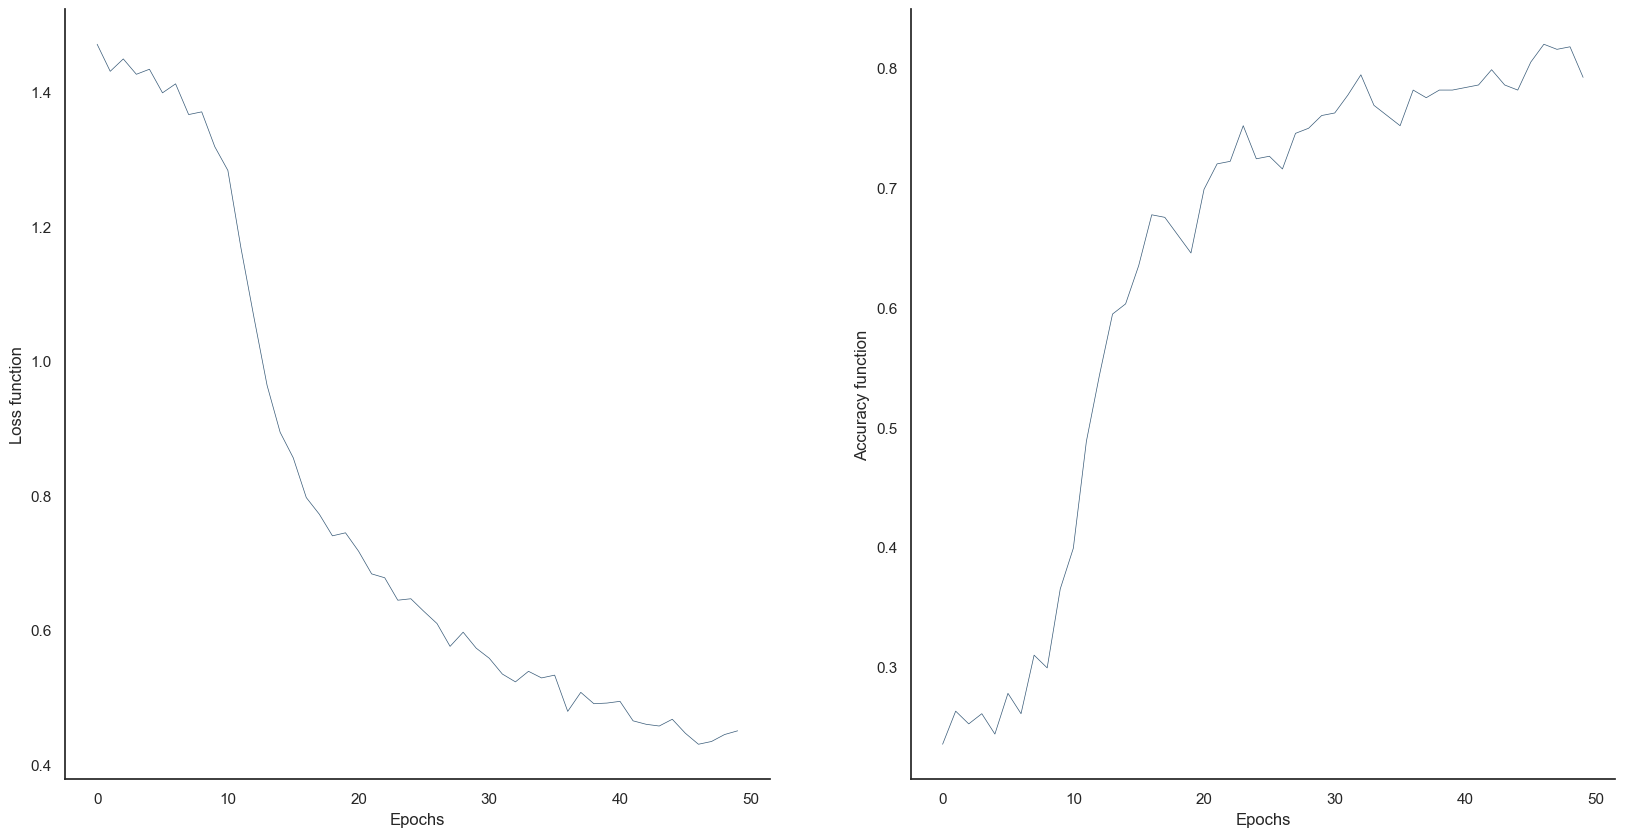

In [111]:
# %% View the training performance

fig = plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.plot(model_history.history['loss'])
plt.xlabel('Epochs'), plt.ylabel('Loss function')
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'), plt.ylabel('Accuracy function')

In [112]:
# %% Neural network weights
model_best.layers[0].get_weights()
# model.get_config() #model configuration
# %% View the model
plot_model(model_best)
# plot_model(model, to_file='../figures/P9_fig/model.png', show_shapes=True)
# %% Use the model
# Latest version
Y_prob = model.predict(X_test5)
Y_pred = np.argmax(Y_prob, axis=1)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
5/5 [==============================] - 0s 6ms/step


In [113]:
#see the inputs and outputs
plot_model(model,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [114]:
score = model_best.evaluate(X_test4, Y_test_dum, verbose=1)
print(score)

5/5 [==============================] - 0s 2ms/step - loss: 0.6048 - accuracy: 0.7537
[0.6047794818878174, 0.753731369972229]


In [115]:
# %% More metrics

Yhat_train = np.argmax(model.predict(X_train5), axis=1)
Yhat_test = np.argmax(model.predict(X_test5), axis=1)
accu_train = accuracy_score(y_train5, Yhat_train)
prec_train = precision_score(y_train5, Yhat_train, average='weighted',zero_division = 1)
reca_train = recall_score(y_train5, Yhat_train, average='weighted',zero_division = 1)
accu_test = accuracy_score(y_test5, Yhat_test)
prec_test = precision_score(y_test5, Yhat_test, average='weighted',zero_division = 0)
reca_test = recall_score(y_test5, Yhat_test, average='weighted',zero_division = 0)
print(' \t\t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f' % (accu_train,
                                                                                                            prec_train,
                                                                                                            reca_train,
                                                                                                            accu_test,
                                                                                                            prec_test,
                                                                                                            reca_test))

5/5 [==============================] - 0s 2ms/step
 		 Accu 	 Prec 	 Reca
 Train 	 0.824 	 0.822 	 0.824
  Test 	 0.754 	 0.768 	 0.754


In [116]:
results = {'Accuracy': [accuracy_martingala, accuracy_logistic, accuracy_naive, accuracy_forest],
           'Recall': [recall_martingala, recall_logistic, recall_naive, recall_forest],
           'Precision': [precision_martingala, precision_logistic, precision_naive, precision_forest],
           'F1': [f1_martingala, f1_logistic, f1_naive, f1_forest],
           'Balanced Accuracy': [balanced_martingala, balanced_logistic, balanced_naive, balanced_forest]
           }

table = pd.DataFrame(results, index=['Martingale', 'Logistic Regression', 'Naive Bayes', 'Random Forest'])
print(table)

                      Accuracy     Recall  Precision         F1  \
Martingale           25.595238  25.595238  25.601579  25.598300   
Logistic Regression  82.835821  82.835821  83.284676  82.734264   
Naive Bayes          79.850746  79.850746  80.318836  79.850746   
Random Forest        97.761194  97.761194  97.872311  97.762527   

                     Balanced Accuracy  
Martingale                   25.537083  
Logistic Regression          83.153162  
Naive Bayes                  80.060804  
Random Forest                97.876984  
